In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
features = [
    "sym_Jet0_pt", "sym_Jet1_pt", "sym_Jet2_pt", "sym_Jet3_pt",
    "sym_Jet0_eta", "sym_Jet1_eta", "sym_Jet2_eta", "sym_Jet3_eta",
    "sym_Jet0_phi", "sym_Jet1_phi", "sym_Jet2_phi", "sym_Jet3_phi",  
    "sym_Jet0_m", "sym_Jet1_m", "sym_Jet2_m", "sym_Jet3_m",
]

In [3]:
import torch
from dataset import generate_tt_dataset
from training_info import TrainingInfo
import pytorch_lightning as pl
import yaml
from fvt_classifier import FvTClassifier
from code_fragments import fvt_score_hist
from events_data import EventsData
import tqdm
import numpy as np
import matplotlib.pyplot as plt

config_filename = "configs/fvt_training_higher_sr.yml"


config = yaml.safe_load(open(config_filename, "r"))
experiment_name = config["experiment_name"]
n_3b = config["n_3b"]
n_all4b = config["n_all4b"]
signal_ratios = config["signal_ratio"]
test_ratio = config["test_ratio"]
n_sample_ratios = [1.0]
seeds = [42, 52, 62, 72, 82, 92]
w_cuts = np.arange(0.01, 1.01, 0.01)
device = torch.device("cuda:0")

In [5]:
def plot_sr_stats(events, sr_stats, ax, label, **plot_kwargs):
    assert len(events) == len(sr_stats)

    sr_stats_argsort = np.argsort(sr_stats)[::-1]
    weights = events.weights[sr_stats_argsort]
    is_signal = events.is_signal[sr_stats_argsort]
    is_4b = events.is_4b[sr_stats_argsort]

    ax.plot(
        np.cumsum(weights * is_4b) / np.sum(weights * is_4b),
        np.cumsum(weights * is_signal) / np.sum(weights * is_signal),           
        label=label,
        **plot_kwargs,
    )

In [6]:
def hist_events_by_labels(events: EventsData, bins, ax, **hist_kwargs):
    ax.hist(events.fvt_score[events.is_3b], 
                        bins=bins, histtype="step", label="3b", 
                        weights=events.weights[events.is_3b], 
                        **hist_kwargs)
    ax.hist(events.fvt_score[events.is_bg4b], 
                bins=bins, histtype="step", label="bg4b", 
                weights=events.weights[events.is_bg4b], 
                **hist_kwargs)
    ax.hist(events.fvt_score[events.is_signal], 
                bins=bins, histtype="step", label="signal", 
                weights=events.weights[events.is_signal], 
                **hist_kwargs)

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_prec

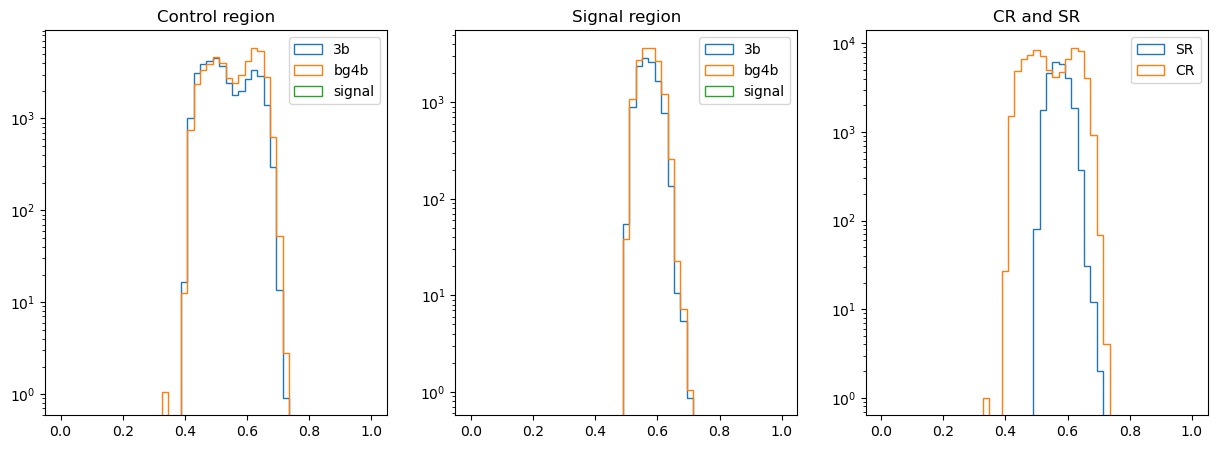

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.79it/s, v_num=6, val_loss=0.676, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.08it/s, v_num=6, val_loss=0.676, train_loss=0.677]
CR w_4b / w_3b = 1.2383238077163696
SR w_4b / w_3b = 1.3451488018035889


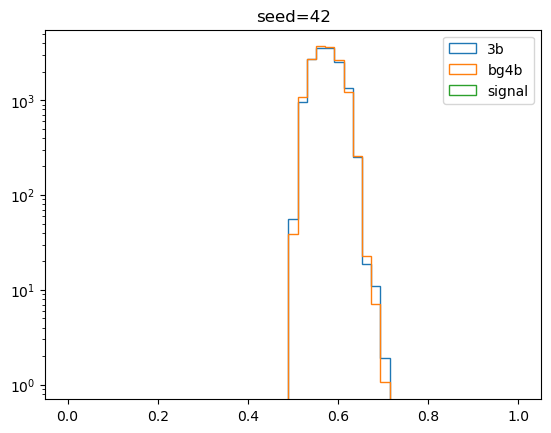

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


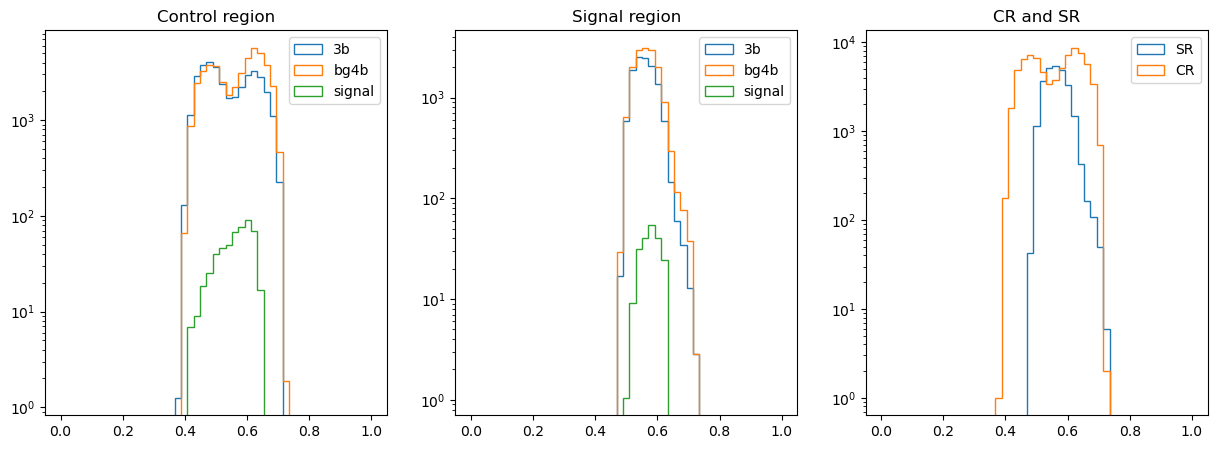

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 31.12it/s, v_num=7, val_loss=0.675, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.68it/s, v_num=7, val_loss=0.675, train_loss=0.675]
CR w_4b / w_3b = 1.2827138900756836
SR w_4b / w_3b = 1.30693519115448


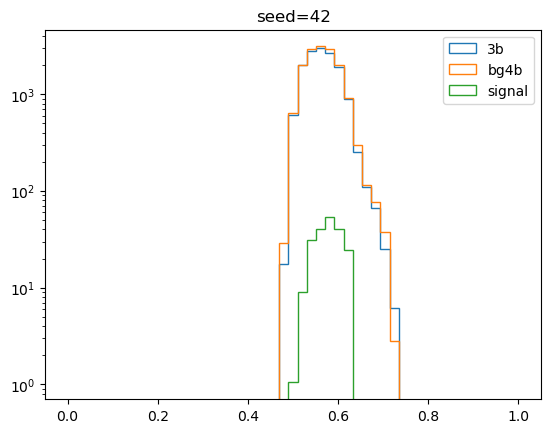

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


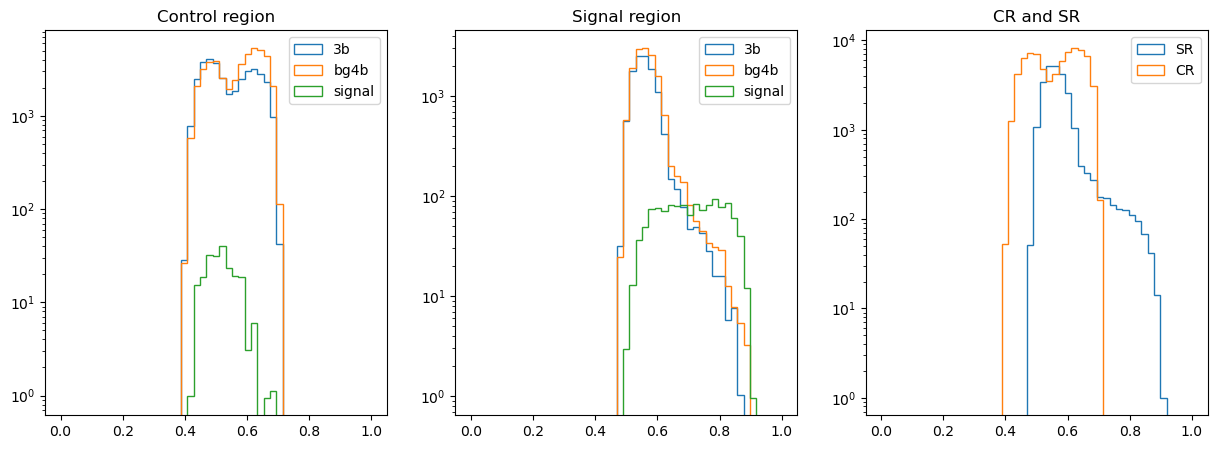

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 18.38it/s, v_num=8, val_loss=0.675, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 18.27it/s, v_num=8, val_loss=0.675, train_loss=0.675]
CR w_4b / w_3b = 1.287454605102539
SR w_4b / w_3b = 1.3604282140731812


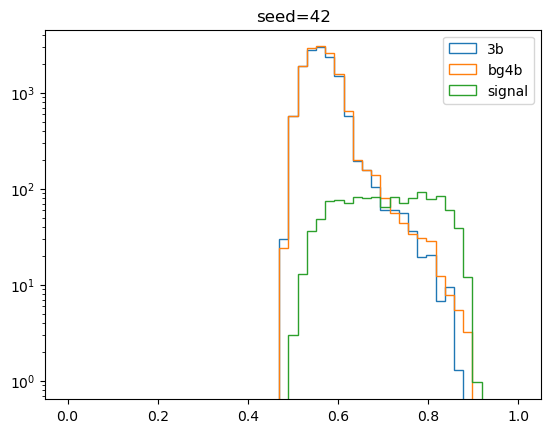

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


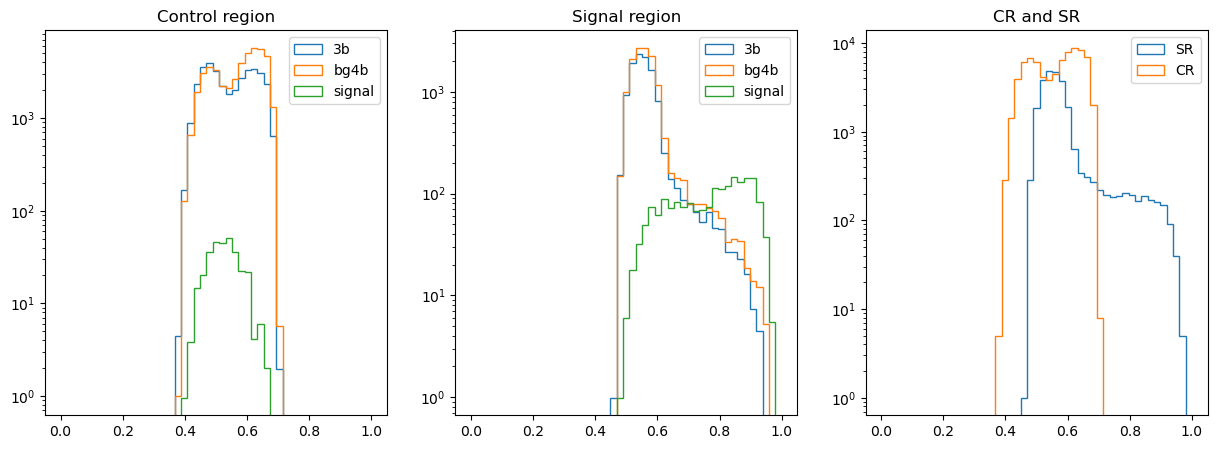

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.73it/s, v_num=9, val_loss=0.674, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.40it/s, v_num=9, val_loss=0.674, train_loss=0.674]
CR w_4b / w_3b = 1.2989908456802368
SR w_4b / w_3b = 1.384495496749878


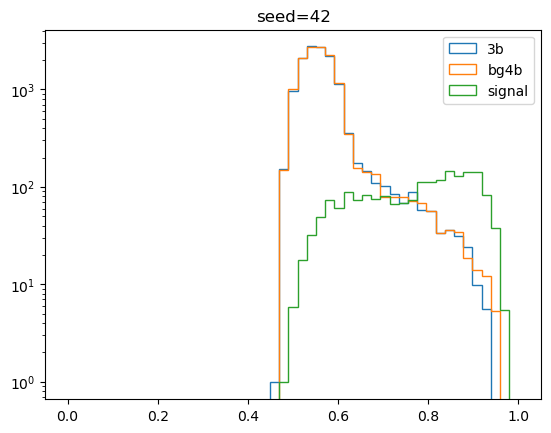

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


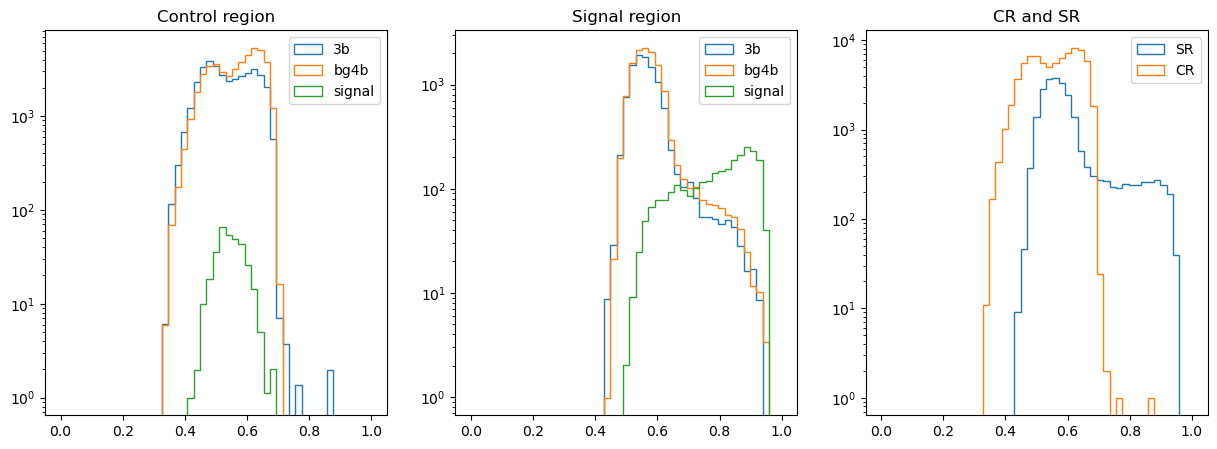

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 18.78it/s, v_num=10, val_loss=0.678, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 17.97it/s, v_num=10, val_loss=0.678, train_loss=0.675]
CR w_4b / w_3b = 1.2491283416748047
SR w_4b / w_3b = 1.464468002319336


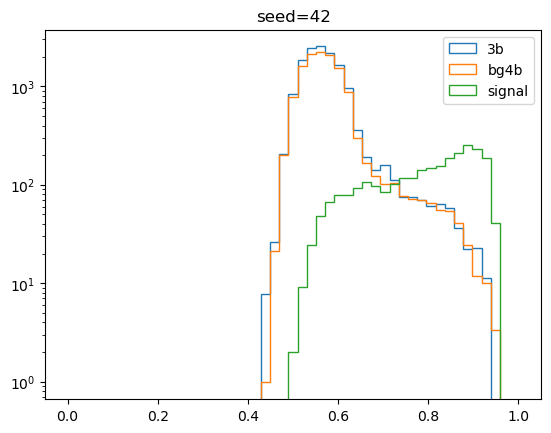

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


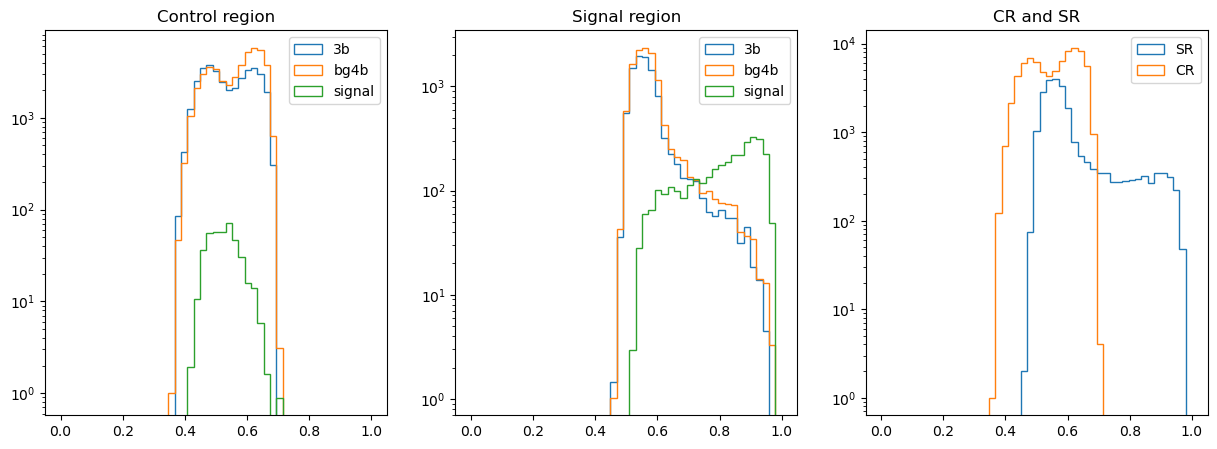

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.65it/s, v_num=11, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.78it/s, v_num=11, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.2792315483093262
SR w_4b / w_3b = 1.561326026916504


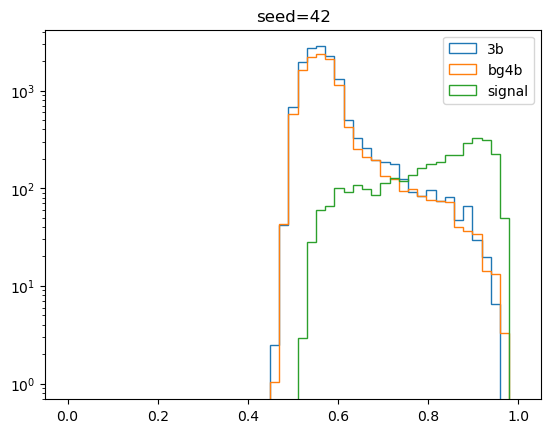

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


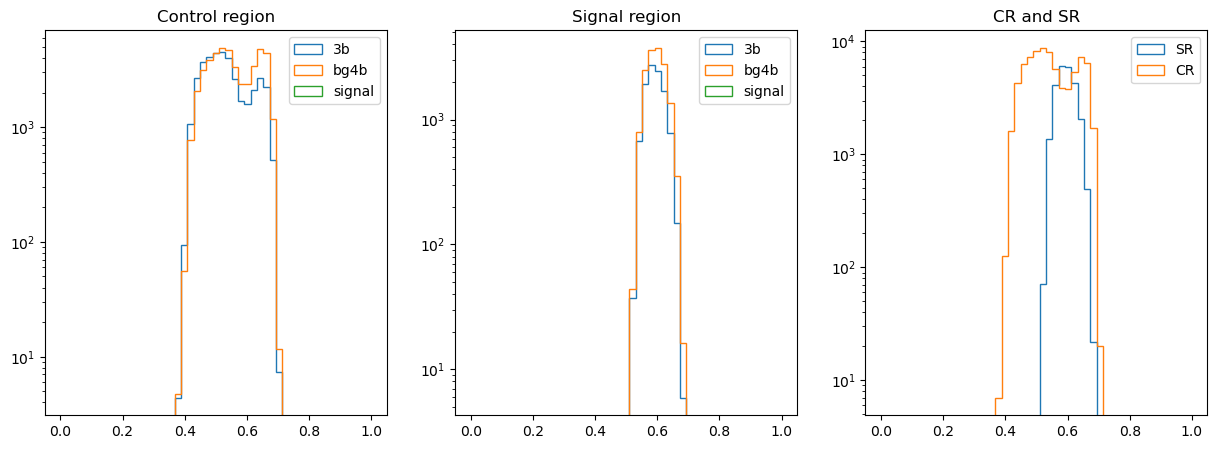

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.34it/s, v_num=6, val_loss=0.677, train_loss=0.680]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.19it/s, v_num=6, val_loss=0.677, train_loss=0.680]
CR w_4b / w_3b = 1.20364248752594
SR w_4b / w_3b = 1.4599148035049438


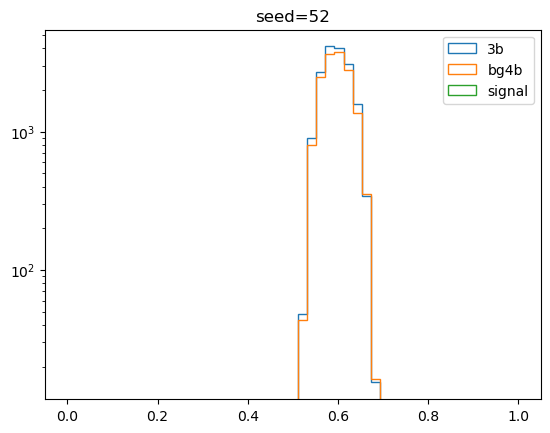

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


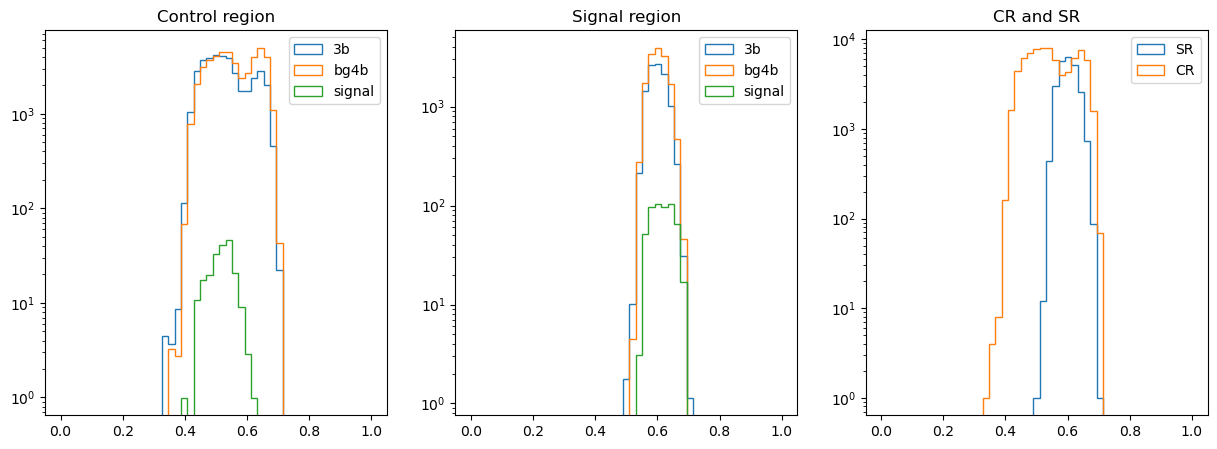

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 51/51 [00:01<00:00, 27.15it/s, v_num=7, val_loss=0.680, train_loss=0.678]
CR w_4b / w_3b = 1.214044451713562
SR w_4b / w_3b = 1.461704969406128


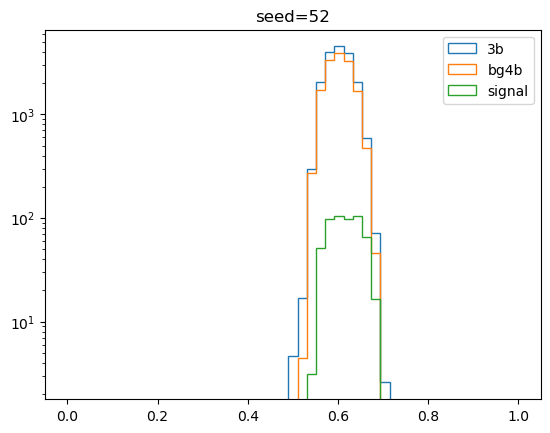

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


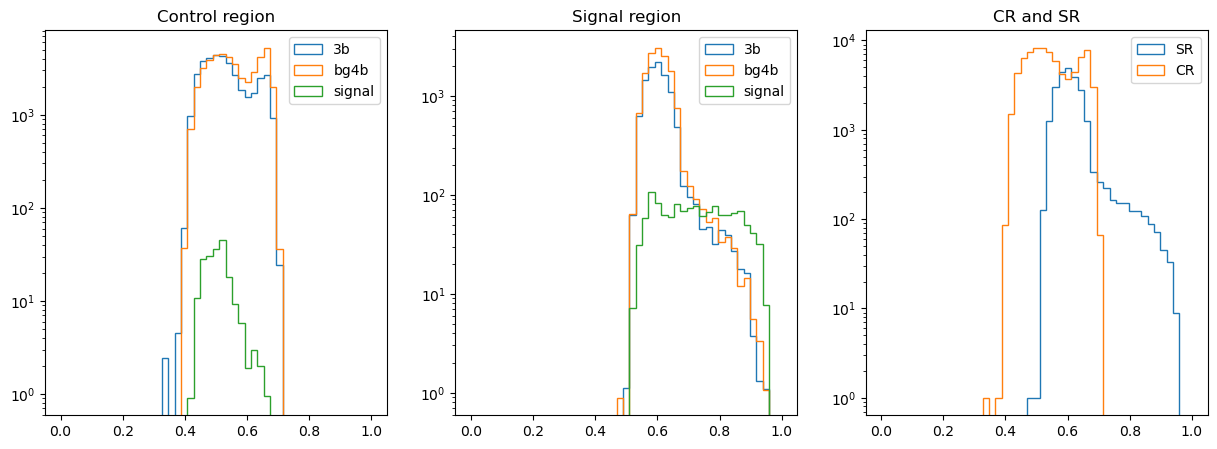

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 18: 100%|██████████| 51/51 [00:01<00:00, 28.01it/s, v_num=8, val_loss=0.680, train_loss=0.679]
CR w_4b / w_3b = 1.2098314762115479
SR w_4b / w_3b = 1.5207409858703613


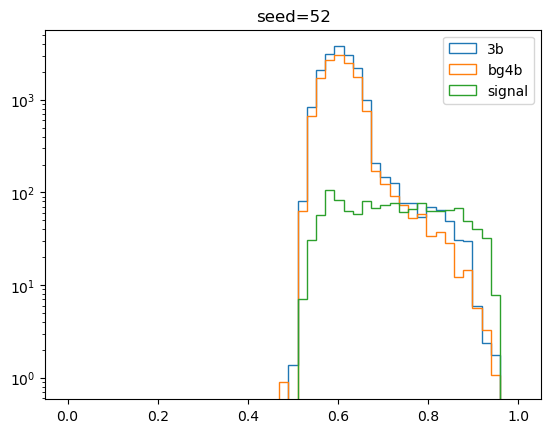

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


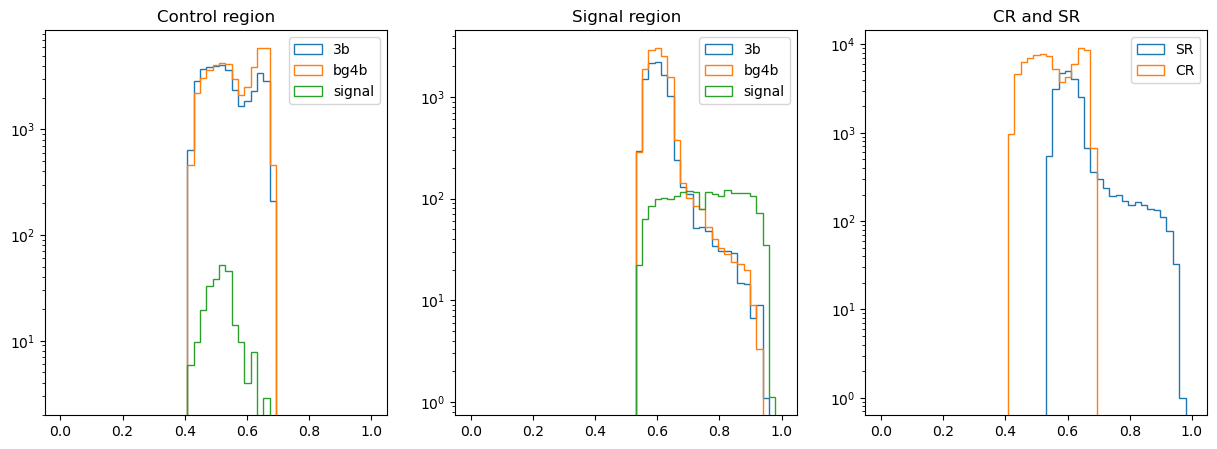

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 14: 100%|██████████| 51/51 [00:01<00:00, 27.39it/s, v_num=9, val_loss=0.680, train_loss=0.679]
CR w_4b / w_3b = 1.2193455696105957
SR w_4b / w_3b = 1.5885264873504639


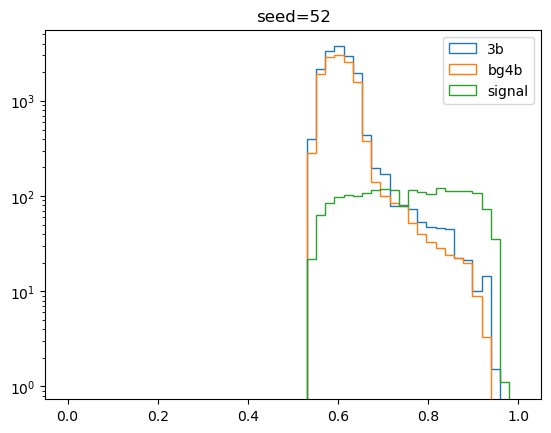

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


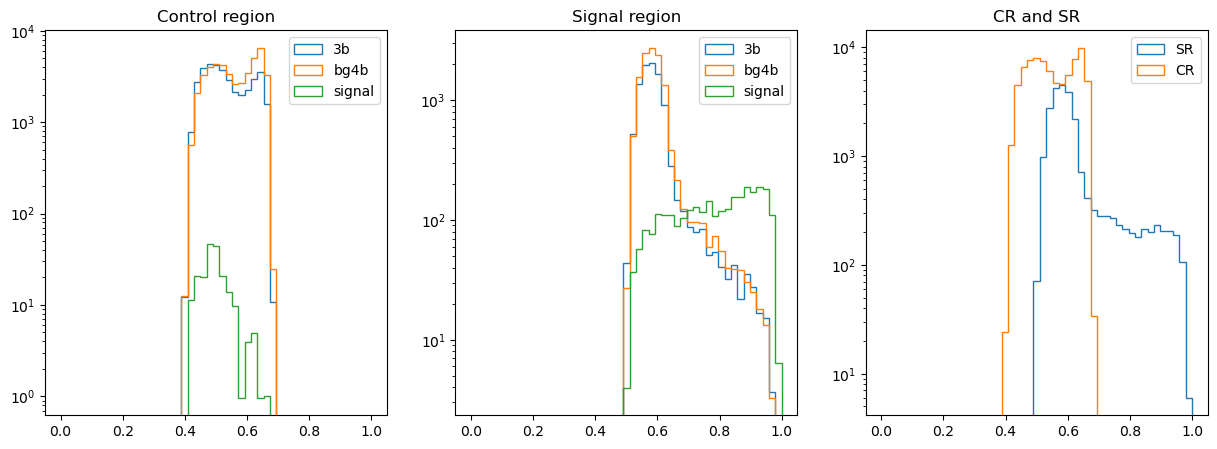

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.26it/s, v_num=10, val_loss=0.677, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.99it/s, v_num=10, val_loss=0.677, train_loss=0.678]
CR w_4b / w_3b = 1.2333354949951172
SR w_4b / w_3b = 1.5810850858688354


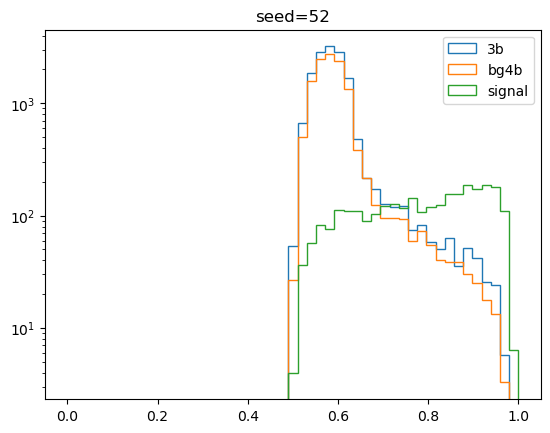

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


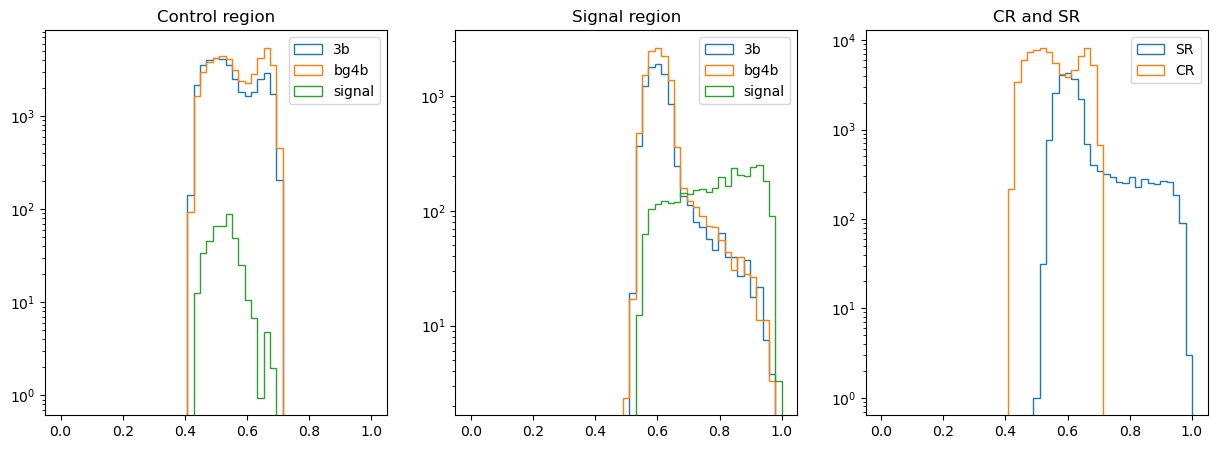

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.78it/s, v_num=11, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.29it/s, v_num=11, val_loss=0.678, train_loss=0.678]
CR w_4b / w_3b = 1.2458465099334717
SR w_4b / w_3b = 1.7562007904052734


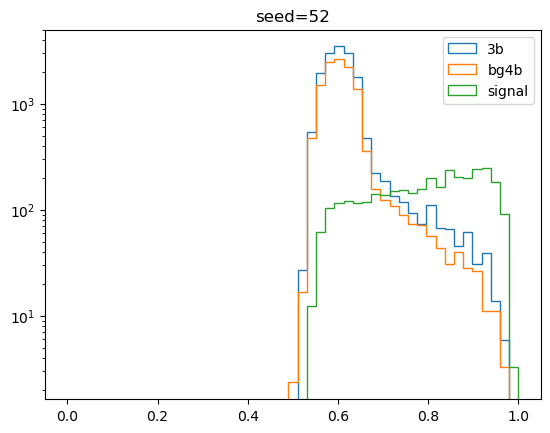

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


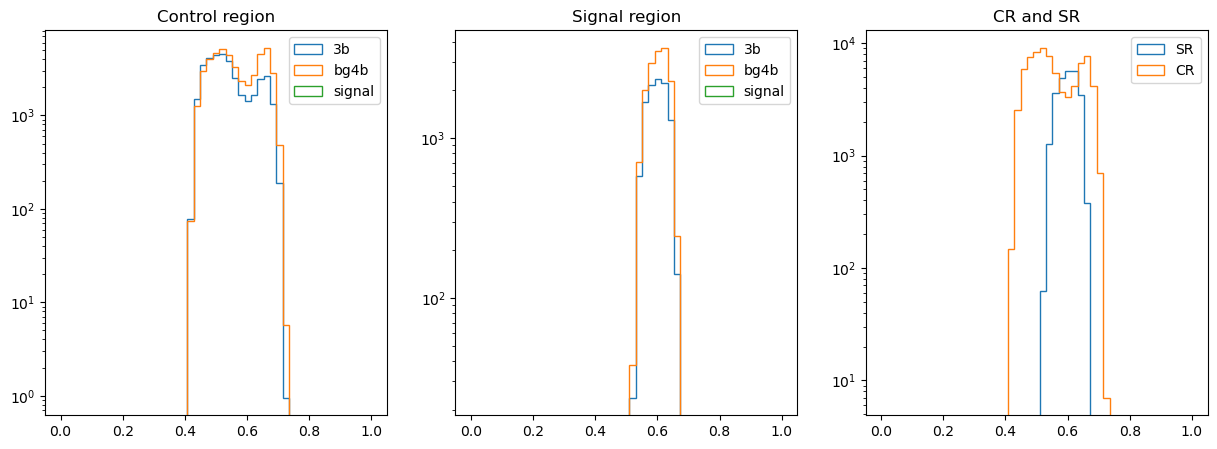

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.79it/s, v_num=2, val_loss=0.678, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.90it/s, v_num=2, val_loss=0.678, train_loss=0.675]
CR w_4b / w_3b = 1.2914938926696777
SR w_4b / w_3b = 1.4776129722595215


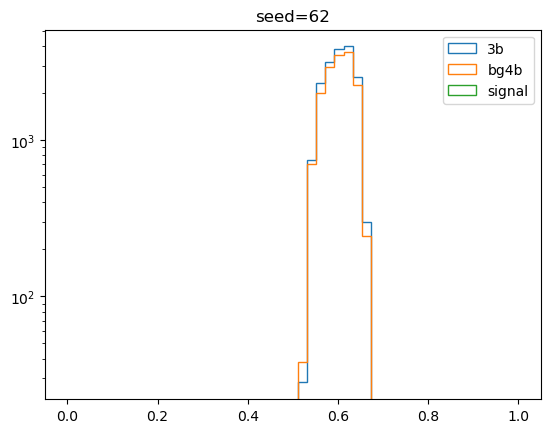

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


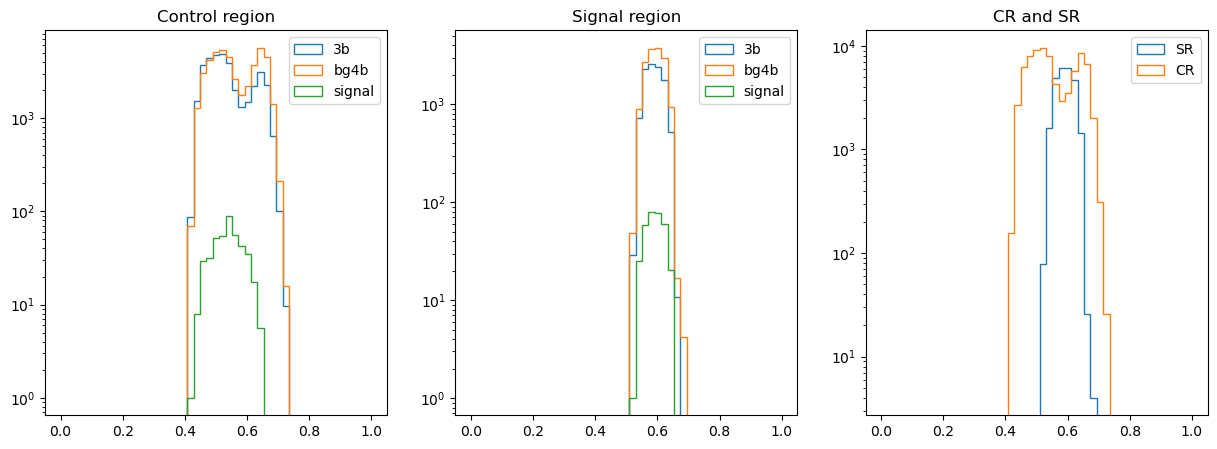

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 18: 100%|██████████| 50/50 [00:01<00:00, 28.21it/s, v_num=3, val_loss=0.677, train_loss=0.678]
CR w_4b / w_3b = 1.2710083723068237
SR w_4b / w_3b = 1.4835158586502075


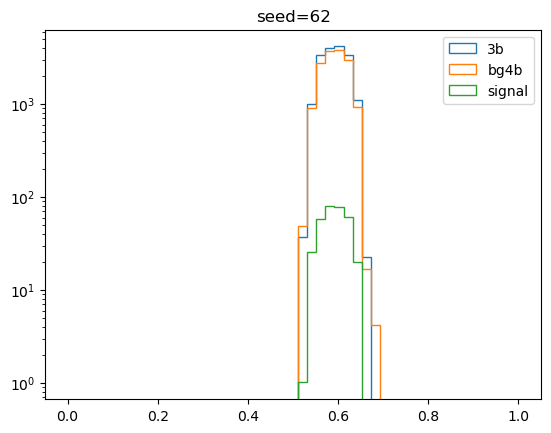

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


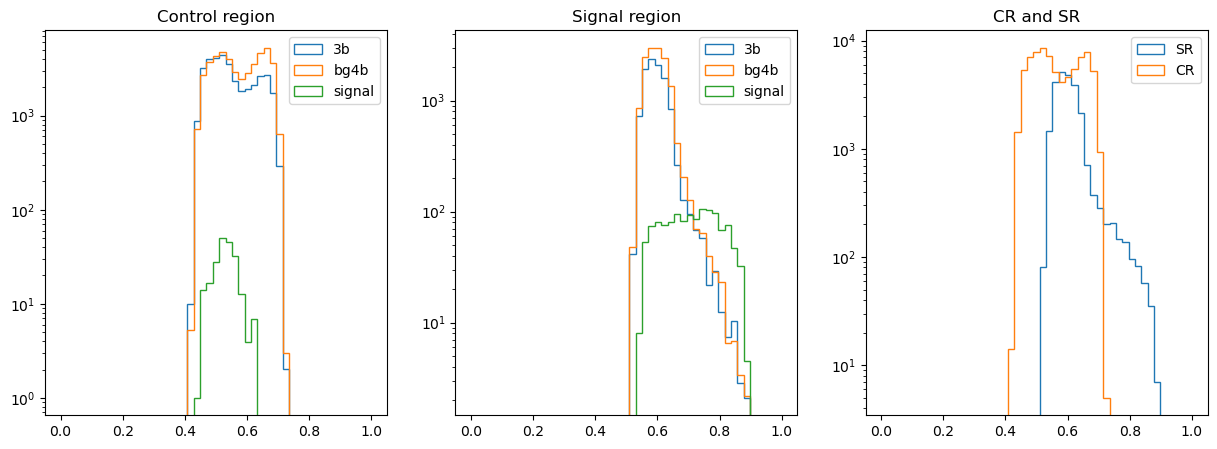

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 30.75it/s, v_num=4, val_loss=0.674, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.65it/s, v_num=4, val_loss=0.674, train_loss=0.676]
CR w_4b / w_3b = 1.2955325841903687
SR w_4b / w_3b = 1.4929685592651367


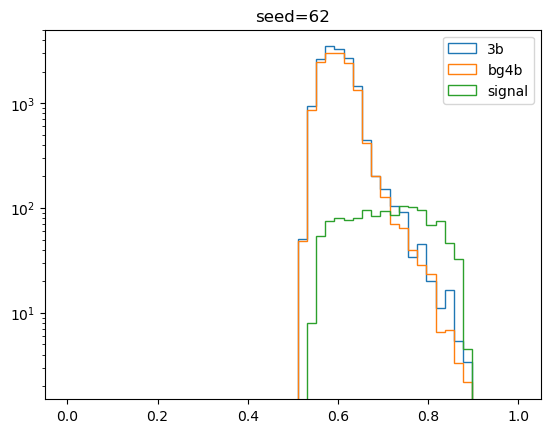

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


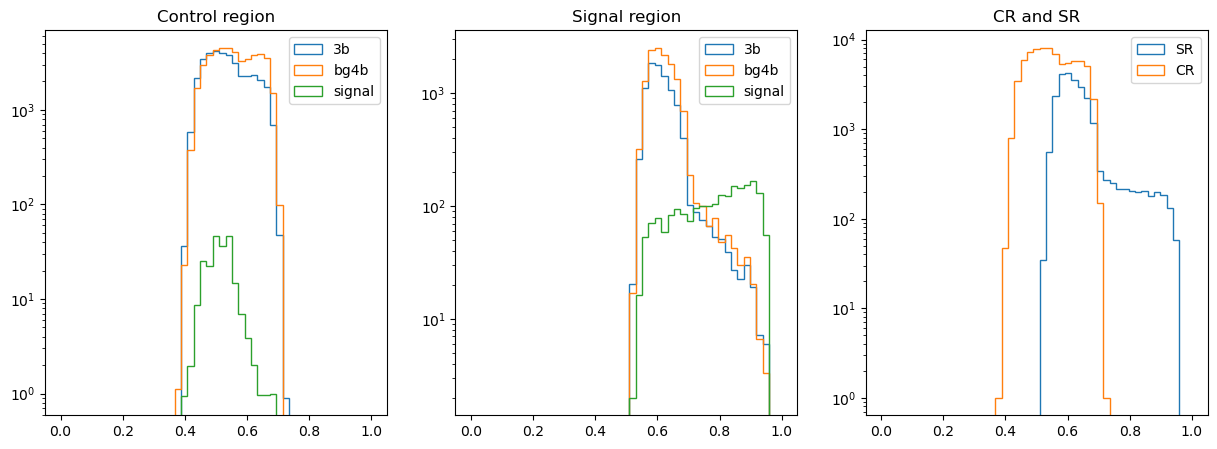

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.92it/s, v_num=5, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.64it/s, v_num=5, val_loss=0.678, train_loss=0.678]
CR w_4b / w_3b = 1.2456070184707642
SR w_4b / w_3b = 1.6595935821533203


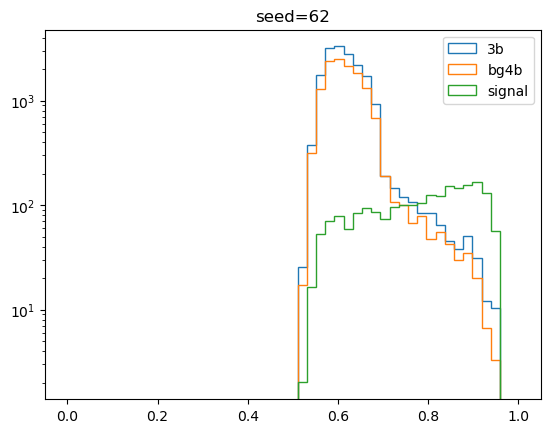

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


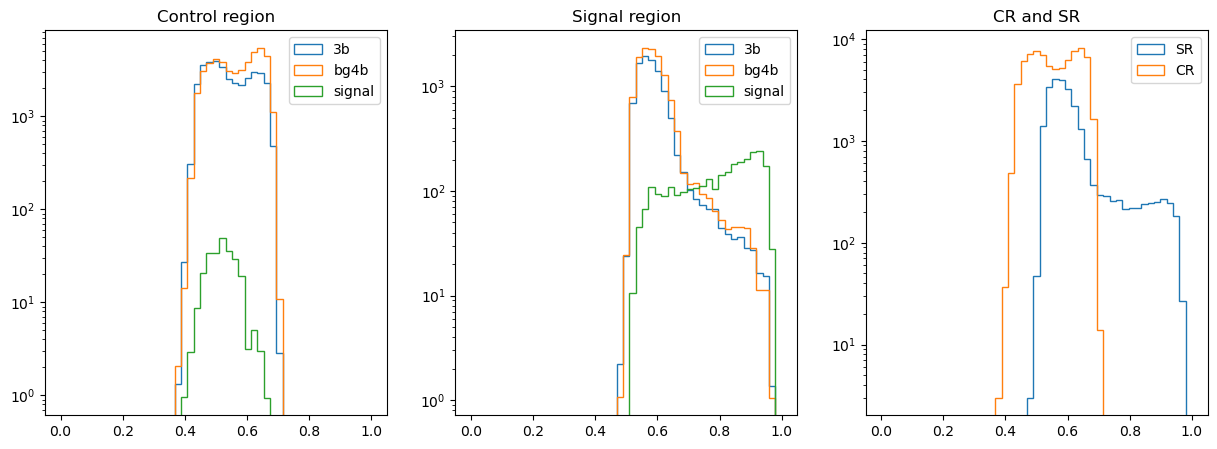

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.86it/s, v_num=6, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.56it/s, v_num=6, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.2903732061386108
SR w_4b / w_3b = 1.5500117540359497


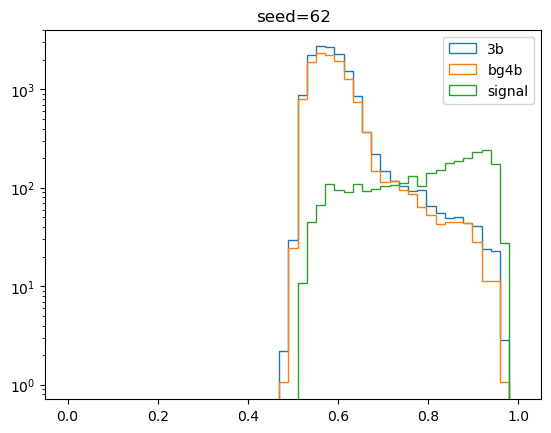

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


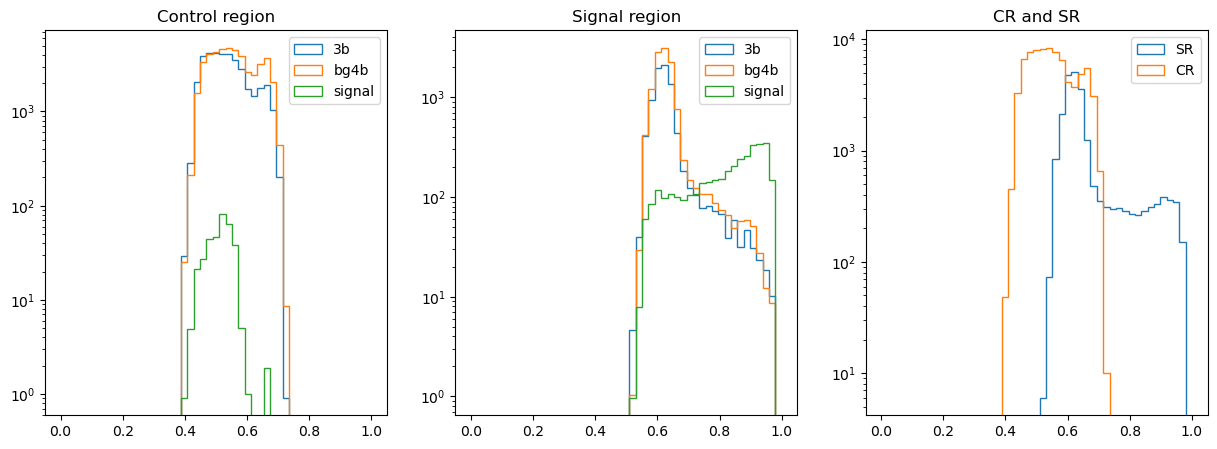

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 16: 100%|██████████| 51/51 [00:01<00:00, 27.66it/s, v_num=7, val_loss=0.679, train_loss=0.680]
CR w_4b / w_3b = 1.2438116073608398
SR w_4b / w_3b = 1.8584771156311035


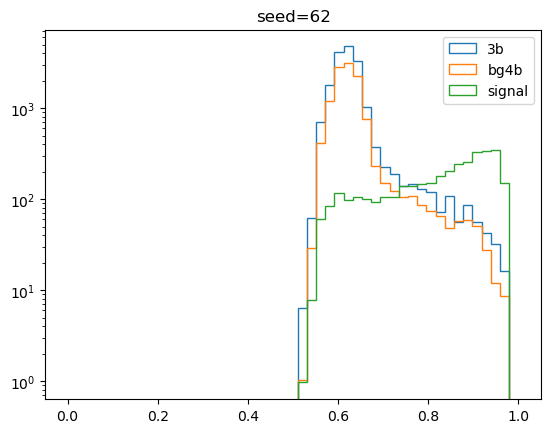

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


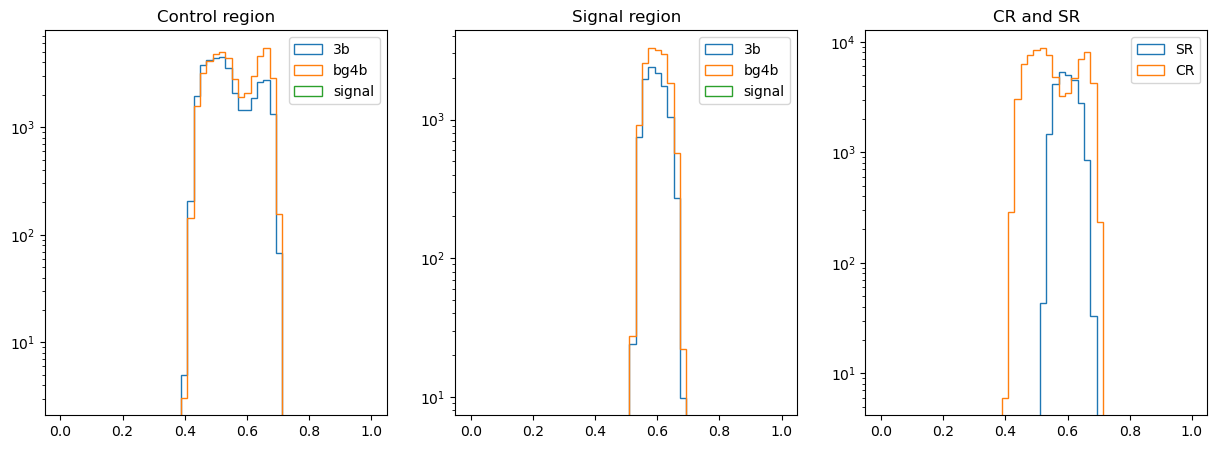

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.35it/s, v_num=0, val_loss=0.676, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.23it/s, v_num=0, val_loss=0.676, train_loss=0.677]
CR w_4b / w_3b = 1.2741923332214355
SR w_4b / w_3b = 1.478497862815857


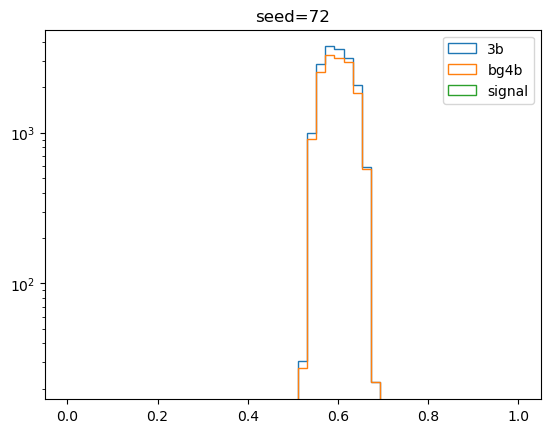

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


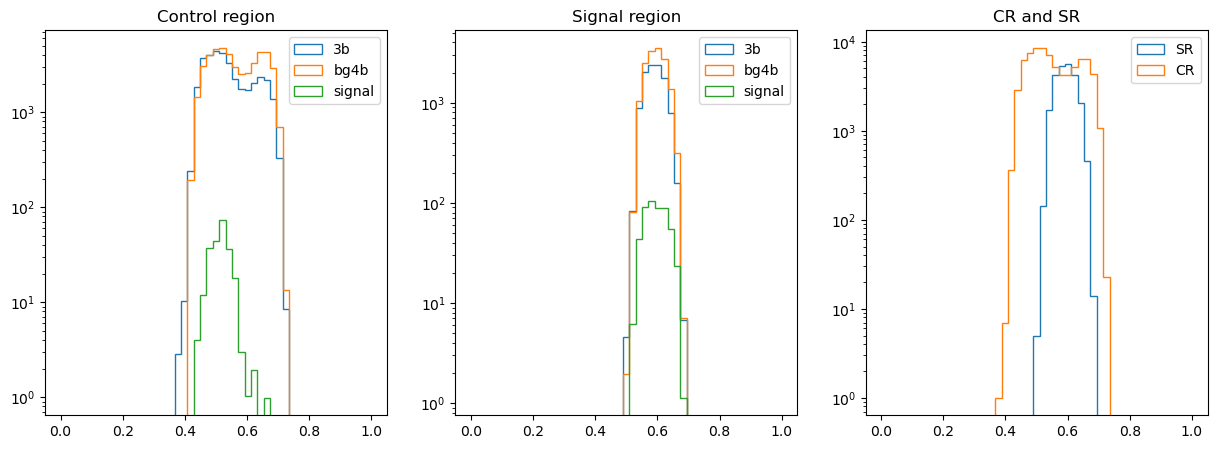

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 31.14it/s, v_num=1, val_loss=0.676, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.98it/s, v_num=1, val_loss=0.676, train_loss=0.677]
CR w_4b / w_3b = 1.2823652029037476
SR w_4b / w_3b = 1.4638328552246094


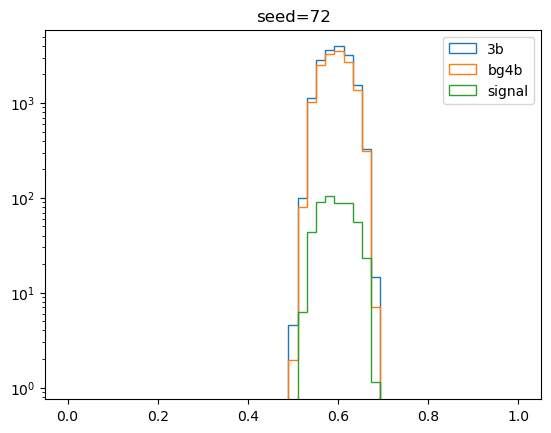

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


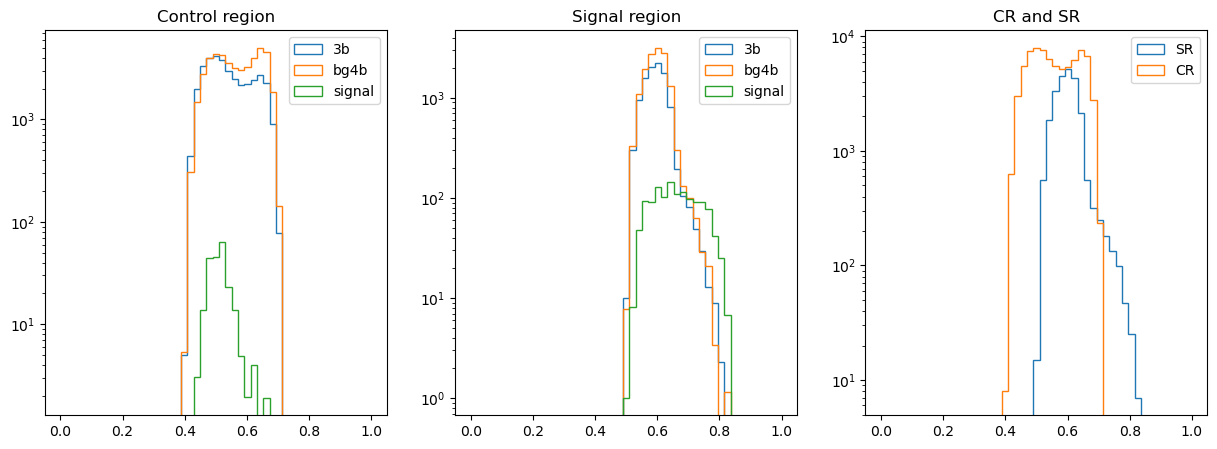

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 18: 100%|██████████| 50/50 [00:01<00:00, 26.35it/s, v_num=2, val_loss=0.678, train_loss=0.676]
CR w_4b / w_3b = 1.275014042854309
SR w_4b / w_3b = 1.5055972337722778


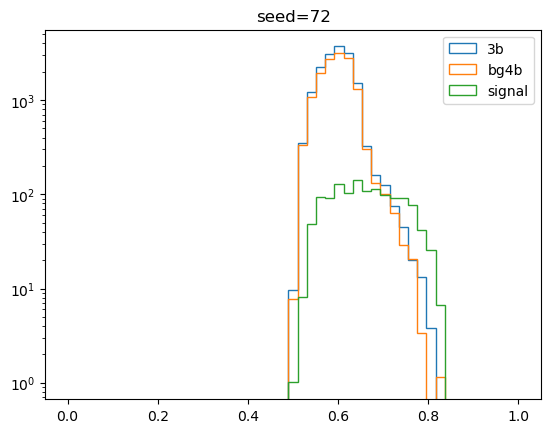

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


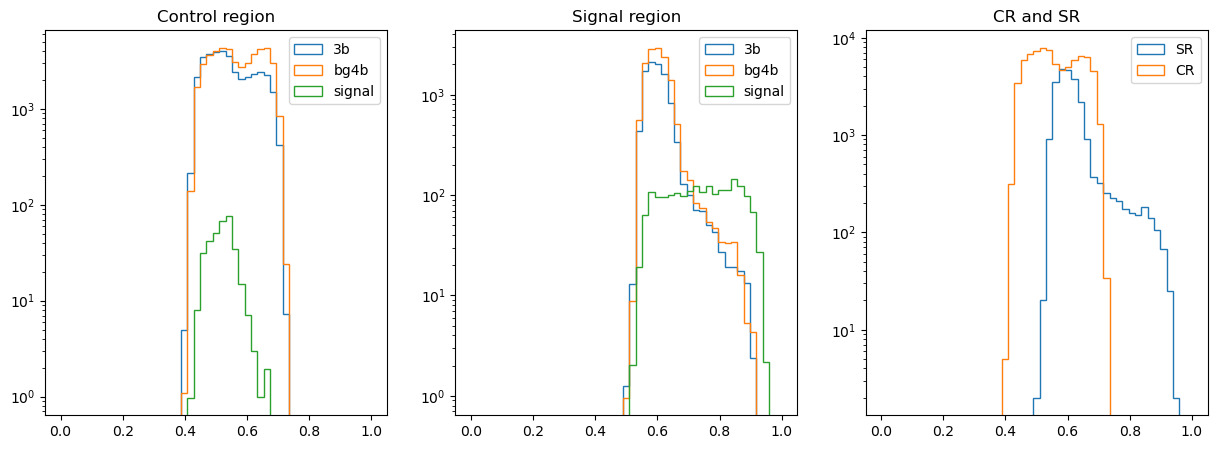

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.07it/s, v_num=3, val_loss=0.679, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.75it/s, v_num=3, val_loss=0.679, train_loss=0.678]
CR w_4b / w_3b = 1.25864839553833
SR w_4b / w_3b = 1.592796802520752


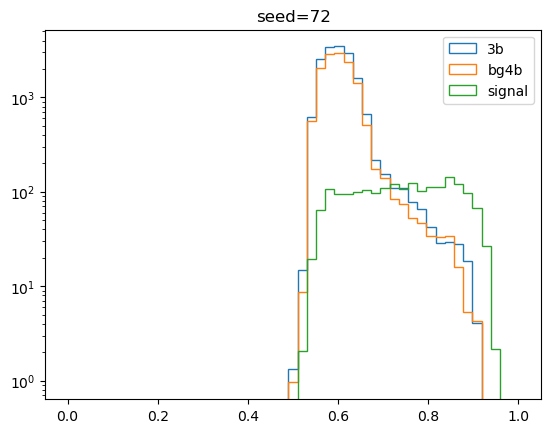

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


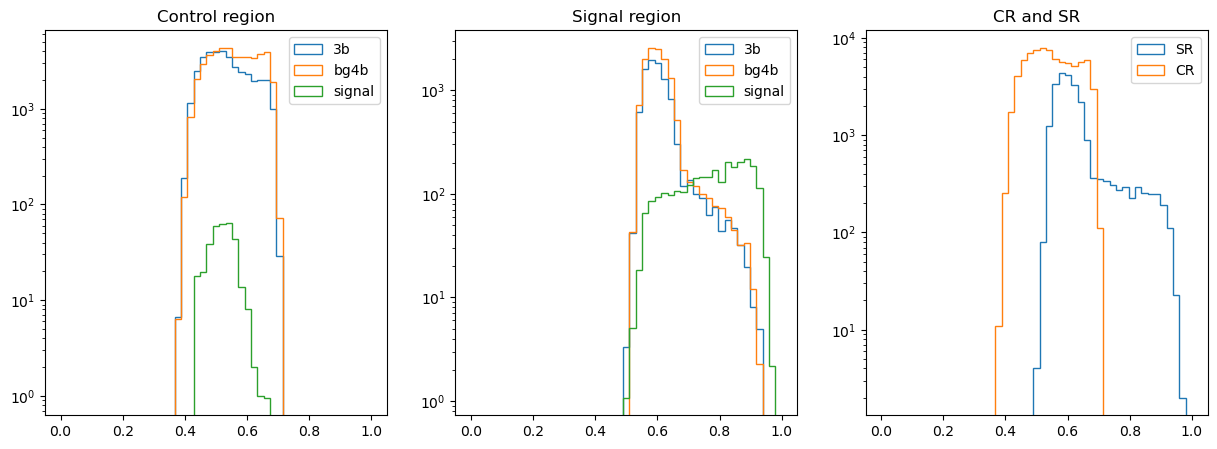

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.95it/s, v_num=4, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.90it/s, v_num=4, val_loss=0.678, train_loss=0.678]
CR w_4b / w_3b = 1.2388135194778442
SR w_4b / w_3b = 1.647904396057129


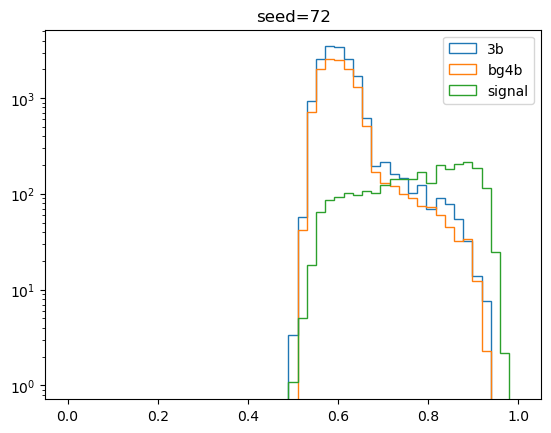

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


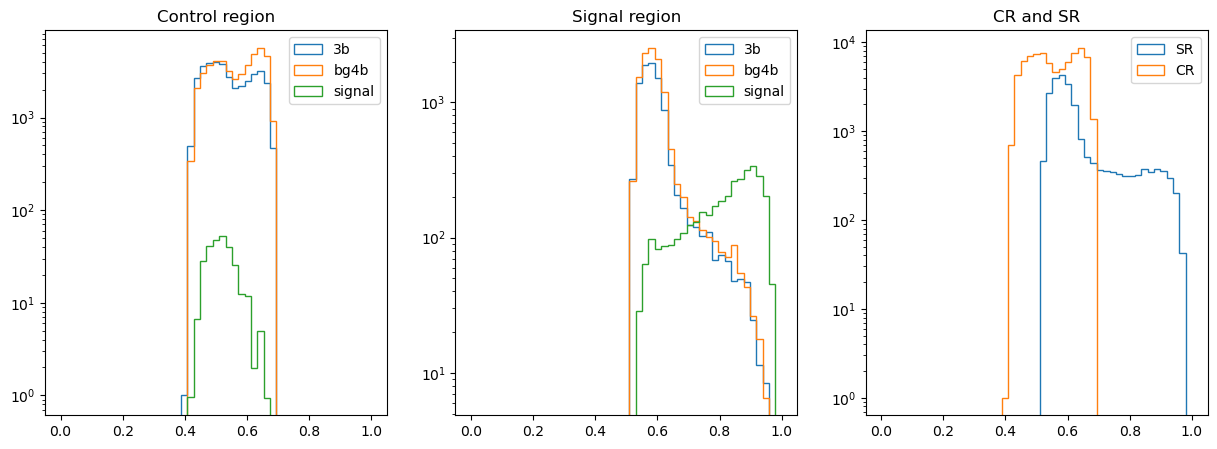

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 13: 100%|██████████| 51/51 [00:01<00:00, 28.13it/s, v_num=5, val_loss=0.677, train_loss=0.679]
CR w_4b / w_3b = 1.2465229034423828
SR w_4b / w_3b = 1.6203923225402832


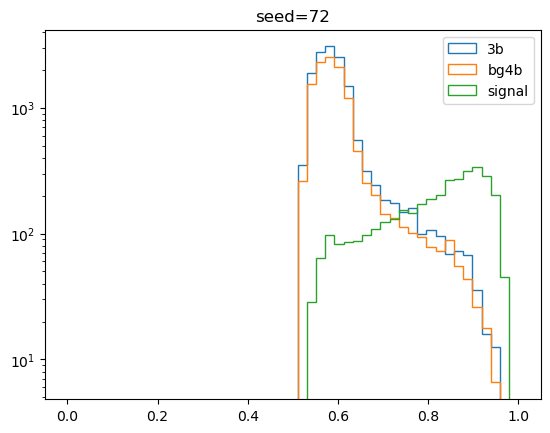

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


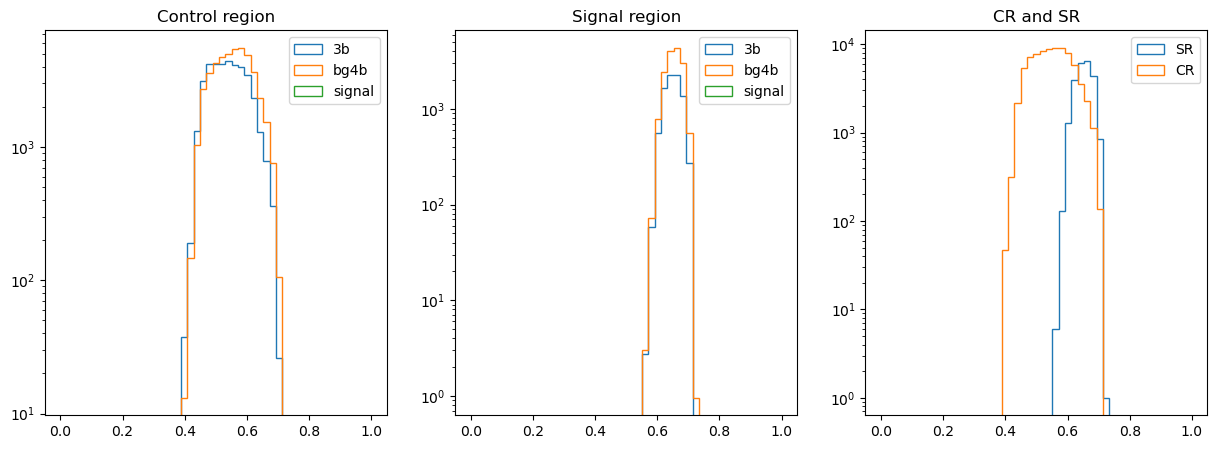

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.56it/s, v_num=0, val_loss=0.683, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.79it/s, v_num=0, val_loss=0.683, train_loss=0.683]
CR w_4b / w_3b = 1.205355167388916
SR w_4b / w_3b = 1.825549602508545


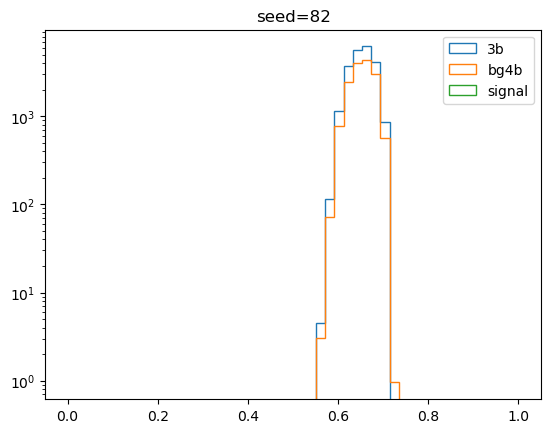

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


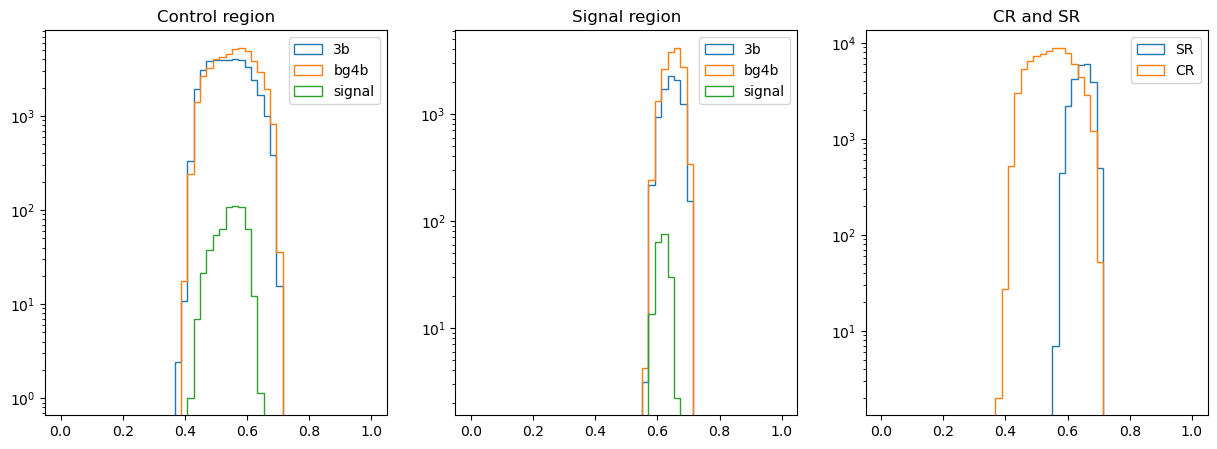

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.96it/s, v_num=1, val_loss=0.682, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.01it/s, v_num=1, val_loss=0.682, train_loss=0.683]
CR w_4b / w_3b = 1.2139766216278076
SR w_4b / w_3b = 1.7833434343338013


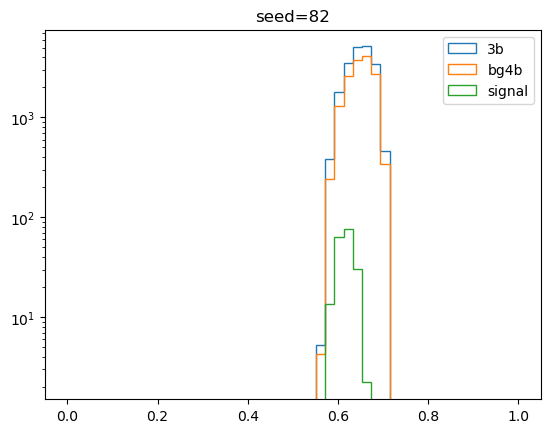

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


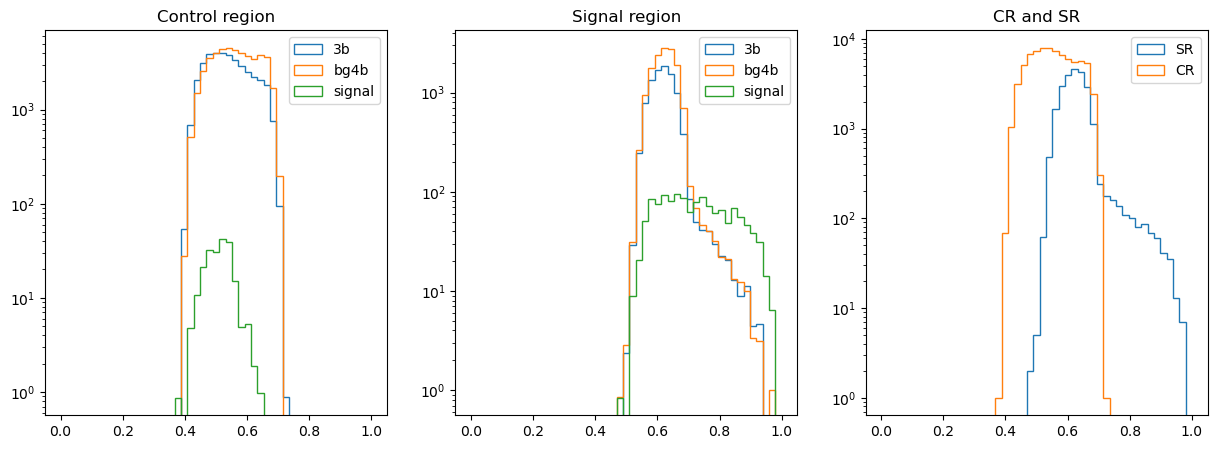

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.96it/s, v_num=2, val_loss=0.680, train_loss=0.680]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.32it/s, v_num=2, val_loss=0.680, train_loss=0.680]
CR w_4b / w_3b = 1.2349919080734253
SR w_4b / w_3b = 1.6646907329559326


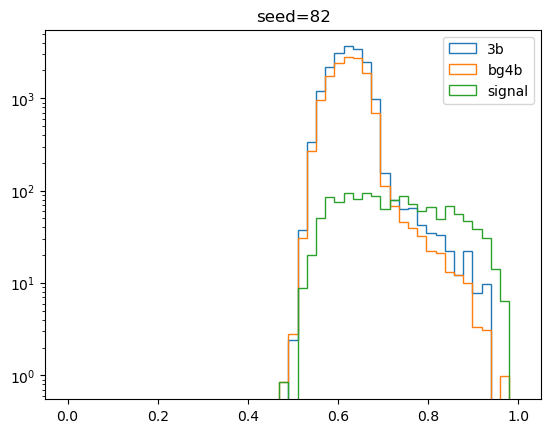

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


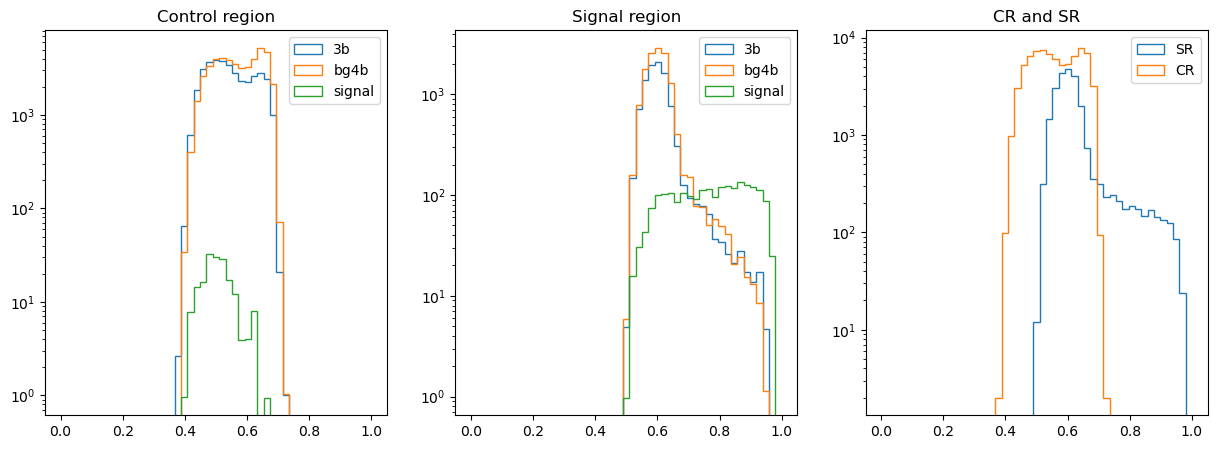

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 51/51 [00:01<00:00, 27.43it/s, v_num=3, val_loss=0.676, train_loss=0.678]
CR w_4b / w_3b = 1.253527283668518
SR w_4b / w_3b = 1.58753502368927


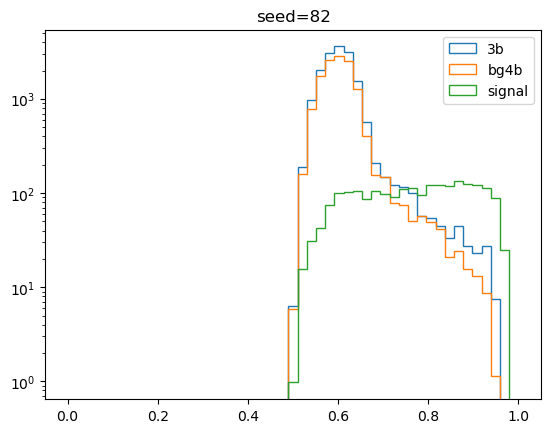

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


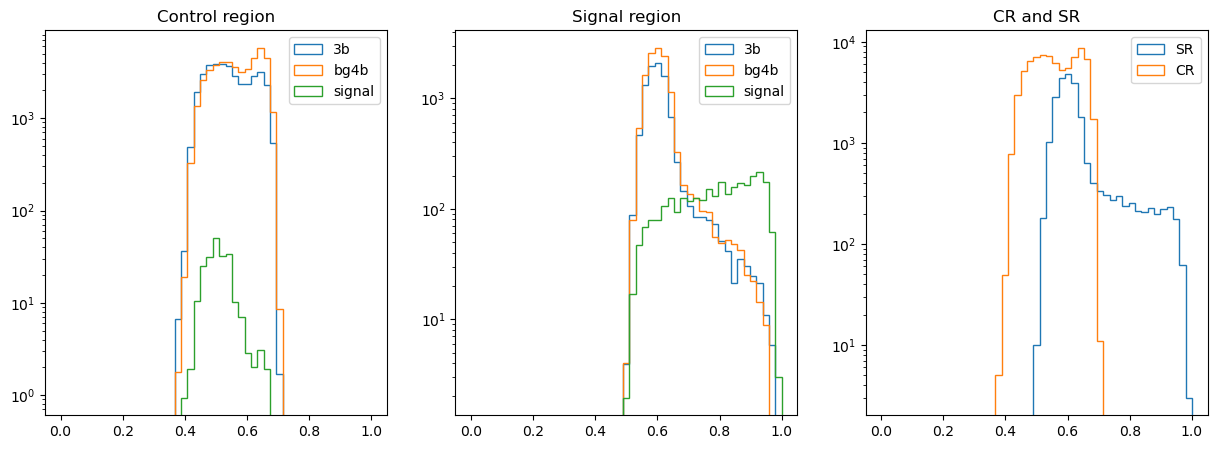

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 51/51 [00:01<00:00, 29.46it/s, v_num=4, val_loss=0.678, train_loss=0.678]
CR w_4b / w_3b = 1.244043231010437
SR w_4b / w_3b = 1.6552882194519043


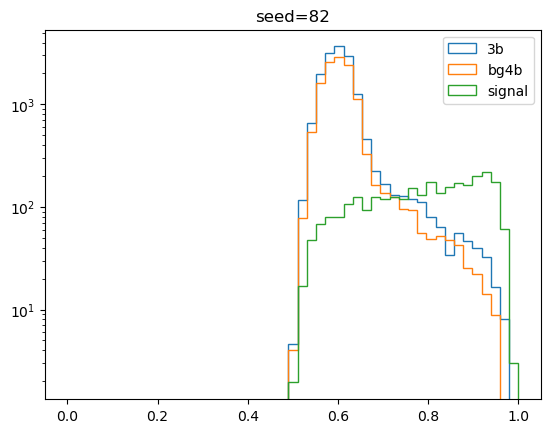

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


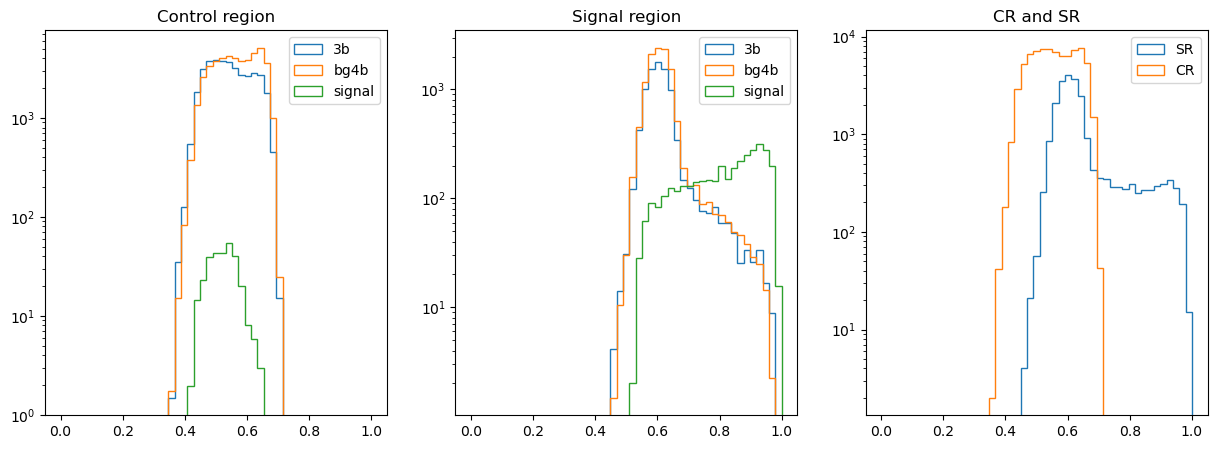

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.77it/s, v_num=5, val_loss=0.679, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.50it/s, v_num=5, val_loss=0.679, train_loss=0.678]
CR w_4b / w_3b = 1.2348300218582153
SR w_4b / w_3b = 1.7560139894485474


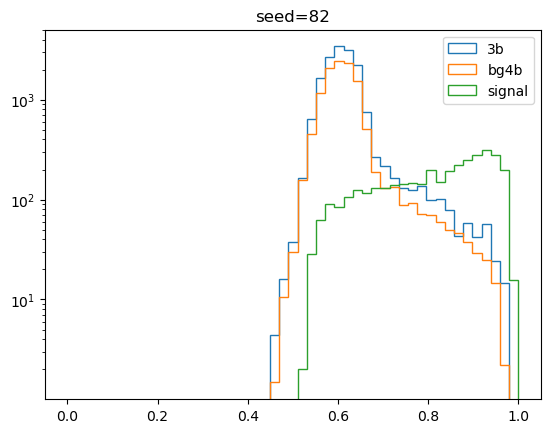

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


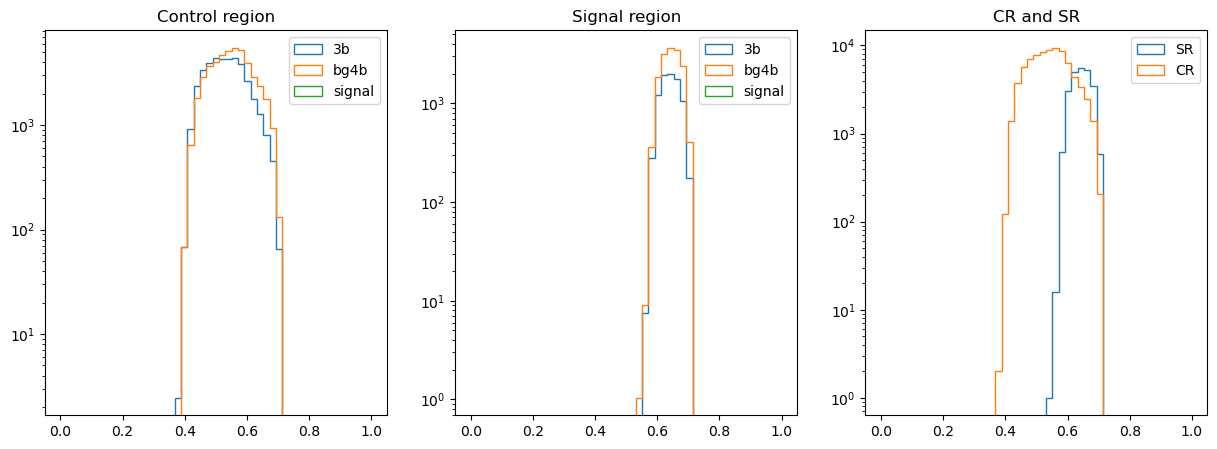

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.08it/s, v_num=0, val_loss=0.682, train_loss=0.682]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.10it/s, v_num=0, val_loss=0.682, train_loss=0.682]
CR w_4b / w_3b = 1.182483434677124
SR w_4b / w_3b = 1.8190315961837769


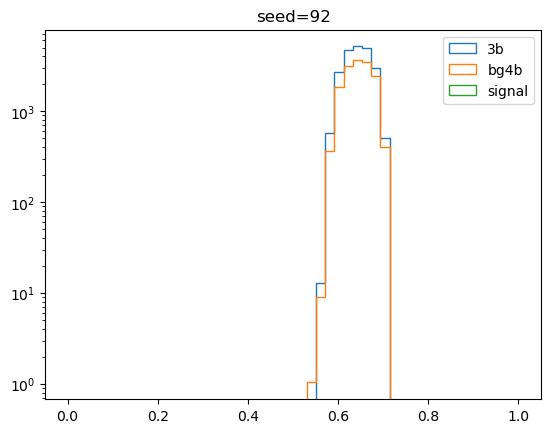

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


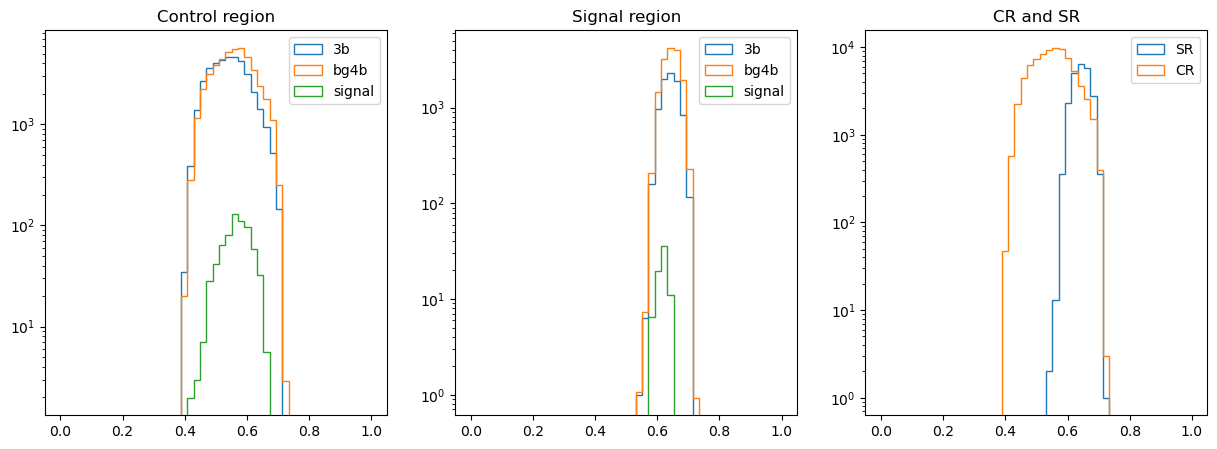

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.31it/s, v_num=1, val_loss=0.683, train_loss=0.683]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.05it/s, v_num=1, val_loss=0.683, train_loss=0.683]
CR w_4b / w_3b = 1.2031917572021484
SR w_4b / w_3b = 1.8527387380599976


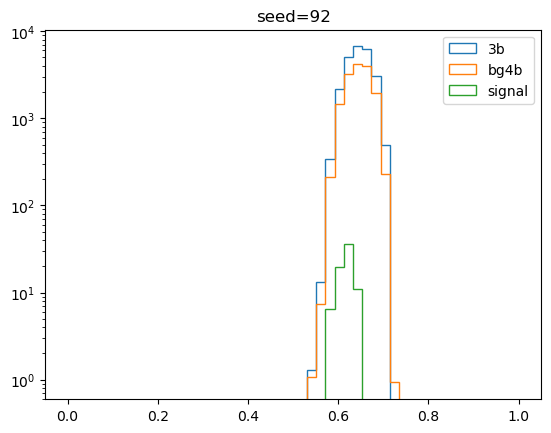

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


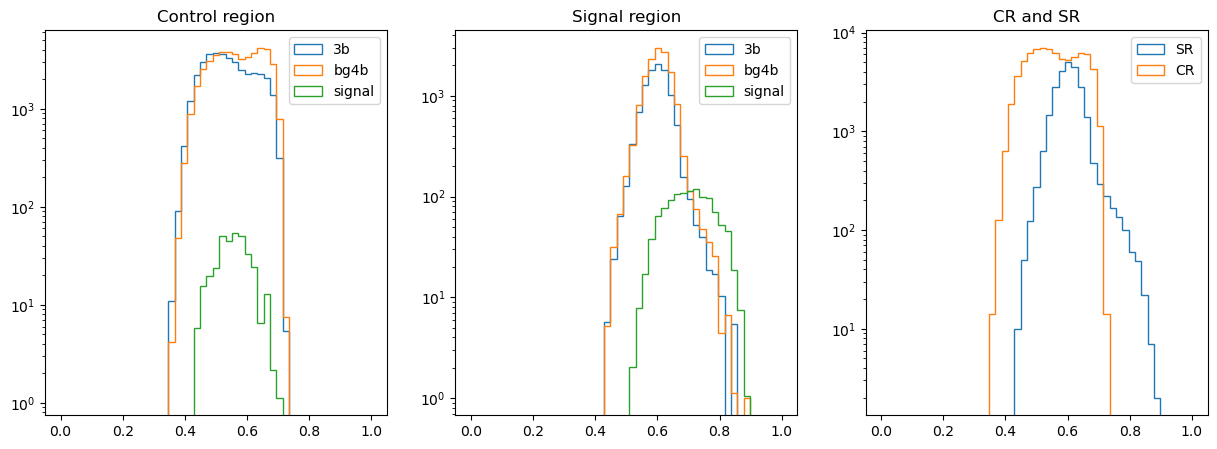

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.71it/s, v_num=2, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 25.11it/s, v_num=2, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.2373030185699463
SR w_4b / w_3b = 1.50682532787323


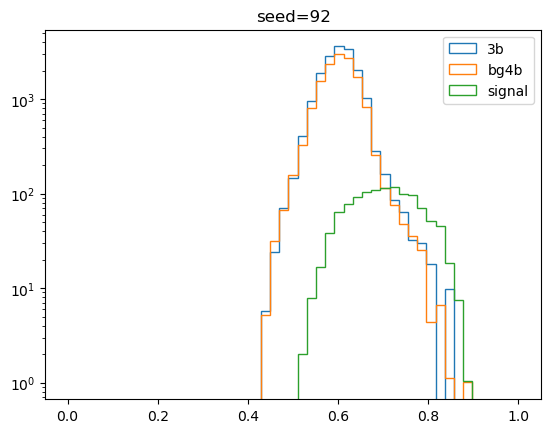

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


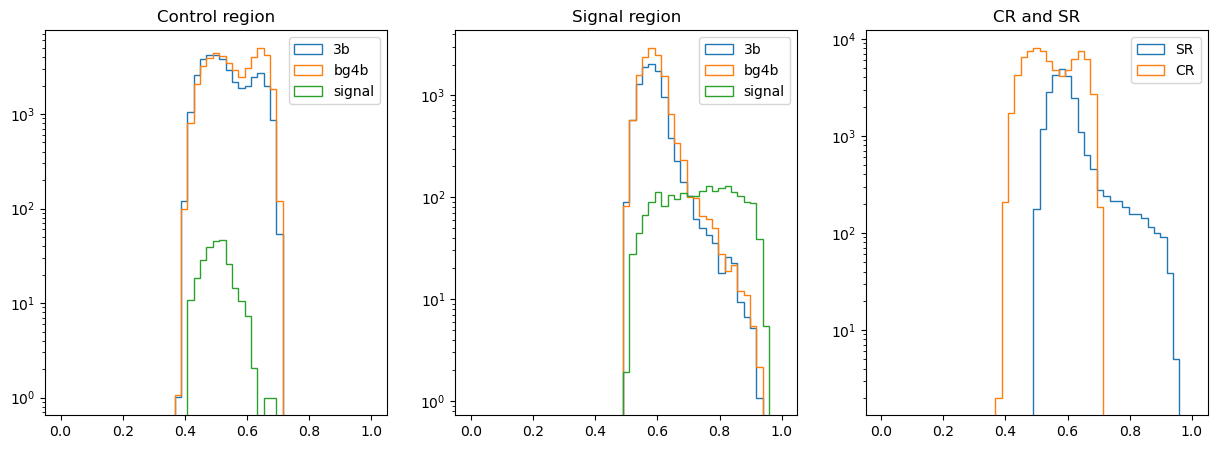

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 13: 100%|██████████| 51/51 [00:01<00:00, 28.43it/s, v_num=3, val_loss=0.676, train_loss=0.678]
CR w_4b / w_3b = 1.2457988262176514
SR w_4b / w_3b = 1.5757226943969727


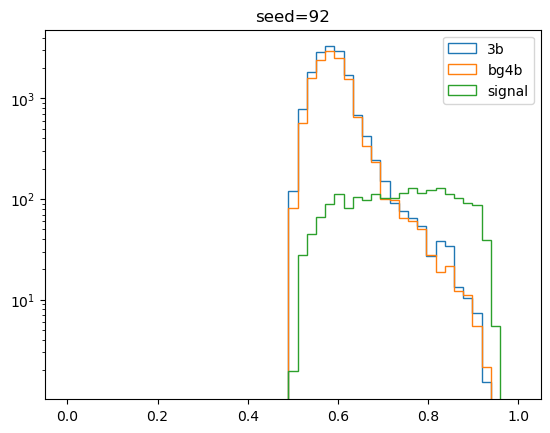

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


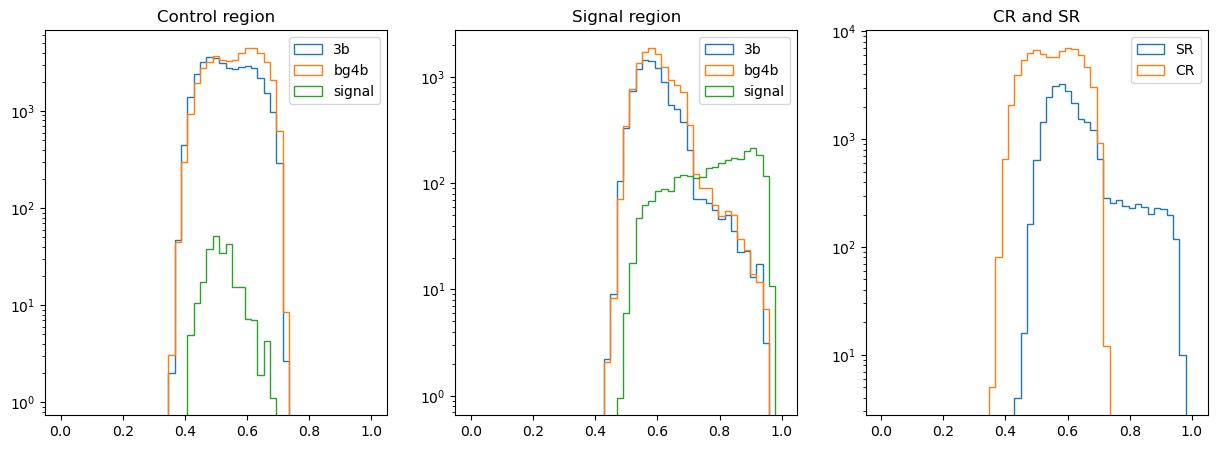

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 22.48it/s, v_num=4, val_loss=0.674, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:02<00:00, 21.21it/s, v_num=4, val_loss=0.674, train_loss=0.678]
CR w_4b / w_3b = 1.2507977485656738
SR w_4b / w_3b = 1.613921046257019


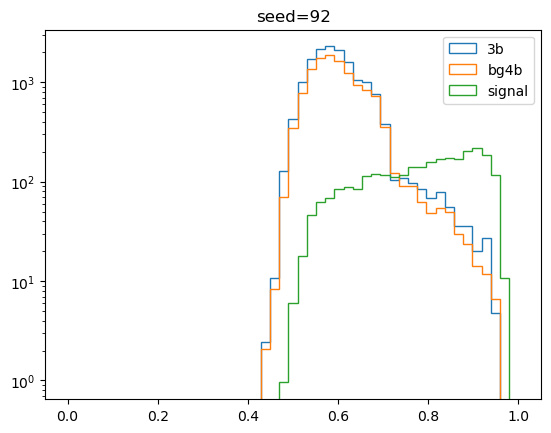

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


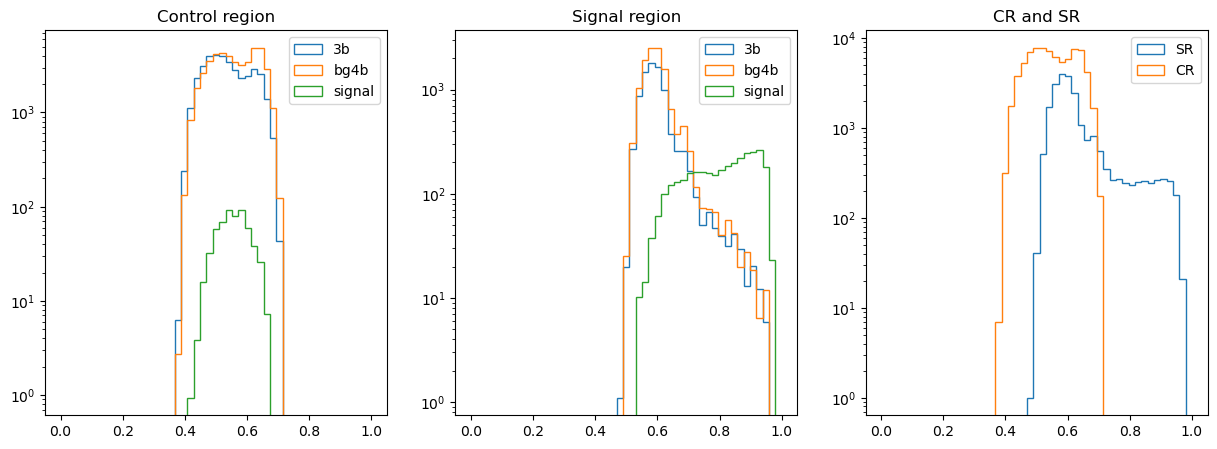

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.33it/s, v_num=5, val_loss=0.679, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.13it/s, v_num=5, val_loss=0.679, train_loss=0.677]
CR w_4b / w_3b = 1.228490948677063
SR w_4b / w_3b = 1.7903739213943481


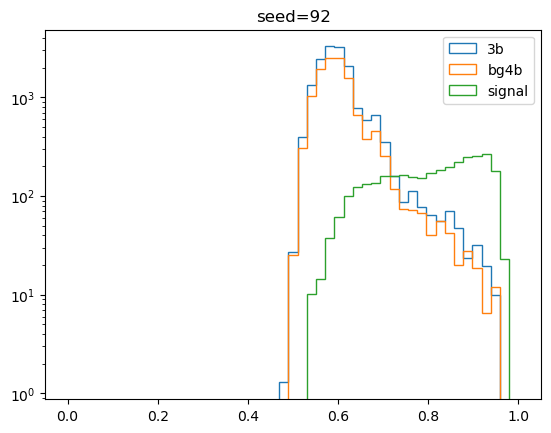

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


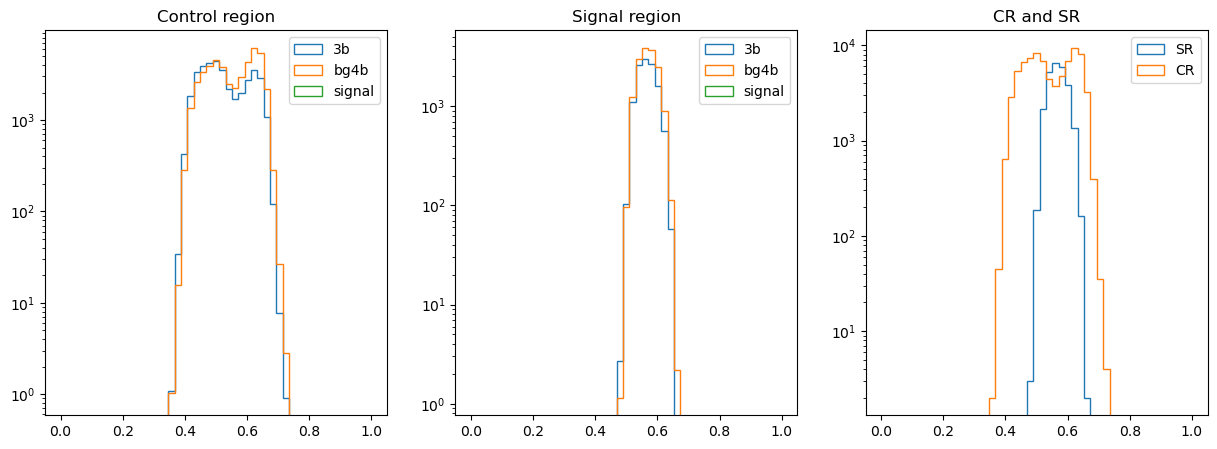

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 21.33it/s, v_num=12, val_loss=0.678, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 20.07it/s, v_num=12, val_loss=0.678, train_loss=0.676]
CR w_4b / w_3b = 1.216347098350525
SR w_4b / w_3b = 1.318062424659729


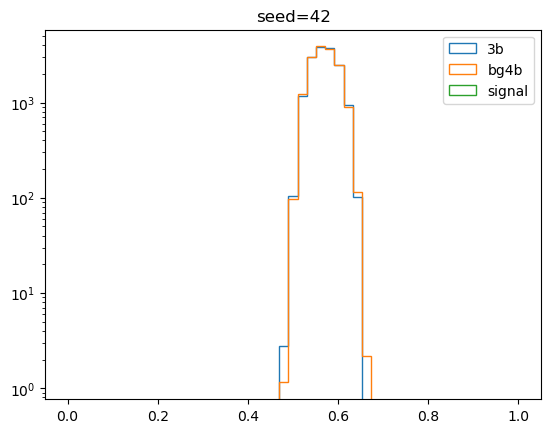

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


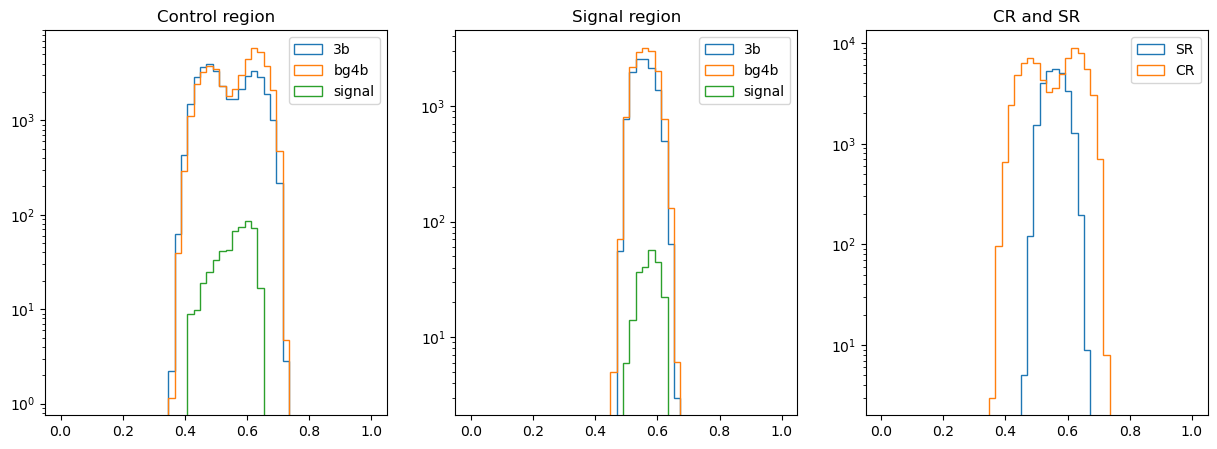

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.94it/s, v_num=13, val_loss=0.675, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.72it/s, v_num=13, val_loss=0.675, train_loss=0.674]
CR w_4b / w_3b = 1.2763549089431763
SR w_4b / w_3b = 1.2854405641555786


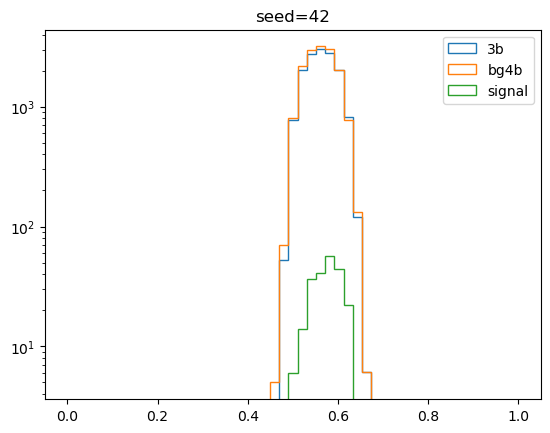

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


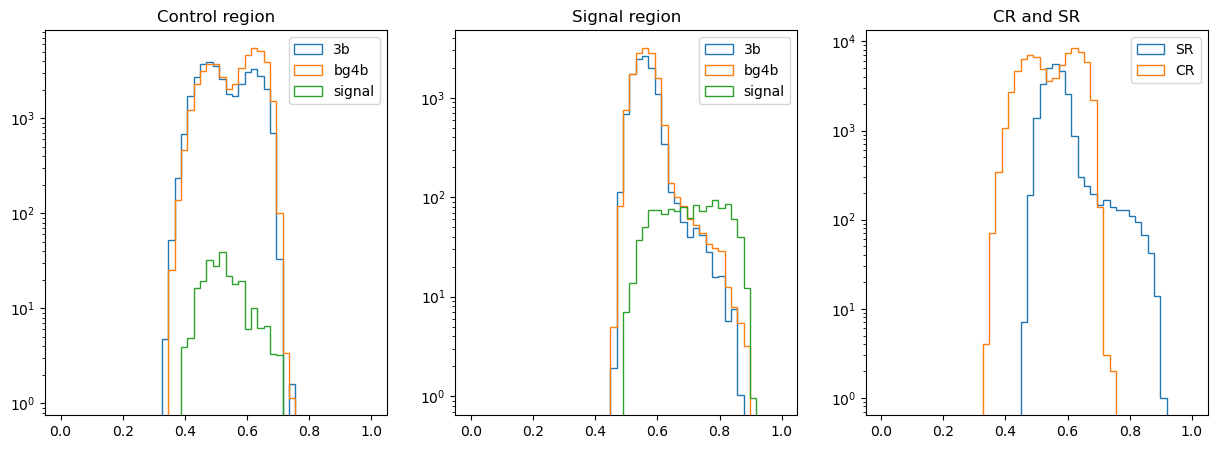

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.73it/s, v_num=14, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.74it/s, v_num=14, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.248443365097046
SR w_4b / w_3b = 1.3360223770141602


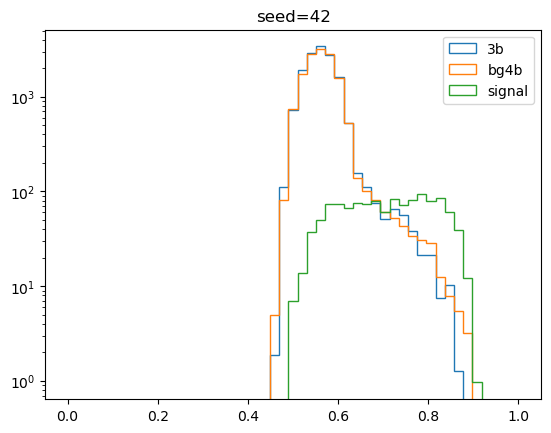

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


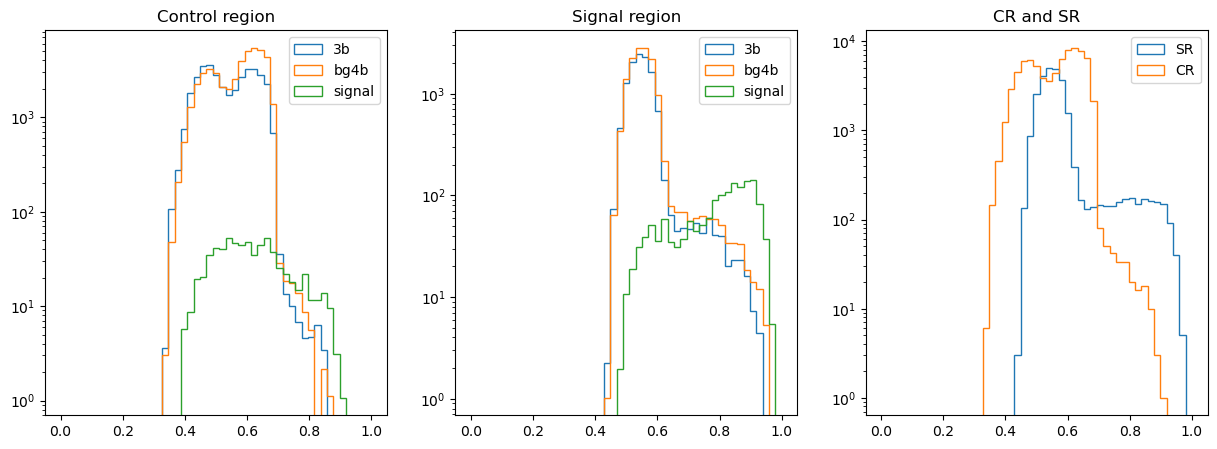

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.33it/s, v_num=15, val_loss=0.676, train_loss=0.674]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.07it/s, v_num=15, val_loss=0.676, train_loss=0.674]
CR w_4b / w_3b = 1.2707772254943848
SR w_4b / w_3b = 1.3260928392410278


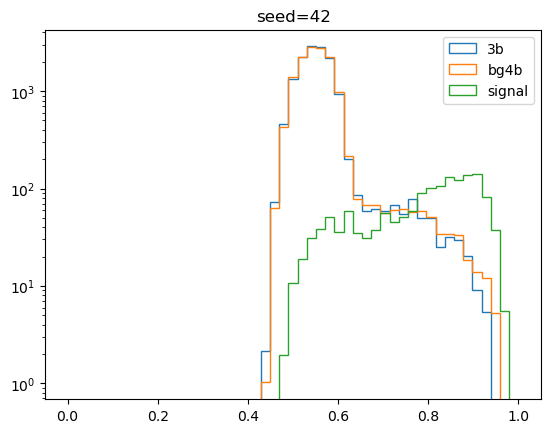

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


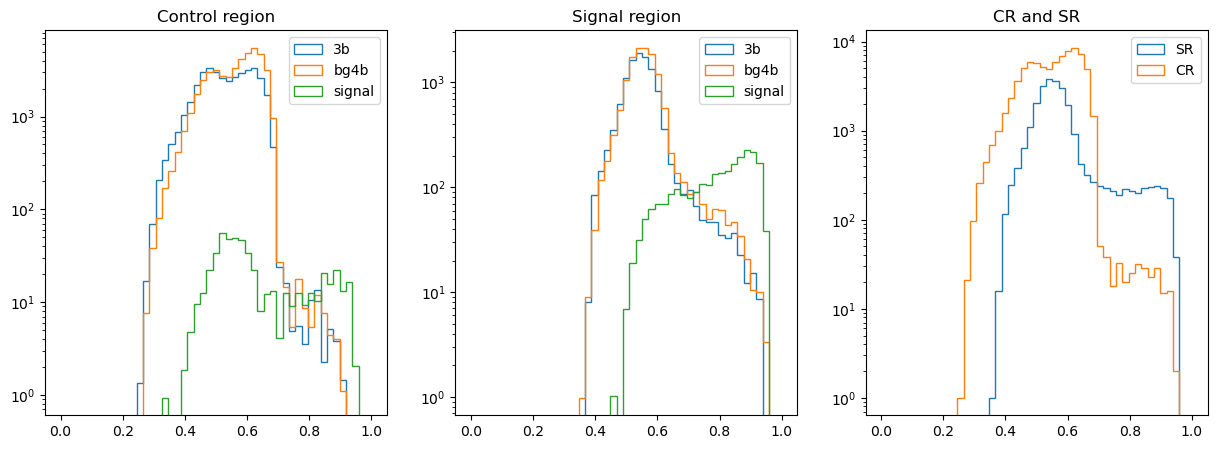

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.27it/s, v_num=16, val_loss=0.677, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 24.42it/s, v_num=16, val_loss=0.677, train_loss=0.676]
CR w_4b / w_3b = 1.2206891775131226
SR w_4b / w_3b = 1.370202660560608


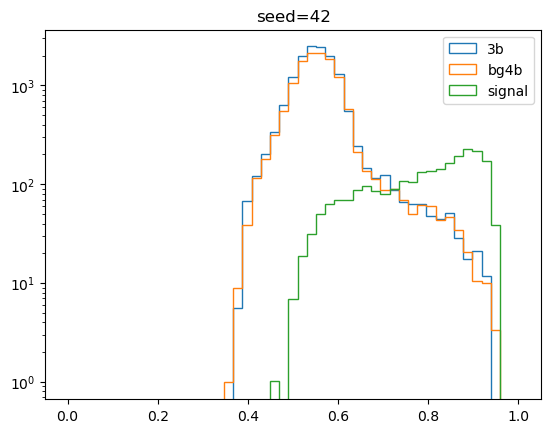

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 42, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


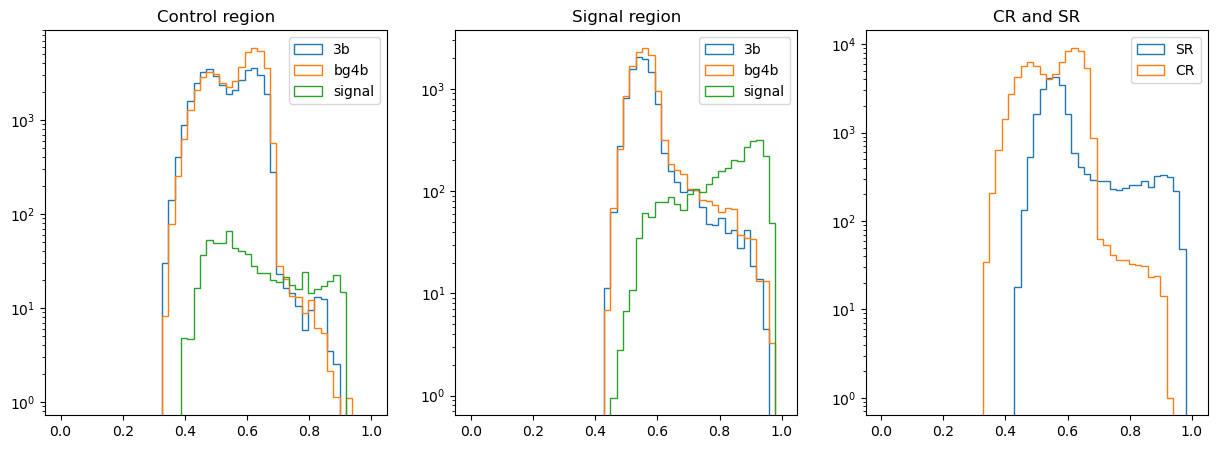

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.80it/s, v_num=17, val_loss=0.676, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.42it/s, v_num=17, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.2663384675979614
SR w_4b / w_3b = 1.514439344406128


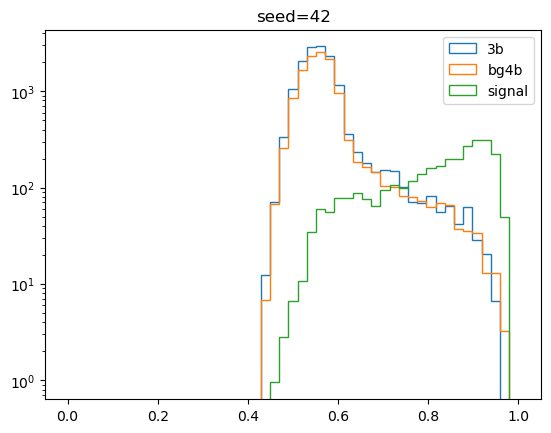

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


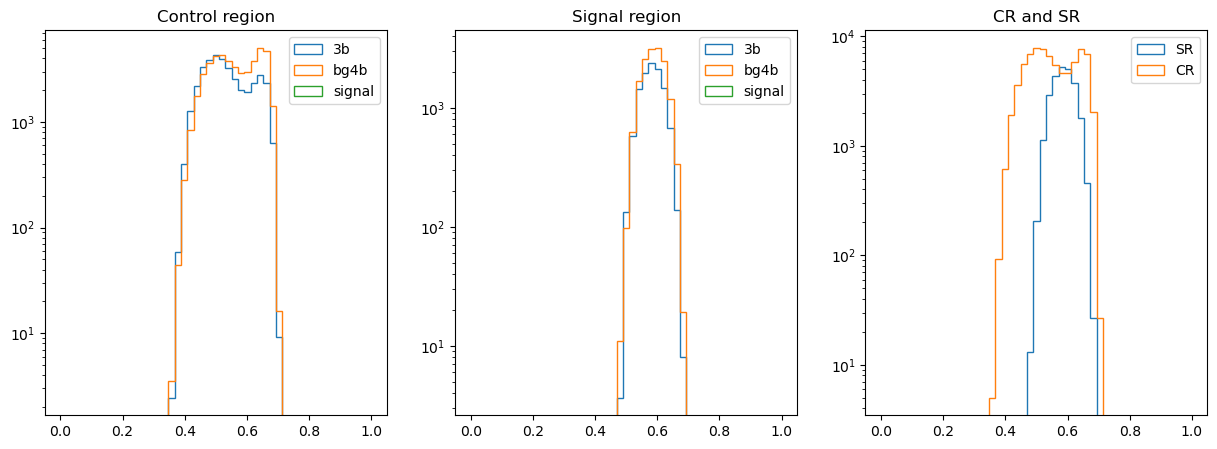

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.35it/s, v_num=12, val_loss=0.676, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.24it/s, v_num=12, val_loss=0.676, train_loss=0.678]
CR w_4b / w_3b = 1.2291557788848877
SR w_4b / w_3b = 1.3944776058197021


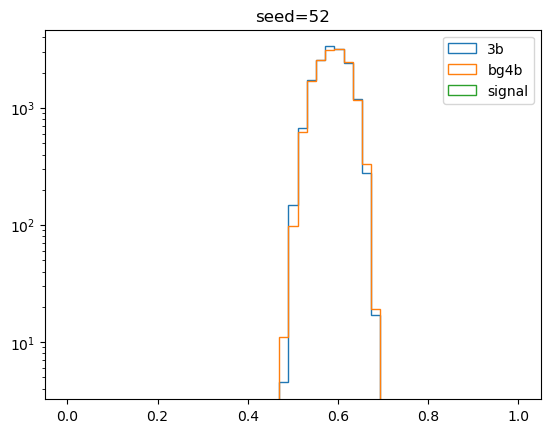

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


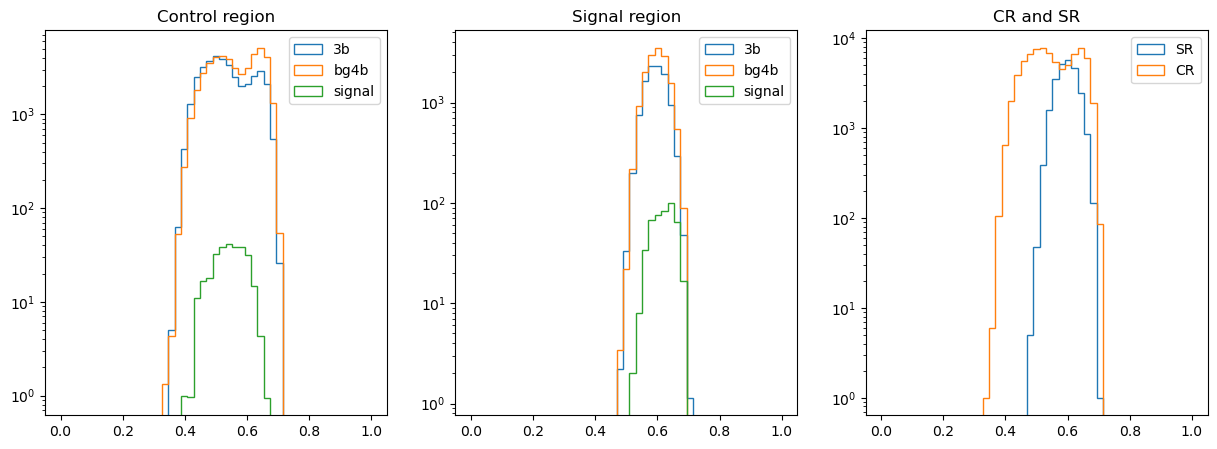

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.19it/s, v_num=13, val_loss=0.678, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.96it/s, v_num=13, val_loss=0.678, train_loss=0.678]
CR w_4b / w_3b = 1.222872257232666
SR w_4b / w_3b = 1.4528570175170898


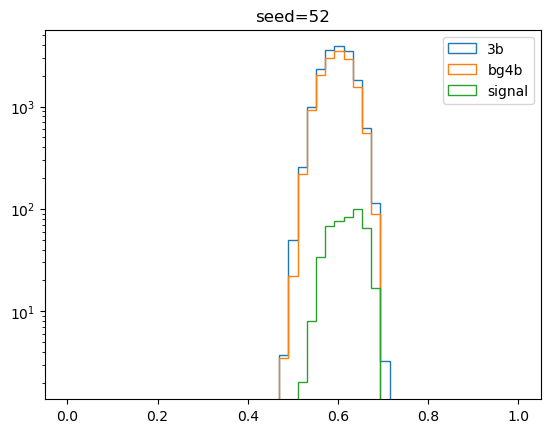

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


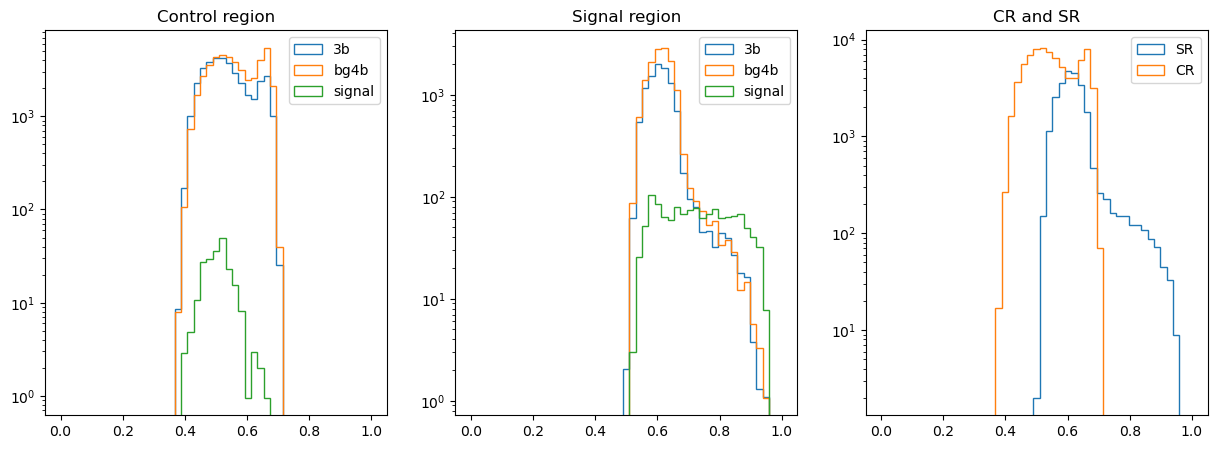

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 15: 100%|██████████| 51/51 [00:01<00:00, 28.58it/s, v_num=14, val_loss=0.679, train_loss=0.678]
CR w_4b / w_3b = 1.2250880002975464
SR w_4b / w_3b = 1.5576894283294678


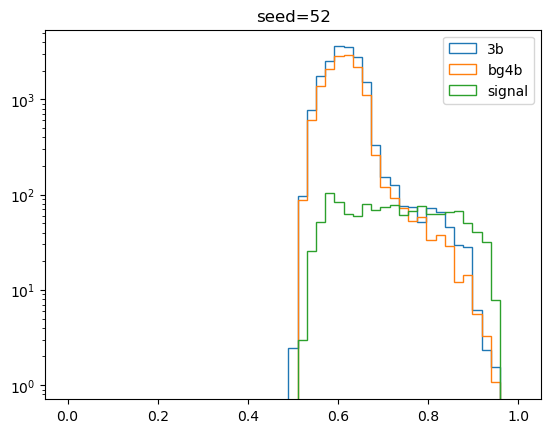

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


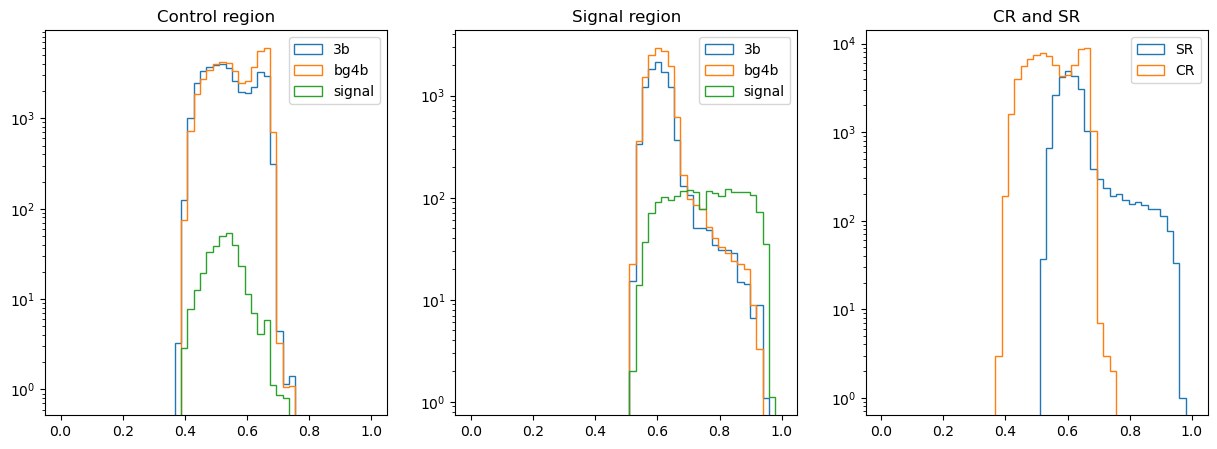

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.67it/s, v_num=15, val_loss=0.680, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.01it/s, v_num=15, val_loss=0.680, train_loss=0.678]
CR w_4b / w_3b = 1.2230345010757446
SR w_4b / w_3b = 1.6223180294036865


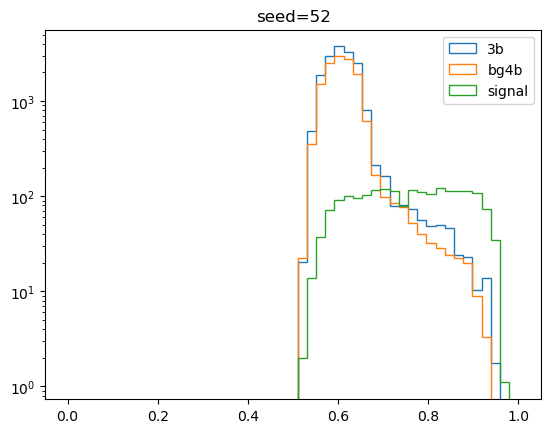

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


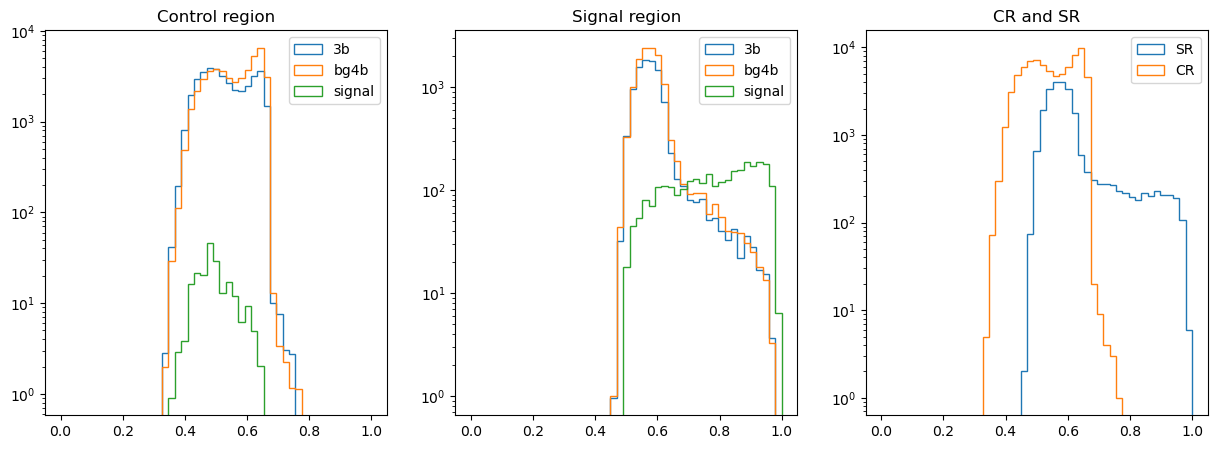

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 18.51it/s, v_num=16, val_loss=0.676, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 18.43it/s, v_num=16, val_loss=0.676, train_loss=0.679]
CR w_4b / w_3b = 1.205550193786621
SR w_4b / w_3b = 1.5595020055770874


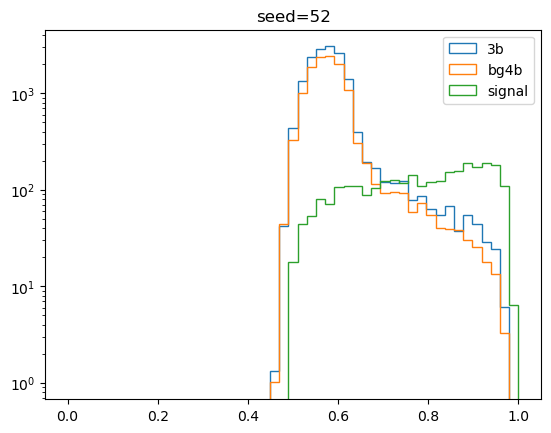

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 52, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


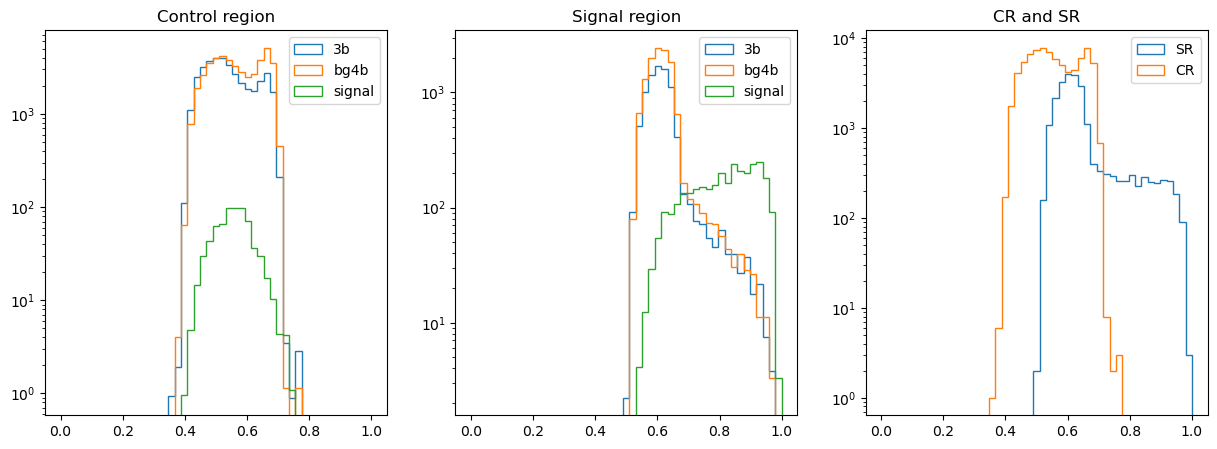

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.67it/s, v_num=17, val_loss=0.677, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 31.53it/s, v_num=17, val_loss=0.677, train_loss=0.679]
CR w_4b / w_3b = 1.2290828227996826
SR w_4b / w_3b = 1.7724409103393555


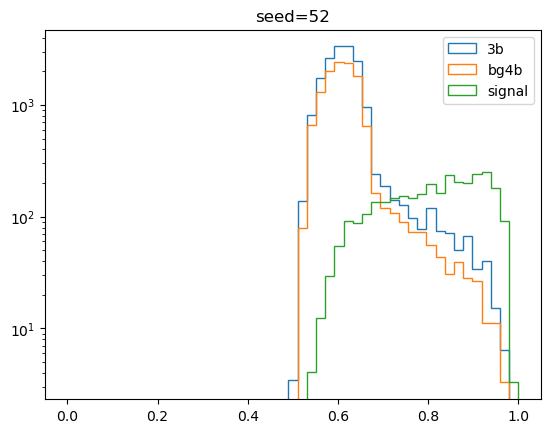

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


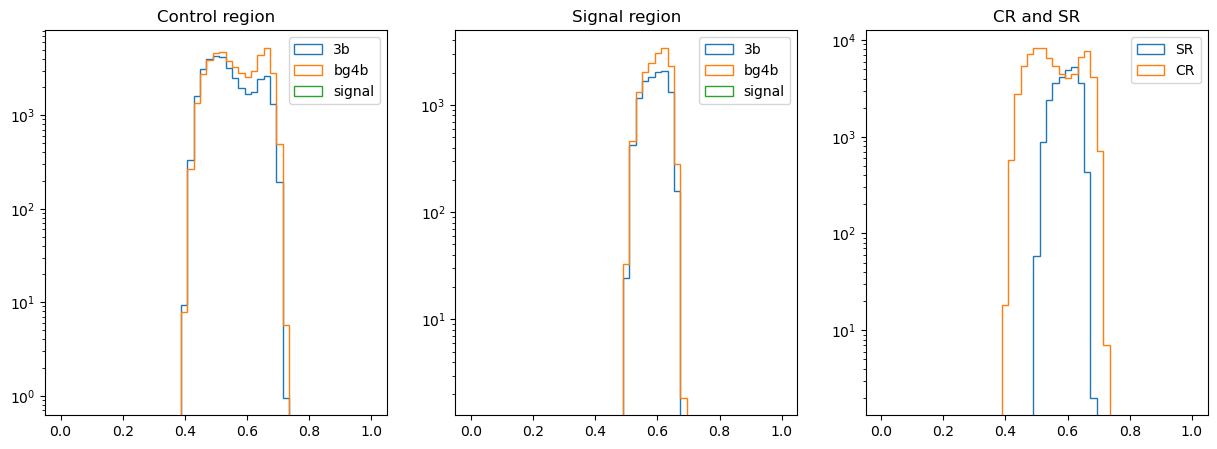

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 17: 100%|██████████| 49/49 [00:01<00:00, 27.47it/s, v_num=8, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.3025052547454834
SR w_4b / w_3b = 1.4382381439208984


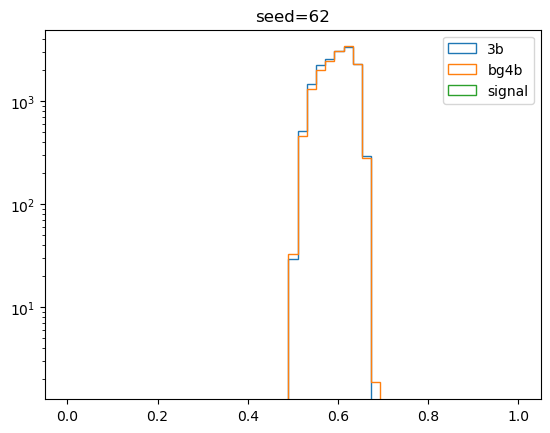

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


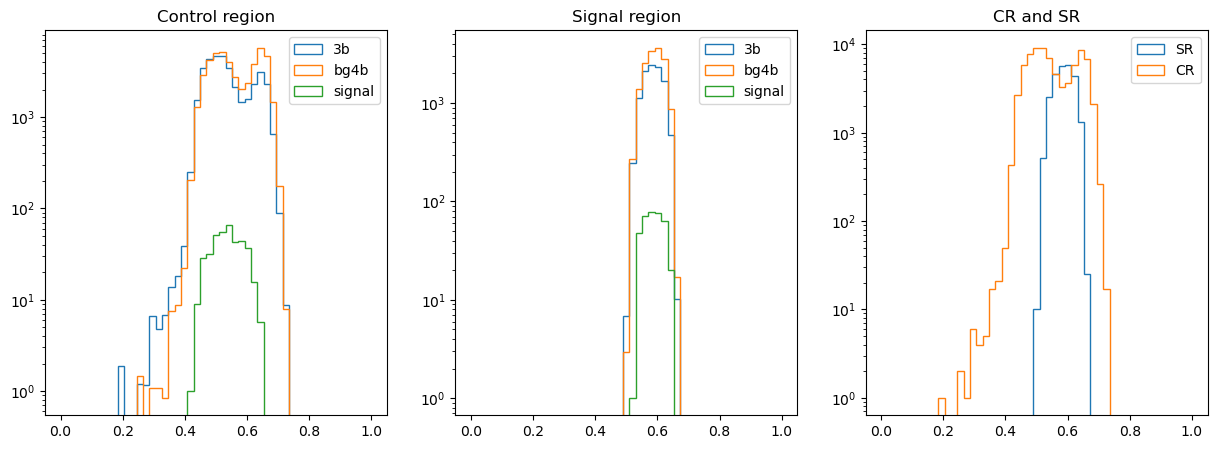

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.53it/s, v_num=9, val_loss=0.678, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.75it/s, v_num=9, val_loss=0.678, train_loss=0.677]
CR w_4b / w_3b = 1.275943636894226
SR w_4b / w_3b = 1.4707098007202148


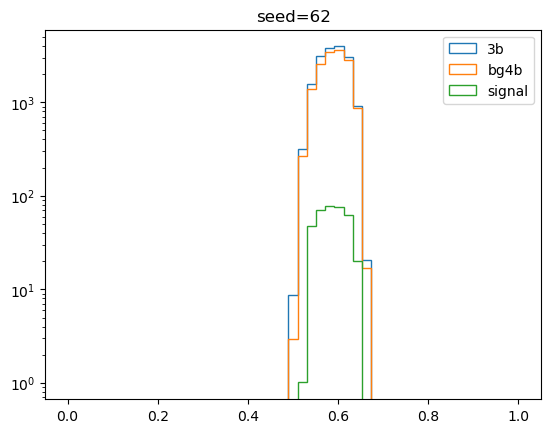

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


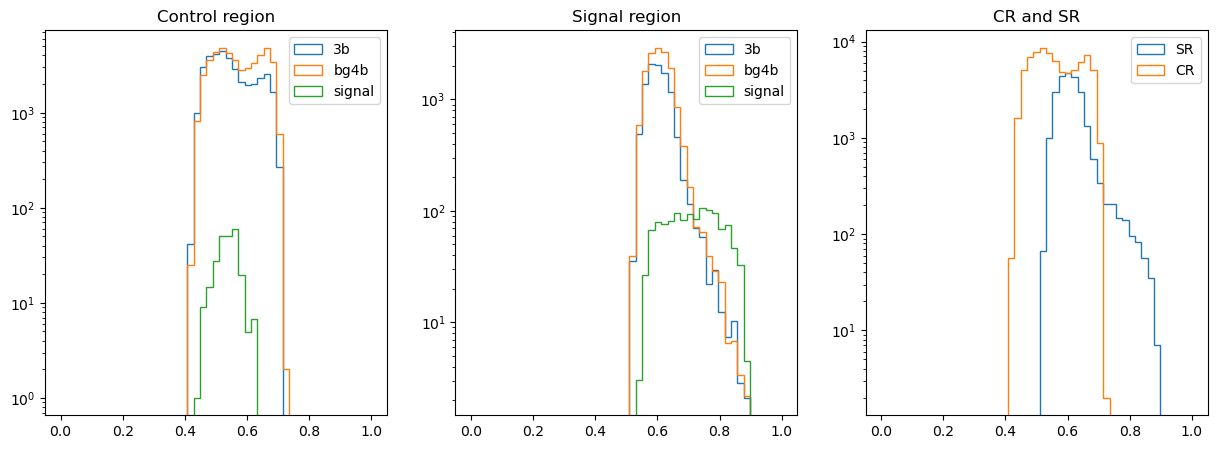

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 17: 100%|██████████| 50/50 [00:01<00:00, 27.41it/s, v_num=10, val_loss=0.676, train_loss=0.676]
CR w_4b / w_3b = 1.282334804534912
SR w_4b / w_3b = 1.5466853380203247


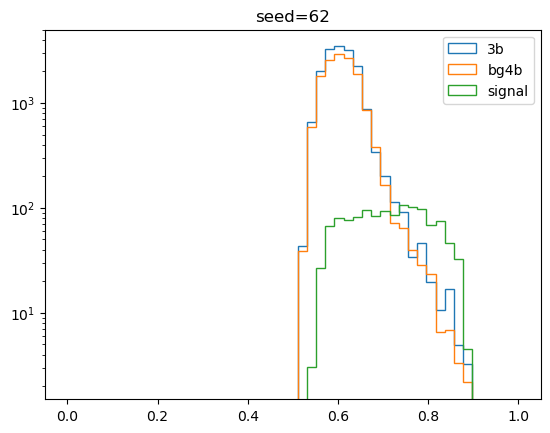

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


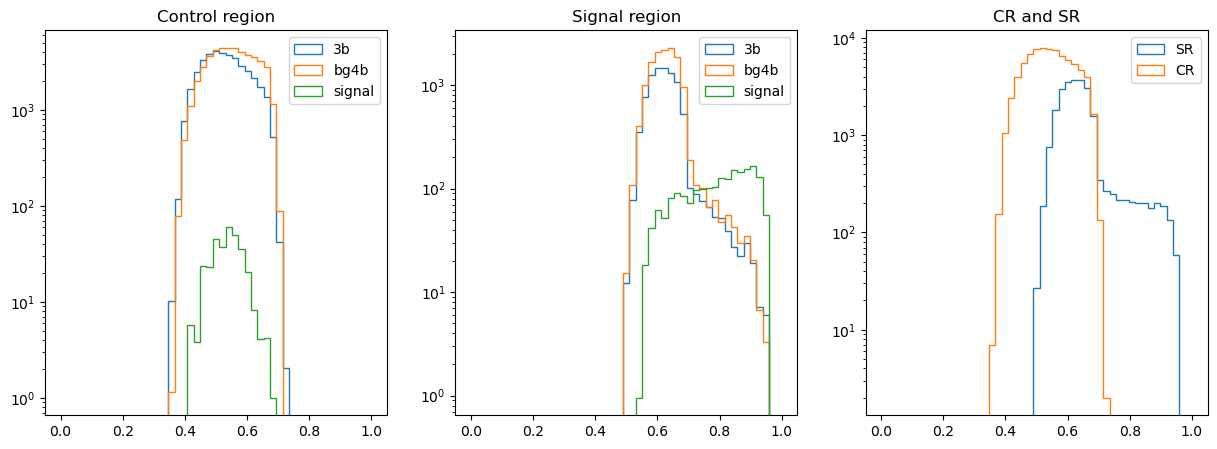

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.05it/s, v_num=11, val_loss=0.680, train_loss=0.680]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.79it/s, v_num=11, val_loss=0.680, train_loss=0.680]
CR w_4b / w_3b = 1.1977156400680542
SR w_4b / w_3b = 1.7349778413772583


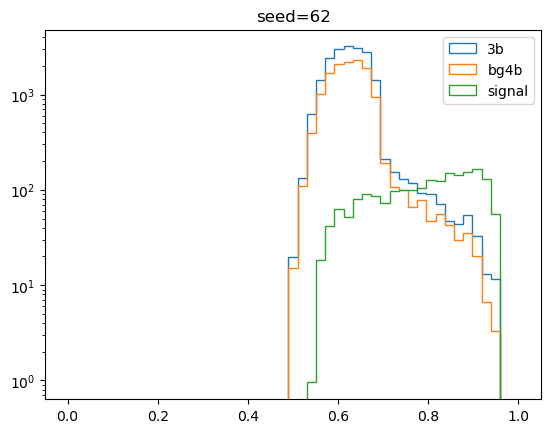

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


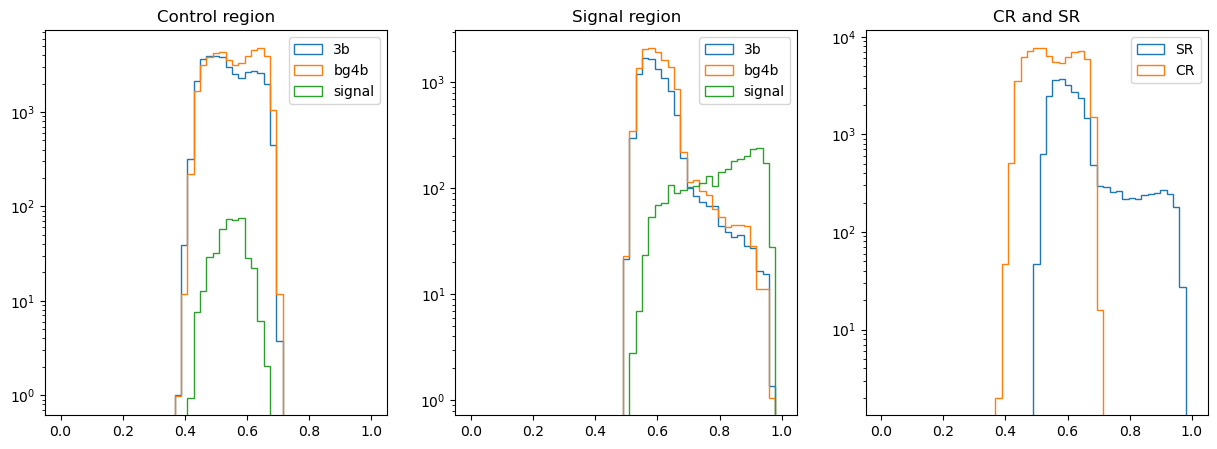

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.77it/s, v_num=12, val_loss=0.680, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.37it/s, v_num=12, val_loss=0.680, train_loss=0.677]
CR w_4b / w_3b = 1.270342469215393
SR w_4b / w_3b = 1.6264474391937256


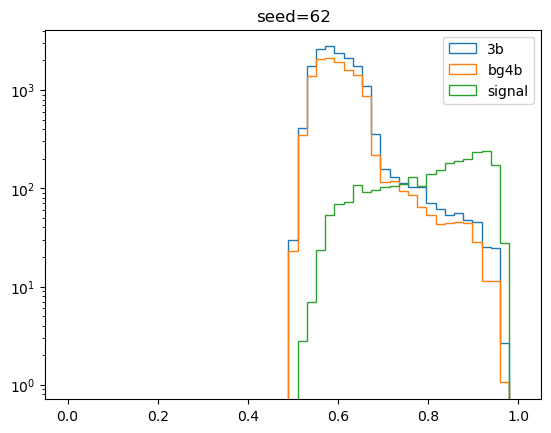

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 62, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


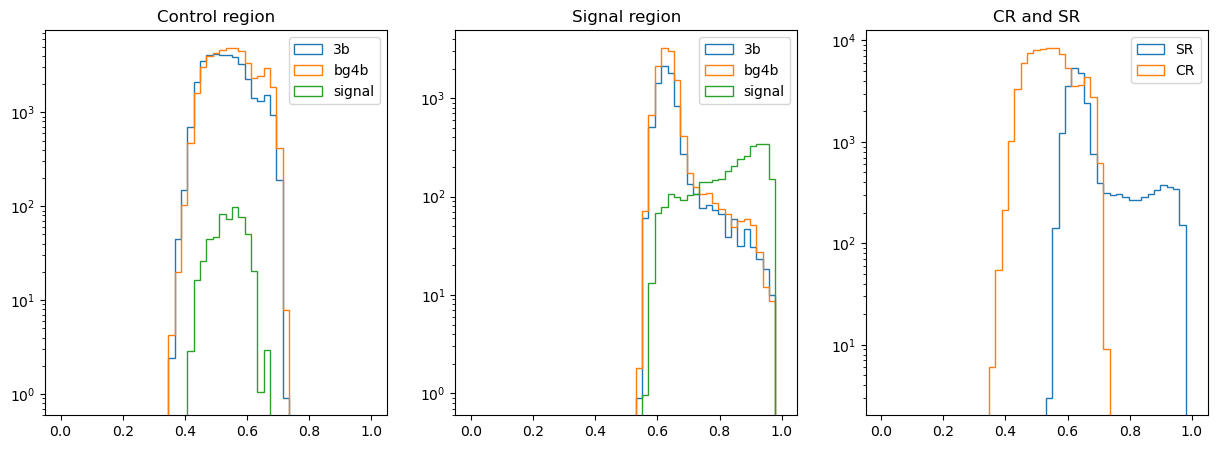

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.90it/s, v_num=13, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.68it/s, v_num=13, val_loss=0.681, train_loss=0.681]
CR w_4b / w_3b = 1.2251149415969849
SR w_4b / w_3b = 1.9610939025878906


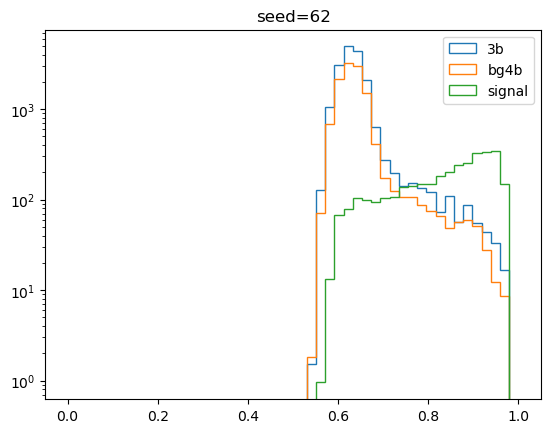

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


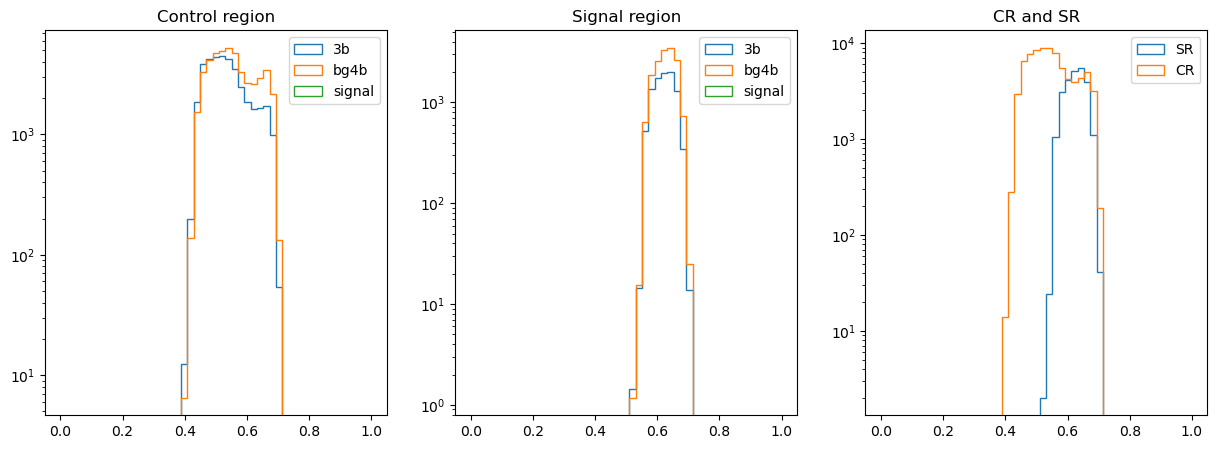

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.26it/s, v_num=6, val_loss=0.682, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.31it/s, v_num=6, val_loss=0.682, train_loss=0.679]
CR w_4b / w_3b = 1.2385144233703613
SR w_4b / w_3b = 1.6542397737503052


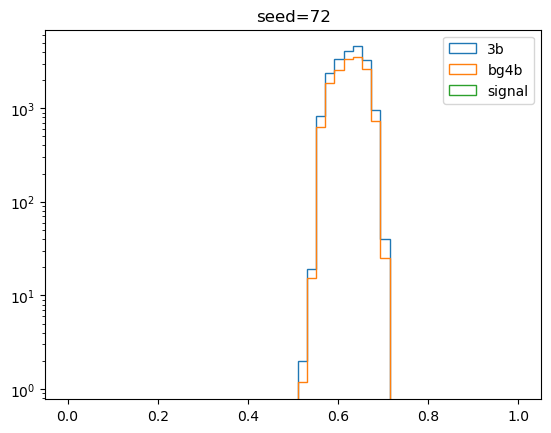

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


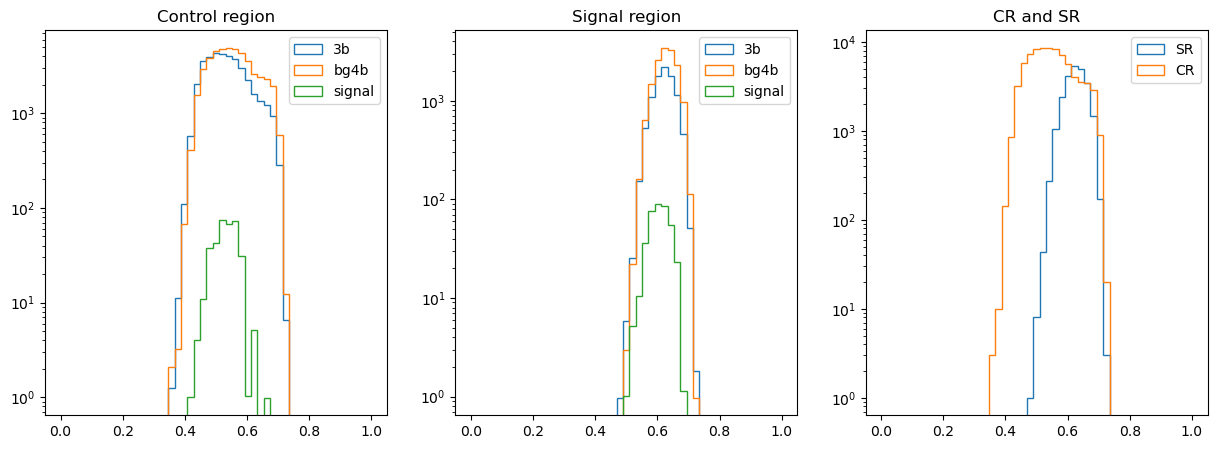

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.30it/s, v_num=7, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.41it/s, v_num=7, val_loss=0.681, train_loss=0.681]
CR w_4b / w_3b = 1.233932614326477
SR w_4b / w_3b = 1.6605008840560913


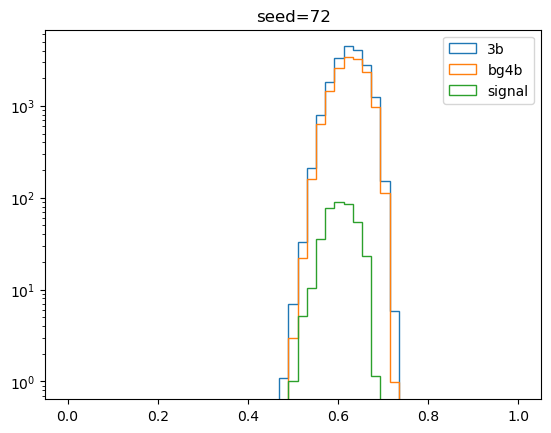

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


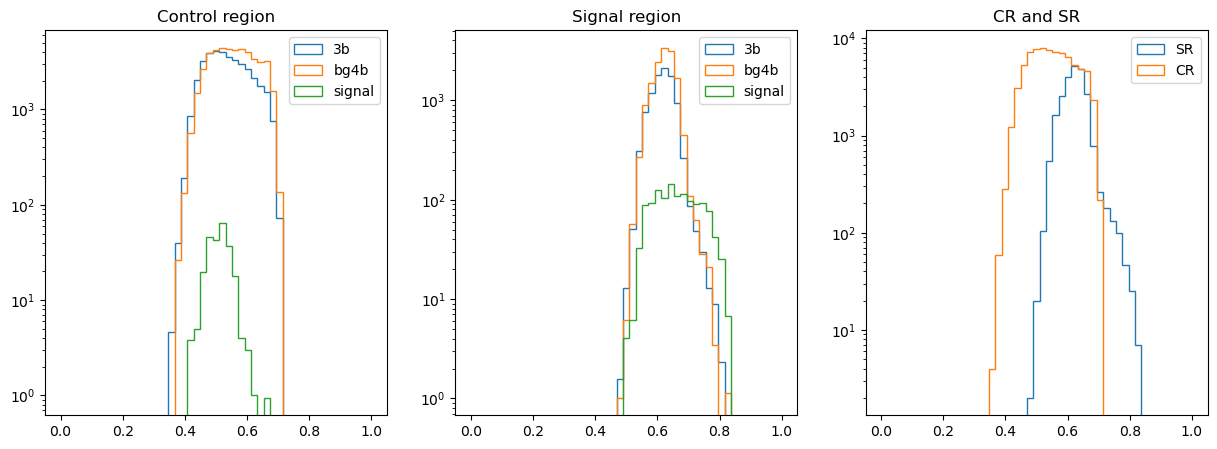

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.49it/s, v_num=8, val_loss=0.681, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.71it/s, v_num=8, val_loss=0.681, train_loss=0.678]
CR w_4b / w_3b = 1.2385783195495605
SR w_4b / w_3b = 1.6375426054000854


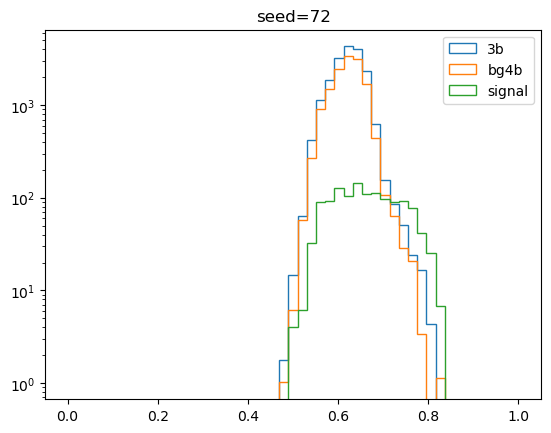

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


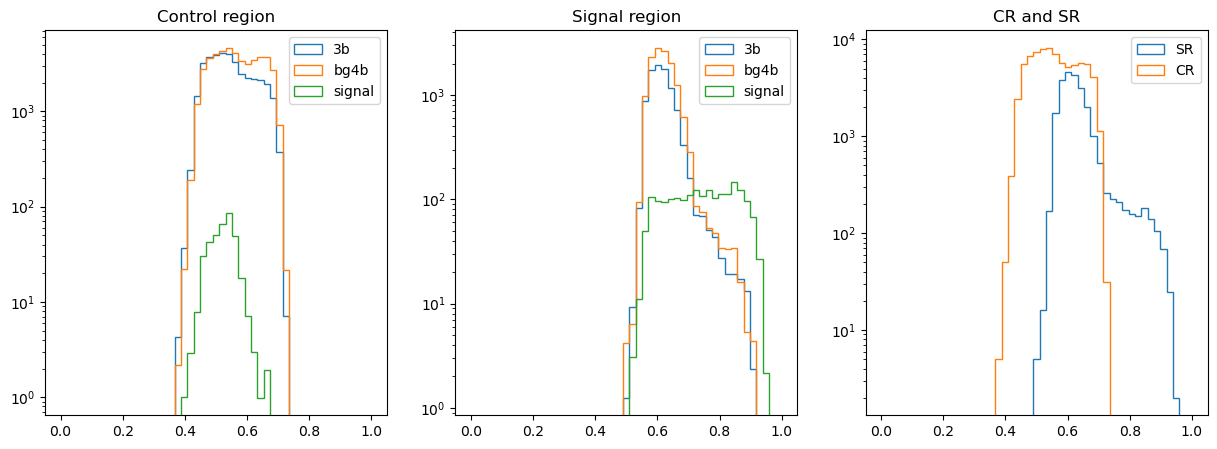

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 16: 100%|██████████| 51/51 [00:02<00:00, 20.72it/s, v_num=9, val_loss=0.679, train_loss=0.679]
CR w_4b / w_3b = 1.2589598894119263
SR w_4b / w_3b = 1.677027702331543


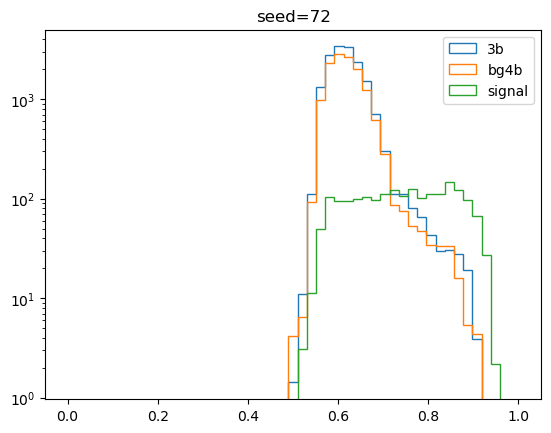

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


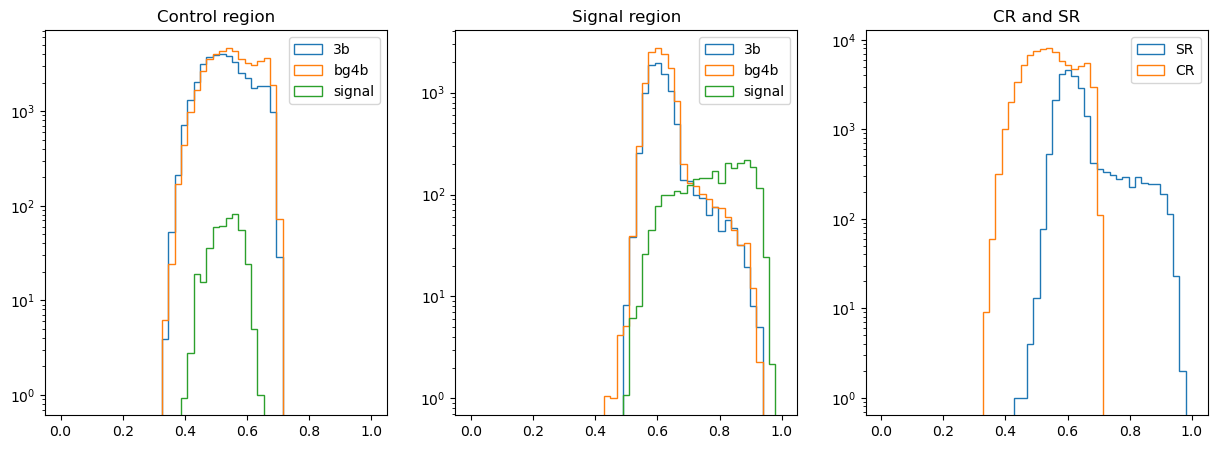

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 15: 100%|██████████| 51/51 [00:01<00:00, 27.25it/s, v_num=10, val_loss=0.678, train_loss=0.679]
CR w_4b / w_3b = 1.2265843152999878
SR w_4b / w_3b = 1.7012137174606323


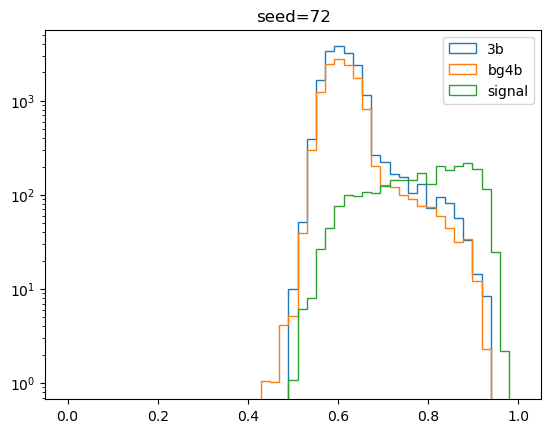

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 72, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


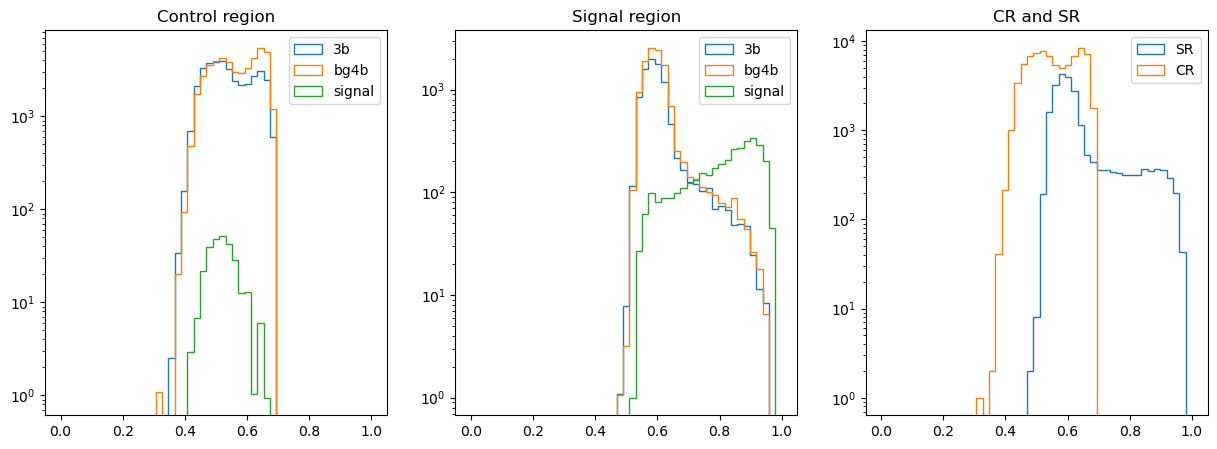

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 29.92it/s, v_num=11, val_loss=0.680, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.06it/s, v_num=11, val_loss=0.680, train_loss=0.677]
CR w_4b / w_3b = 1.2469221353530884
SR w_4b / w_3b = 1.672059416770935


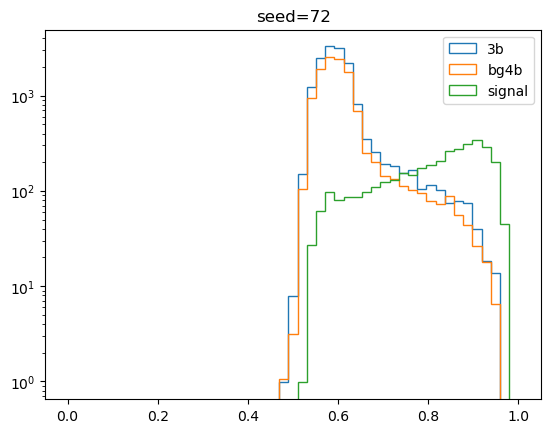

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


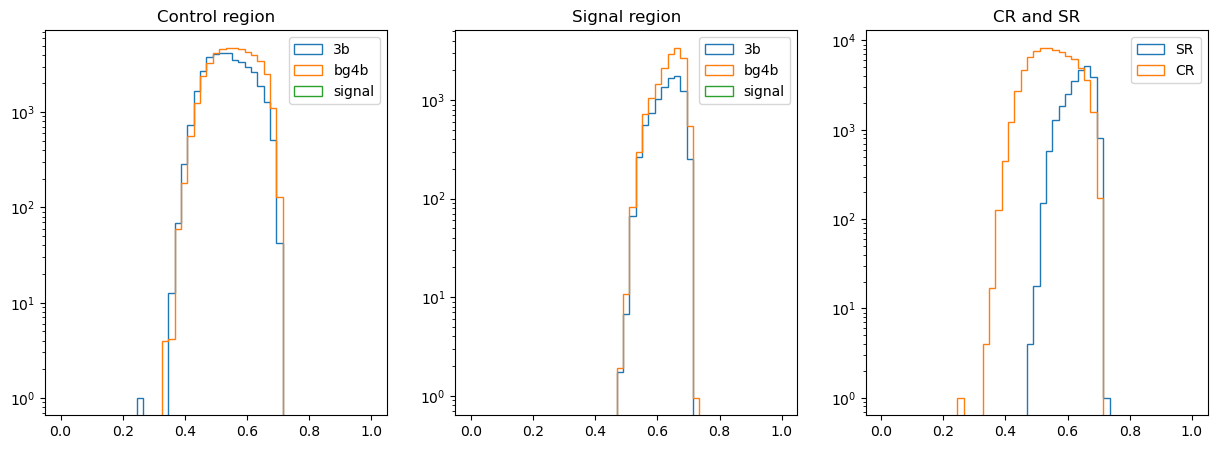

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.67it/s, v_num=6, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 25.09it/s, v_num=6, val_loss=0.681, train_loss=0.681]
CR w_4b / w_3b = 1.2174603939056396
SR w_4b / w_3b = 1.714770793914795


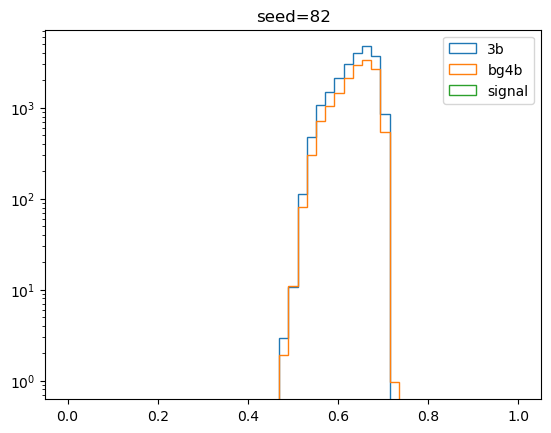

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


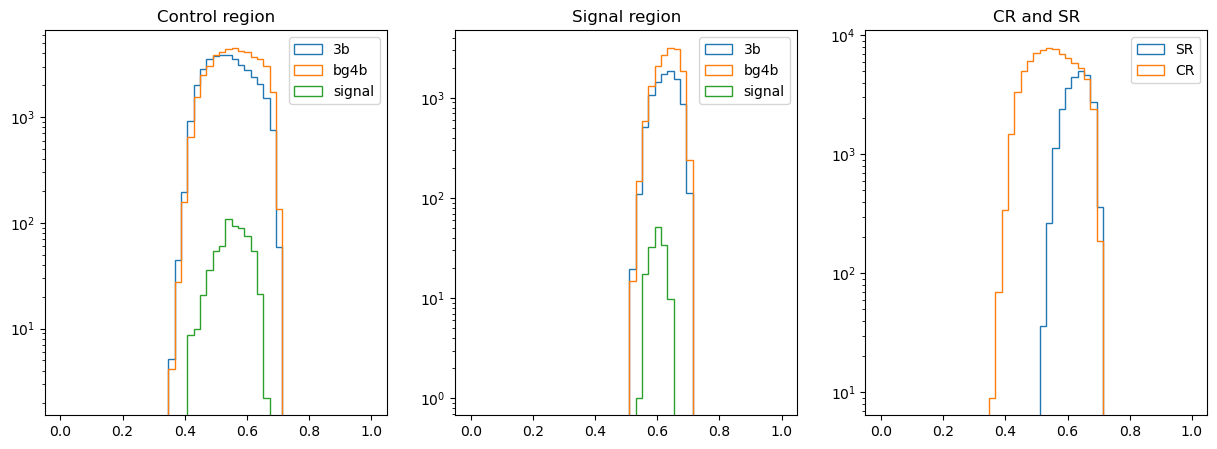

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.65it/s, v_num=7, val_loss=0.681, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 29.21it/s, v_num=7, val_loss=0.681, train_loss=0.679]
CR w_4b / w_3b = 1.2332854270935059
SR w_4b / w_3b = 1.6528661251068115


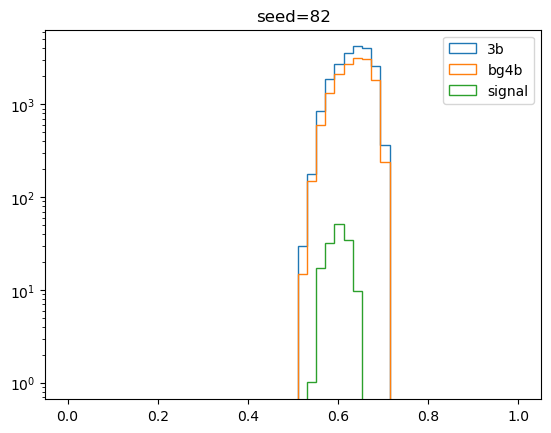

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


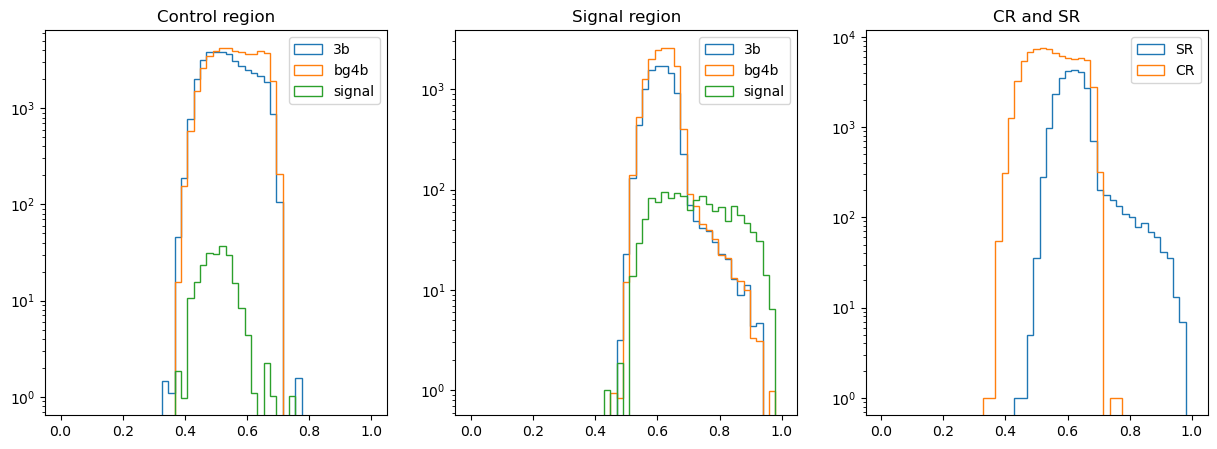

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 28.13it/s, v_num=8, val_loss=0.679, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 26.41it/s, v_num=8, val_loss=0.679, train_loss=0.678]
CR w_4b / w_3b = 1.2419544458389282
SR w_4b / w_3b = 1.6143603324890137


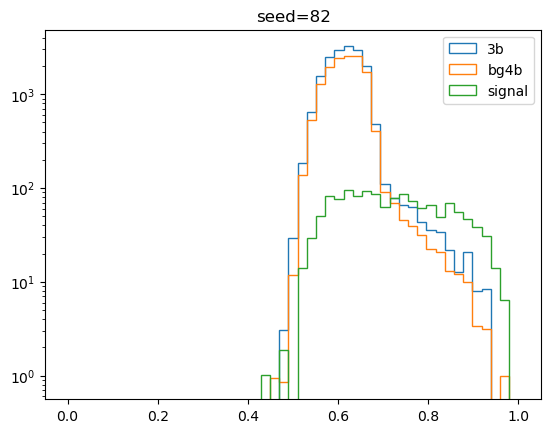

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


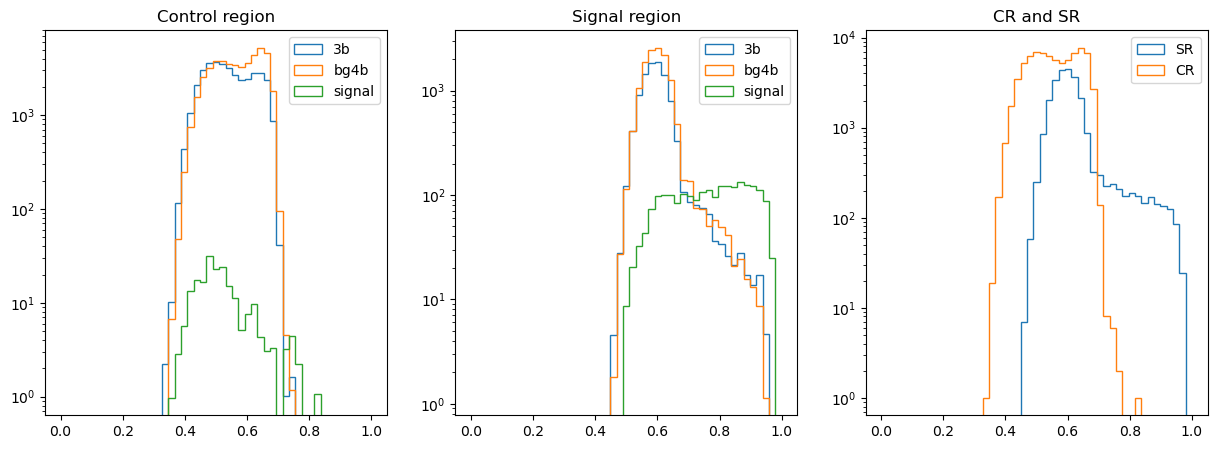

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.85it/s, v_num=9, val_loss=0.678, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 50/50 [00:01<00:00, 27.59it/s, v_num=9, val_loss=0.678, train_loss=0.677]
CR w_4b / w_3b = 1.238817572593689
SR w_4b / w_3b = 1.565352439880371


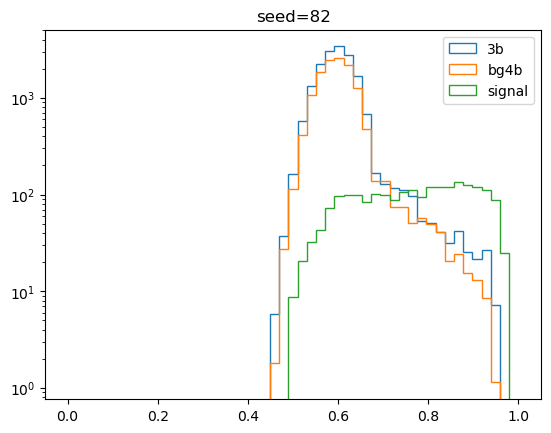

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


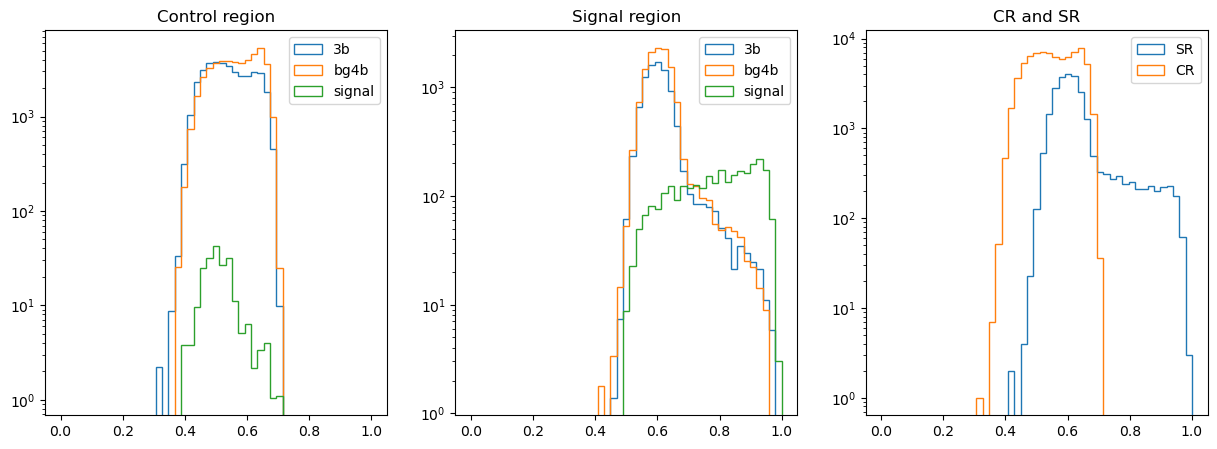

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.10it/s, v_num=10, val_loss=0.680, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 27.46it/s, v_num=10, val_loss=0.680, train_loss=0.679]
CR w_4b / w_3b = 1.2166731357574463
SR w_4b / w_3b = 1.6669422388076782


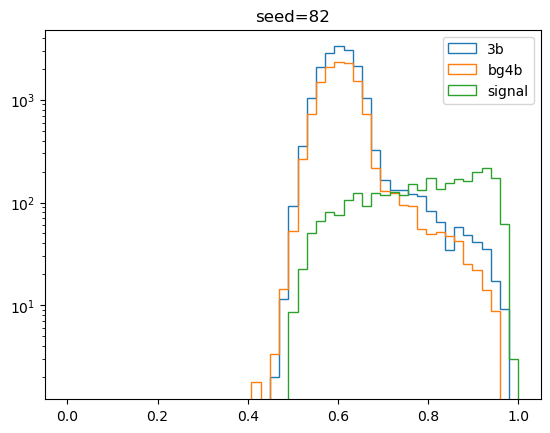

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 82, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


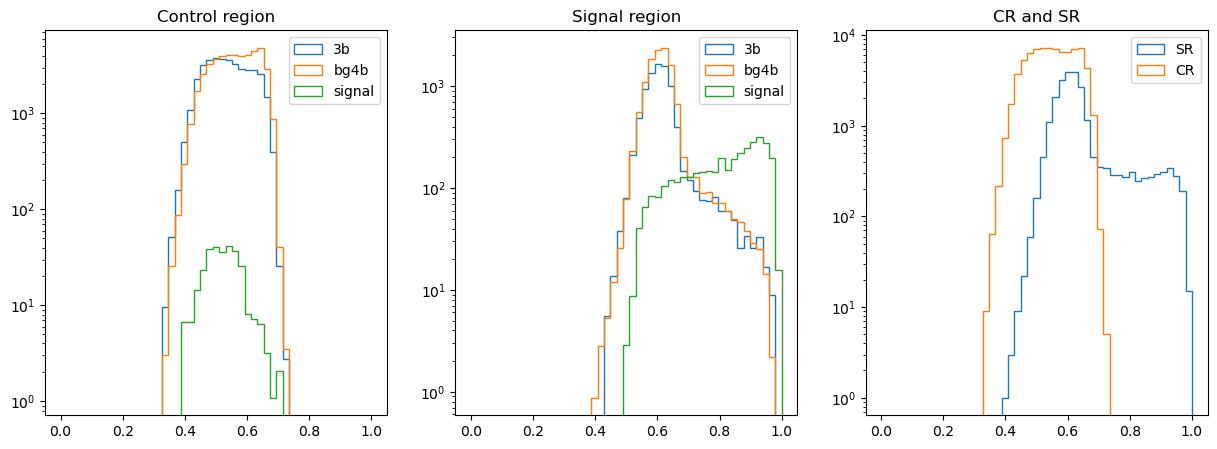

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.79it/s, v_num=11, val_loss=0.682, train_loss=0.678]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.51it/s, v_num=11, val_loss=0.682, train_loss=0.678]
CR w_4b / w_3b = 1.2039649486541748
SR w_4b / w_3b = 1.7736941576004028


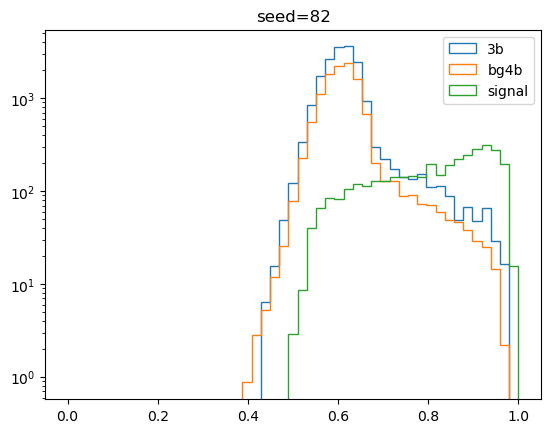

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.0}


/home/soheuny/HH4bsim/playground/dataset.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  total_w_bg4b / total_w_signal
/home/soheuny/HH4bsim/playground/dataset.py:151: RuntimeWarning: invalid value encountered in multiply
  df_signal["weight"] *= (signal_ratio / (1 - signal_ratio)) * (
/home/soheuny/HH4bsim/playground/dataset.py:155: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_3b, df_bg4b, df_signal])
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


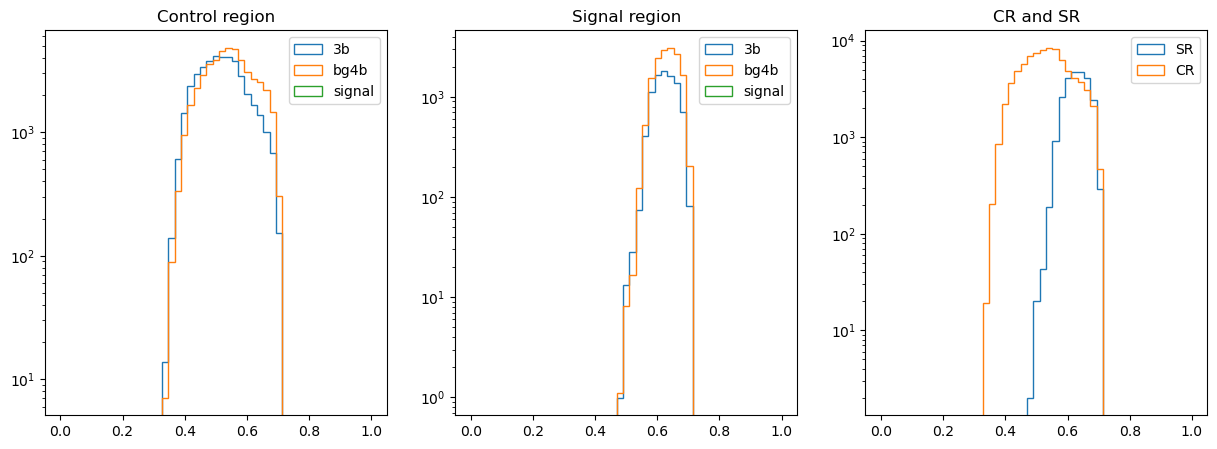

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 52/52 [00:01<00:00, 27.39it/s, v_num=6, val_loss=0.681, train_loss=0.681]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 52/52 [00:02<00:00, 25.71it/s, v_num=6, val_loss=0.681, train_loss=0.681]
CR w_4b / w_3b = 1.1319270133972168
SR w_4b / w_3b = 1.7160893678665161


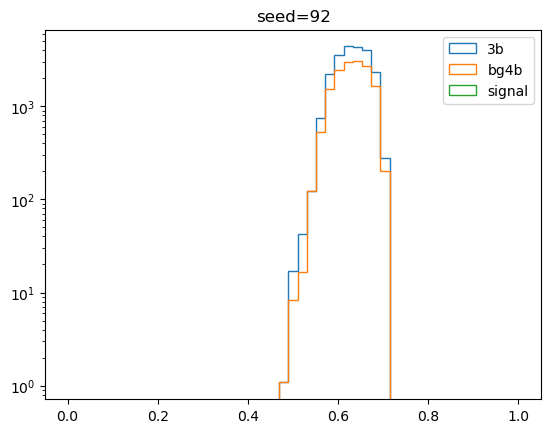

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.01}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


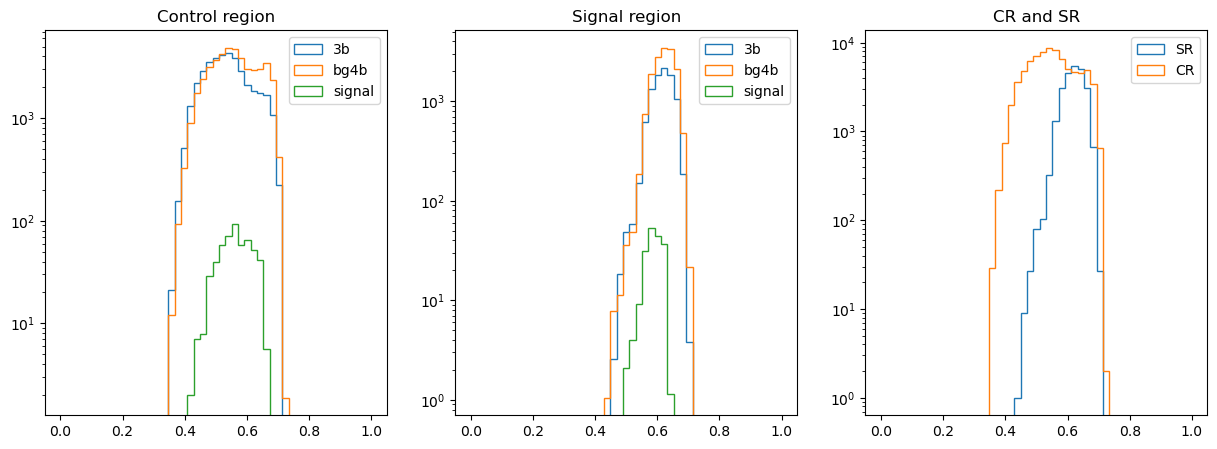

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 28.88it/s, v_num=7, val_loss=0.679, train_loss=0.679]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 26.67it/s, v_num=7, val_loss=0.679, train_loss=0.679]
CR w_4b / w_3b = 1.196723461151123
SR w_4b / w_3b = 1.640624761581421


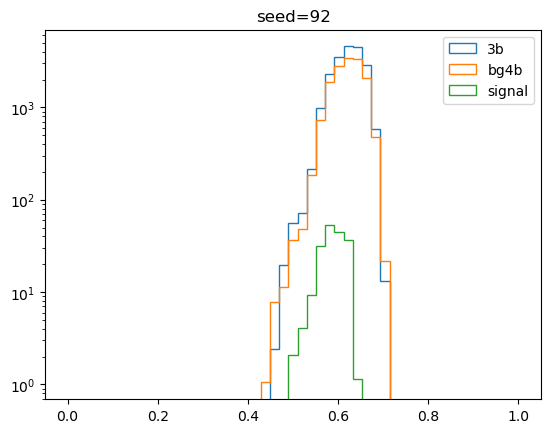

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.02}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


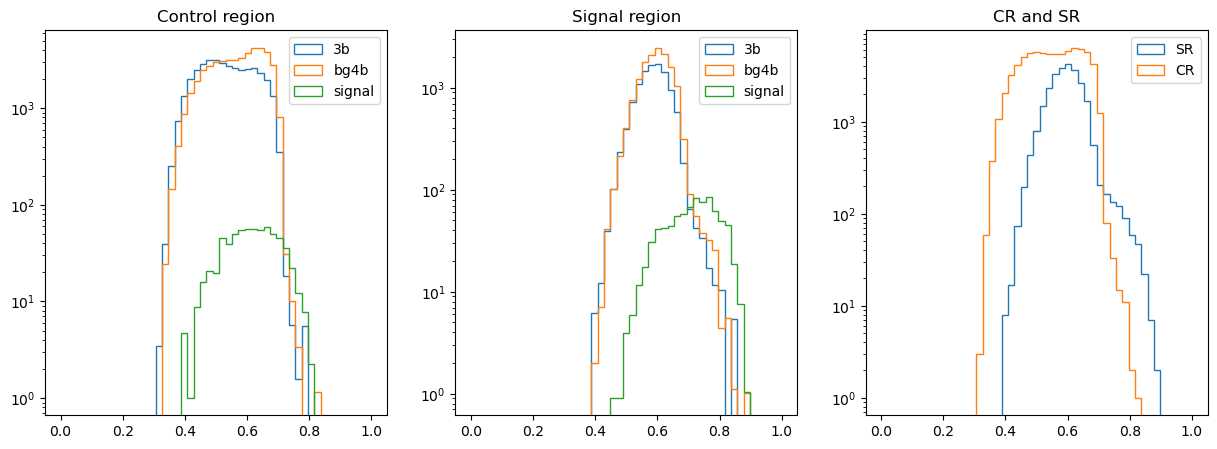

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 17.97it/s, v_num=8, val_loss=0.675, train_loss=0.675]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 17.24it/s, v_num=8, val_loss=0.675, train_loss=0.675]
CR w_4b / w_3b = 1.2123099565505981
SR w_4b / w_3b = 1.4215177297592163


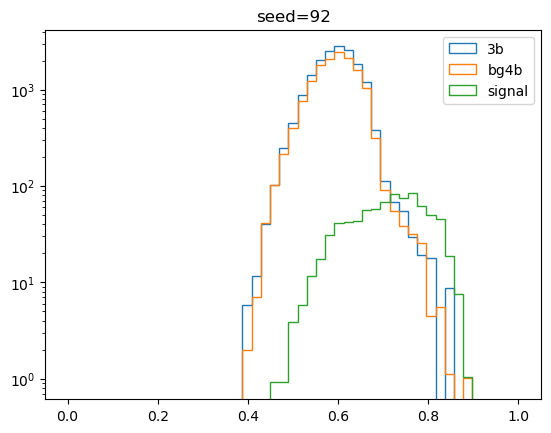

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.03}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


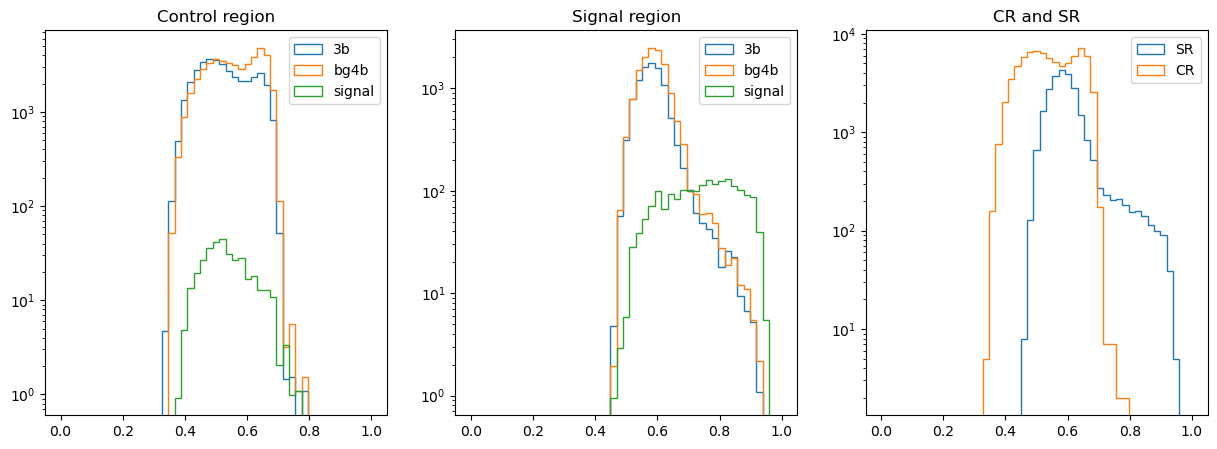

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.73it/s, v_num=9, val_loss=0.677, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 30.09it/s, v_num=9, val_loss=0.677, train_loss=0.676]
CR w_4b / w_3b = 1.2161353826522827
SR w_4b / w_3b = 1.5661109685897827


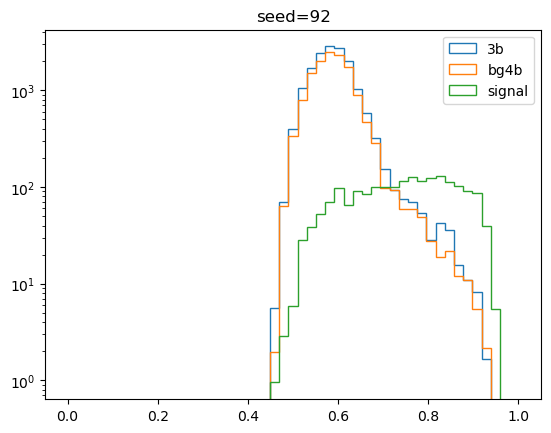

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.04}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


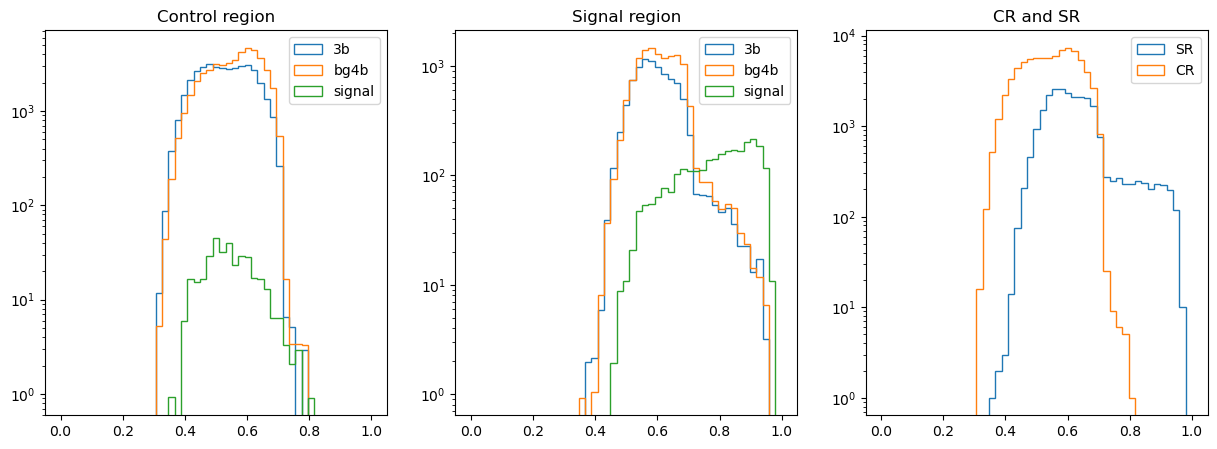

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 23.91it/s, v_num=10, val_loss=0.679, train_loss=0.676]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:02<00:00, 23.84it/s, v_num=10, val_loss=0.679, train_loss=0.676]
CR w_4b / w_3b = 1.1985530853271484
SR w_4b / w_3b = 1.6393628120422363


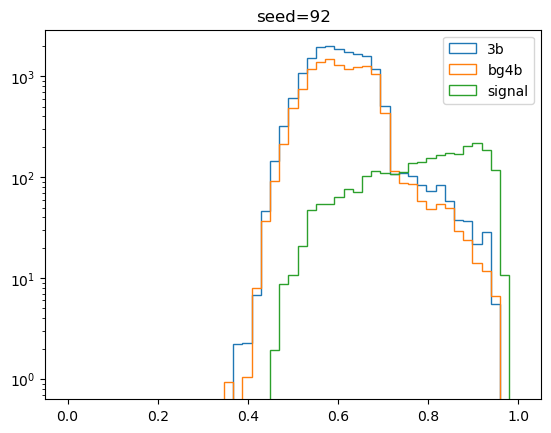

successfully loaded {'experiment_name': 'fvt_training_higher_sr', 'seed': 92, 'n_sample_ratio': 1.0, 'signal_ratio': 0.05}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_epochs=10` reached.


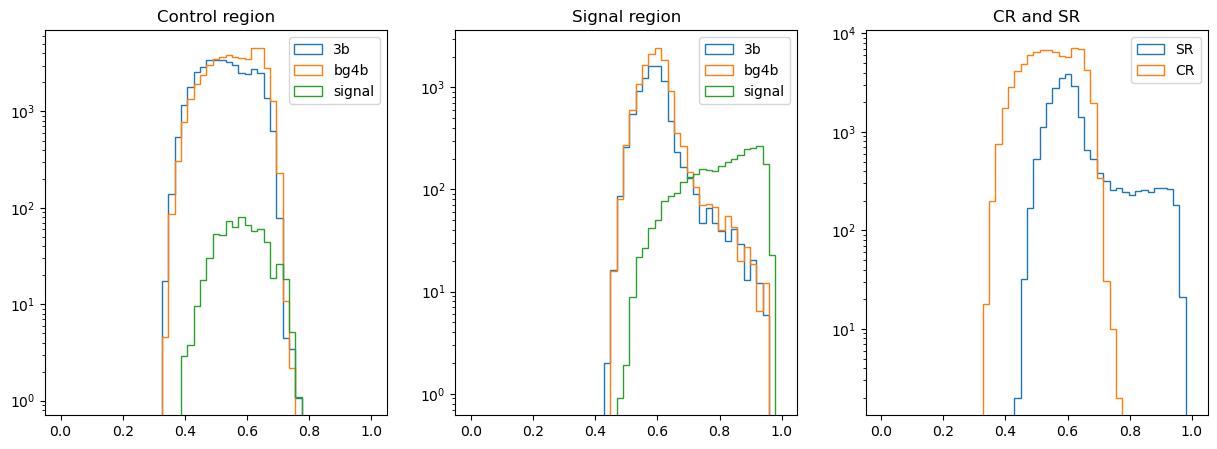

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory /home/soheuny/HH4bsim/playground/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | encoder  | FvTEncoder | 920   
1 | select_q | conv1d     | 8     
2 | out      | conv1d     | 16    
----------------------------------------
895       Trainable params
49        Non-trainable params
944       Total params
0.004     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.93it/s, v_num=11, val_loss=0.678, train_loss=0.677]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 51/51 [00:01<00:00, 25.72it/s, v_num=11, val_loss=0.678, train_loss=0.677]
CR w_4b / w_3b = 1.2090681791305542
SR w_4b / w_3b = 1.716791033744812


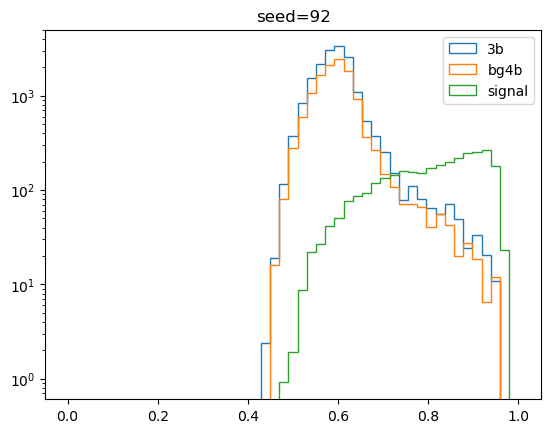

In [7]:
from signal_region import get_regions_stats
from fvt_classifier import FvTClassifier

batch_size = 2**10
sr_w4b_ratio = 0.2
cr_w4b_ratio = 0.6
n_sample_ratio = 1.0

noise_scales = [0.1, 0.05]

signal_region_stats_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_svc_sr_reweighted_dict = {seed: {signal_ratio: {} for signal_ratio in signal_ratios} for seed in seeds}
events_test_dict = {seed: {} for seed in seeds}

for noise_scale in noise_scales:
    for seed in seeds:
        for signal_ratio in signal_ratios:
            hparam_filter = {"experiment_name": experiment_name, 
                            "seed": seed, 
                            "n_sample_ratio": n_sample_ratio, 
                            "signal_ratio": signal_ratio}
            hashes = TrainingInfo.find(hparam_filter)
            assert len(hashes) == 1
            print("successfully loaded", hparam_filter)
            fvt_hash = hashes[0]

            _, dinfo_test = generate_tt_dataset(
                seed,
                n_3b,
                n_all4b,
                signal_ratio,
                test_ratio,
            )
            events_test = EventsData.from_dataframe(dinfo_test.fetch_data(), features)
            events_test_dict[seed][signal_ratio] = events_test.clone()
            events_sr_train, events_sr_eval = events_test.split(1/3, seed=seed)

            signal_region_stats = get_regions_stats(
                events_sr_eval, fvt_hash, method="smearing", 
                events_sr_train=events_sr_train, noise_scale=noise_scale)    

            signal_region_stats_dict[seed][signal_ratio][noise_scale] = signal_region_stats
            events_sr_eval.update_npd("smear_diff", signal_region_stats)

            signal_region_stats_argsort = np.argsort(signal_region_stats)[::-1]
            signal_region_stats_sorted = signal_region_stats[signal_region_stats_argsort]

            weights = events_sr_eval.weights[signal_region_stats_argsort]
            is_signal = events_sr_eval.is_signal[signal_region_stats_argsort]
            is_4b = events_sr_eval.is_4b[signal_region_stats_argsort]

            cumul_4b_ratio = np.cumsum(weights * is_4b) / np.sum(weights * is_4b)
            sr_cut = signal_region_stats_sorted[np.argmin(cumul_4b_ratio < sr_w4b_ratio)]
            cr_cut = signal_region_stats_sorted[np.argmin(cumul_4b_ratio < sr_w4b_ratio + cr_w4b_ratio)]

            events_svc_cr = events_sr_eval[(events_sr_eval.npd["smear_diff"] > cr_cut)
                                            & (events_sr_eval.npd["smear_diff"] < sr_cut)]
            events_svc_cr_train, events_svc_cr_val = events_svc_cr.split(2/3, seed=seed)
            events_svc_cr_train.fit_batch_size(batch_size)
            events_svc_cr_val.fit_batch_size(batch_size)

            events_svc_sr = events_sr_eval[events_sr_eval.npd["smear_diff"] >= sr_cut]

            fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

            bins_range = np.linspace(0, 1, 50)

            hist_events_by_labels(events_svc_cr, bins_range, ax[0])
            ax[0].set_title("Control region")
            ax[0].legend()
            ax[0].set_yscale("log")

            hist_events_by_labels(events_svc_sr, bins_range, ax[1])
            ax[1].set_title("Signal region")
            ax[1].legend()
            ax[1].set_yscale("log")

            ax[2].set_title("CR and SR")
            ax[2].hist(events_svc_sr.fvt_score, bins=bins_range, histtype="step", label="SR")
            ax[2].hist(events_svc_cr.fvt_score, bins=bins_range, histtype="step", label="CR")
            ax[2].legend()
            ax[2].set_yscale("log")

            plt.show()
            plt.close()
            
            svc_model = FvTClassifier(
                num_classes=2,
                dim_input_jet_features=4,
                dim_dijet_features=6,
                dim_quadjet_features=6,
                run_name=f"svc_tmp_{seed}",
                device=torch.device("cuda:0"),
                lr=1e-3
            )

            svc_model.fit(
                events_svc_cr_train.to_tensor_dataset(),
                events_svc_cr_val.to_tensor_dataset(),
                batch_size=batch_size,
                max_epochs=20,
            )

            svc_model.eval()
            svc_model.to(device)

            cr_w_4b_over_3b = events_svc_cr.total_weight_4b / (events_svc_cr.total_weight - events_svc_cr.total_weight_4b)
            sr_w_4b_over_3b = events_svc_sr.total_weight_4b / (events_svc_sr.total_weight - events_svc_sr.total_weight_4b)
            probs_4b = svc_model.predict(events_svc_sr.X_torch)[:, 1].cpu().numpy()

            print(f"CR w_4b / w_3b = {cr_w_4b_over_3b}")
            print(f"SR w_4b / w_3b = {sr_w_4b_over_3b}")

            events_svc_sr_reweighted = events_svc_sr.clone()
            reweights = (sr_w_4b_over_3b / cr_w_4b_over_3b) * (probs_4b / (1 - probs_4b))
            events_svc_sr_reweighted.reweight(
                np.where(
                events_svc_sr_reweighted.is_4b, 
                events_svc_sr_reweighted.weights,
                events_svc_sr_reweighted.weights * reweights,
            ))

            is_3b = events_svc_sr_reweighted.is_3b
            is_bg4b = events_svc_sr_reweighted.is_bg4b
            is_signal = events_svc_sr_reweighted.is_signal

            events_svc_sr_reweighted_dict[seed][signal_ratio][noise_scale] = events_svc_sr_reweighted.clone()

            bins_range = np.linspace(0, 1, 50)

            plt.title(f"seed={seed}")
            ax = plt.gca()
            hist_events_by_labels(events_svc_sr_reweighted, bins_range, ax)
            plt.yscale("log")
            plt.legend()
            plt.show()
            plt.close()

In [12]:
from scipy import stats


seed = 42
fvt_cut = 0.6
n_samples = 10000

for noise_scale in noise_scales:
    print("****************************************")
    print("noise_scale = ", noise_scale)
    for signal_ratio in signal_ratios:
        print("****************************************")
        print("signal_ratio = ", signal_ratio)
        for seed in seeds:
            np.random.seed(seed)
            events = events_svc_sr_reweighted_dict[seed][signal_ratio][noise_scale]
            x_poisson_est_bg_list = []
            x_poisson_actual_list = []

            # sample 3b (est_bg) and 4b (actual) events
            event_samples_est_bg = events.poisson_sample(n_samples, events.is_3b)
            event_samples_actual = events.poisson_sample(n_samples, events.is_4b)

            x_poisson_est_bg = np.sum(event_samples_est_bg.fvt_score > fvt_cut) 
            x_poisson_actual = np.sum(event_samples_actual.fvt_score > fvt_cut)

            # X_1, ..., X_n ~ Bernoulli(p_1), 
            # X'_1, ..., X'_n ~ Bernoulli(p_2)
            # H_0: p_1 = p_2 vs. H_1: p_1 != p_2
            # Asymptotically (n -> \infty), sqrt(n)(\hat{p}_1 - p_1) ~ N(0, p(1-p))
            # and sqrt(n)(\hat{p}_2 - p_2) ~ N(0, p(1-p))
            # Under H_0, \hat{p}_1 - \hat{p}_2 ~ N(0, 2p(1-p))

            p1_hat = x_poisson_est_bg / n_samples
            p2_hat = x_poisson_actual / n_samples
            p_hat = (x_poisson_est_bg + x_poisson_actual) / (2 * n_samples)

            z = (p1_hat - p2_hat) / np.sqrt(2 * p_hat * (1 - p_hat) / n_samples)

            # print(f"seed={seed}, signal_ratio={signal_ratio}")
            # print(f"p1_hat = {p1_hat}, p2_hat = {p2_hat}, z = {z}")
            print("seed=", seed)
            print(f"p-value = {2 * (1 - stats.norm.cdf(np.abs(z)))}")

            # bins_range = np.linspace(0, 1, 50)
            # plt.title(f"seed={seed}, signal_ratio={signal_ratio}")
            # plt.hist(event_samples_est_bg.fvt_score, bins=bins_range, histtype="step", label="est_bg")
            # plt.hist(event_samples_actual.fvt_score, bins=bins_range, histtype="step", label="actual")
            # plt.legend()
            # plt.show()

            # plt.hist(x_poisson_est_bg_list, bins=50, histtype="step", label="est_bg")
            # plt.hist(x_poisson_actual_list, bins=50, histtype="step", label="actual")
            # plt.legend()
            # plt.show()

****************************************
noise_scale =  0.1
****************************************
signal_ratio =  0.0
seed= 42
p-value = 0.25941158226170424
seed= 52
p-value = 0.8532345166791389
seed= 62
p-value = 0.3561733875239397
seed= 72
p-value = 0.06755281245117017
seed= 82
p-value = 0.6214430009682772
seed= 92
p-value = 0.7328931100220355
****************************************
signal_ratio =  0.01
seed= 42
p-value = 0.07947283266163674
seed= 52
p-value = 0.30060814902690236
seed= 62
p-value = 0.3885754365383056
seed= 72
p-value = 0.679524468843228
seed= 82
p-value = 0.49557311251156344
seed= 92
p-value = 0.008473797811131778
****************************************
signal_ratio =  0.02
seed= 42
p-value = 0.0
seed= 52
p-value = 0.965948861991158
seed= 62
p-value = 1.2964962436967653e-11
seed= 72
p-value = 0.00047364139895633706
seed= 82
p-value = 0.0017955870888219927
seed= 92
p-value = 0.014221703216167114
****************************************
signal_ratio =  0.03
seed= 

0.5048484
0.0


/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


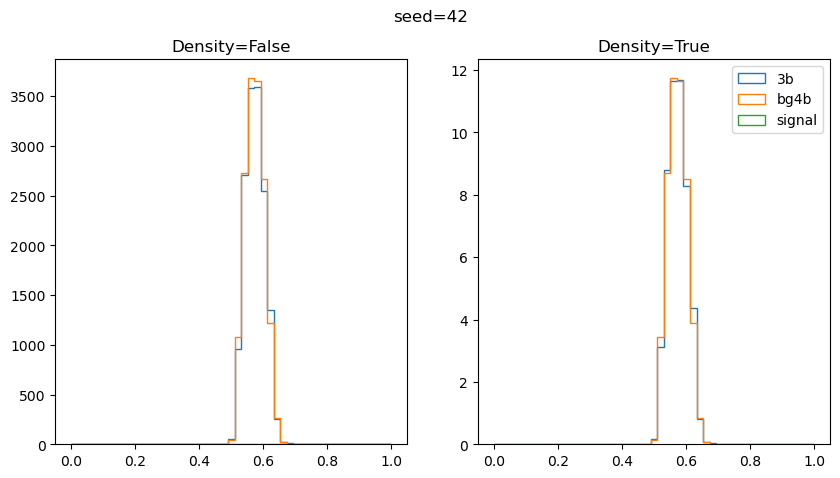

0.4763328
0.0


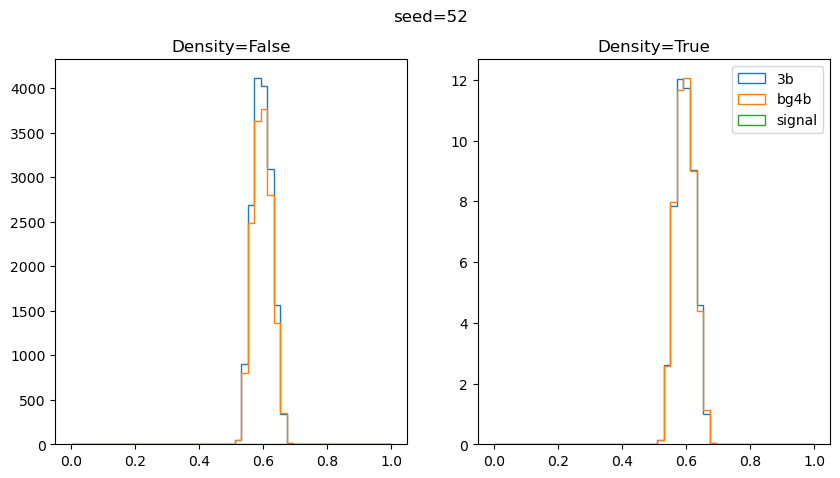

0.4758665
0.0


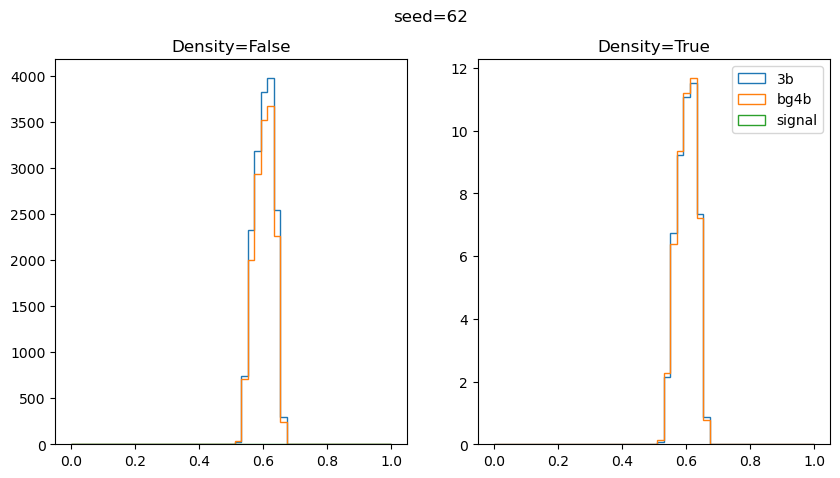

0.47340053
0.0


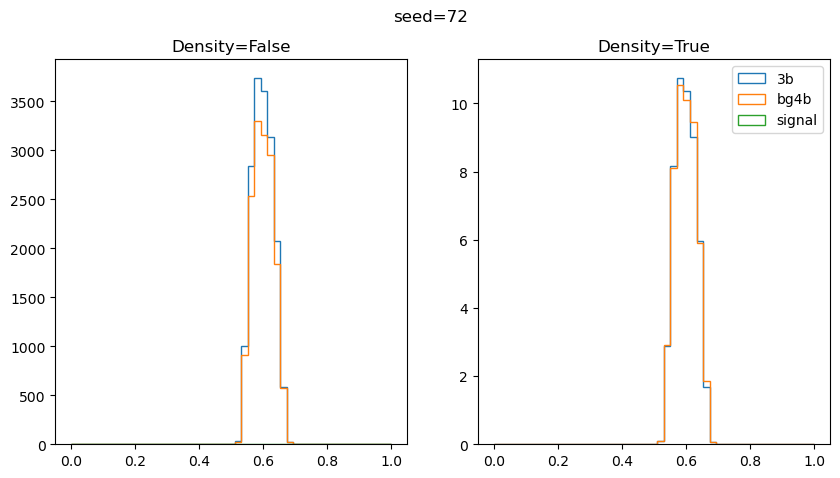

0.41240102
0.0


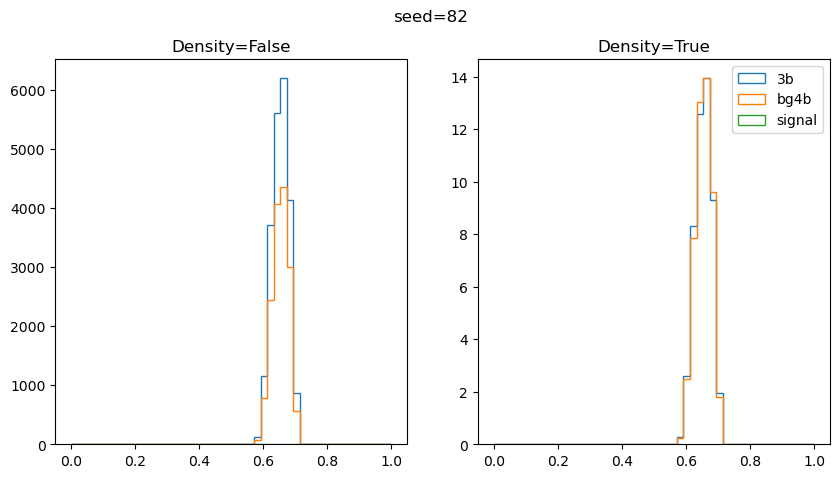

0.41556698
0.0


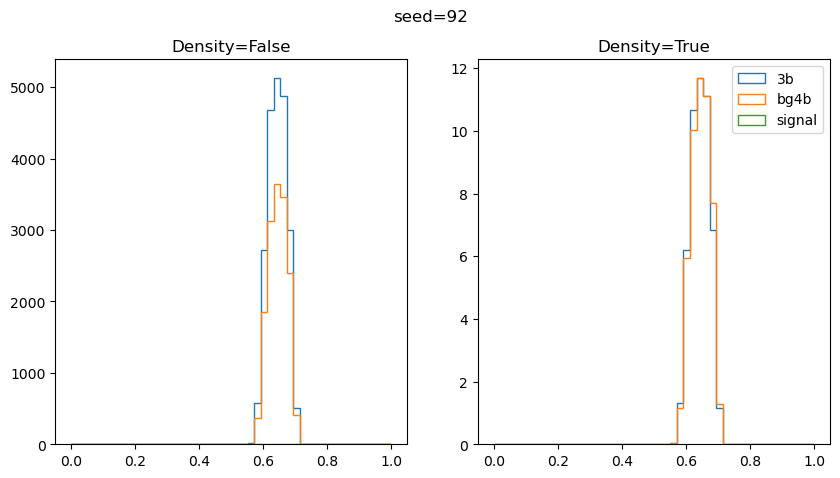

In [20]:
noise_scale = 0.1
for seed in seeds:
    for signal_ratio in [0.0]:
        events_svc_sr_reweighted = events_svc_sr_reweighted_dict[seed][signal_ratio][noise_scale]

        bins_range = np.linspace(0, 1, 50)
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        fig.suptitle(f"seed={seed}")
        hist_events_by_labels(events_svc_sr_reweighted, bins_range, ax[0], density=False)
        hist_events_by_labels(events_svc_sr_reweighted, bins_range, ax[1], density=True)
        
        
        print(events_svc_sr_reweighted.total_weight_4b / events_svc_sr_reweighted.total_weight)
        print(events_svc_sr_reweighted.total_weight_signal / events_svc_sr_reweighted.total_weight)
        ax[0].set_title("Density=False")
        ax[1].set_title("Density=True")
        # plt.yscale("log")
        plt.legend()
        plt.show()
        plt.close()

In [5]:
import pandas as pd

df = pd.read_hdf("../events/MG3/dataframes/fourTag_10x_picoAOD.h5")
idx = np.ones(len(df), dtype=bool)

df[idx]

Jet0_pt     Jet1_pt    Jet2_pt    Jet3_pt  Jet0_eta  Jet1_eta  \
0        115.609840   94.240593  82.950478  61.072025 -1.513053 -1.246623   
1        119.894913  115.978569  81.130371  46.164692  0.520109 -1.405386   
2        130.411606   76.007805  70.901619  42.524044 -0.902303 -1.593501   
3         93.881653   81.407478  44.674297  42.889832 -0.638383  1.483850   
4         74.498657   66.843819  64.972534  44.857151 -1.325555 -1.067213   
...             ...         ...        ...        ...       ...       ...   
2202256   68.653275   62.651684  60.838261  41.110283 -1.686871  0.915442   
2202257  109.355309   84.390633  59.714325  43.787334  0.289475  2.236387   
2202258  119.292236  103.201645  45.786457  42.378479  1.605550  0.279862   
2202259   63.797054   55.896358  54.769604  42.924549 -1.301248  1.273050   
2202260  114.064117   73.077309  58.833763  43.055447 -1.854643 -1.885008   

         Jet2_eta  Jet3_eta  Jet0_phi  Jet1_phi  ...  sym_Jet3_phi  \
0        1.146813  2.324889 -1.256213 -0.725948  ...     -1.552758   
1        1.087997 -0.651486 -1.080710  0.931283  ...      2.690179   
2       -0.861177 -0.728536  2.780485 -1.455403  ...      3.025076   
3       -0.814485 -1.026484  2.208489  2.233380  ...     -2.645955   
4       -1.468200 -1.300190  1.132869 -2.364043  ...      0.465134   
...           ...       ...       ...       ...  ...           ...   
2202256 -1.496263 -0.799012 -1.846007  1.353166  ...      1.889827   
2202257 -2.127167  1.630914 -1.045563  2.068219  ...      2.651430   
2202258  1.124532  0.639245  1.139656 -0.084389  ...     -2.741812   
2202259 -0.891338 -2.298075 -0.011382  0.395304  ...     -2.569904   
2202260 -1.878670 -1.043500  3.117006  0.046131  ...      2.911775   

         sym_Jet0_phi  sym_Jet0_pt  sym_Jet0_m  sym_Jet1_pt  sym_Jet1_m  \
0                   0   115.609840         0.0    94.240593         0.0   
1                   0   119.894913         0.0   115.978569         0.0   
2                   0   130.411606         0.0    76.007805         0.0   
3                   0    93.881653         0.0    81.407478         0.0   
4                   0    74.498657         0.0    66.843819         0.0   
...               ...          ...         ...          ...         ...   
2202256             0    68.653275         0.0    62.651684         0.0   
2202257             0   109.355309         0.0    84.390633         0.0   
2202258             0   119.292236         0.0   103.201645         0.0   
2202259             0    63.797054         0.0    55.896358         0.0   
2202260             0   114.064117         0.0    73.077309         0.0   

         sym_Jet2_pt  sym_Jet2_m  sym_Jet3_pt  sym_Jet3_m  
0          82.950478         0.0    61.072025         0.0  
1          81.130371         0.0    46.164692         0.0  
2          70.901619         0.0    42.524044         0.0  
3          44.674297         0.0    42.889832         0.0  
4          64.972534         0.0    44.857151         0.0  
...              ...         ...          ...         ...  
2202256    60.838261         0.0    41.110283         0.0  
2202257    59.714325         0.0    43.787334         0.0  
2202258    45.786457         0.0    42.378479         0.0  
2202259    54.769604         0.0    42.924549         0.0  
2202260    58.833763         0.0    43.055447         0.0  

[2202261 rows x 60 columns]

2.1002397537231445